In [ ]:
%load_ext autoreload
%autoreload 2

# Snake

In [ ]:
import environments_fully_observable
#import environments_partially_observable
from QLearningAgent import QLearningAgent
from DQNAgent import DQNAgent
from ActorCriticAgent import ActorCriticAgent
from ReinforceAgent import ReinforceAgent
import numpy as np
from tqdm import trange
import matplotlib.pyplot as plt
import random
import tensorflow as tf

tf.random.set_seed(0)
random.seed(0)
np.random.seed(0)

# Q-Learning approach

## Environment definition

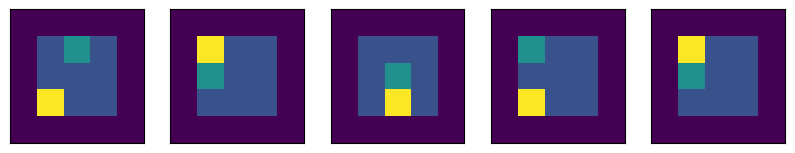

In [ ]:
%matplotlib inline
import keras.api._v2.keras as K
# function to standardize getting an env for the whole notebook
def get_env(n=1000):
    # n is the number of boards that you want to simulate parallely
    # size is the size of each board, also considering the borders
    # mask for the partially observable, is the size of the local neighborhood
    size = 5
    e = environments_fully_observable.OriginalSnakeEnvironment(n, size)
    # or environments_partially_observable.OriginalSnakeEnvironment(n, size, 2)
    return e
N = 1000
env_ = get_env(N)

fig,axs=plt.subplots(1,min(len(env_.boards), 5), figsize=(10,3))
for ax, board in zip(axs, env_.boards):
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    ax.imshow(board, origin="lower")

## Training

In [ ]:
ITERATIONS = 1000
action_space_size = 5  # Assuming there are 4 possible actions: UP, RIGHT, DOWN, LEFT
state_space_shape = env_.to_state().reshape((N,-1)).shape[1:]  # Get the shape of the state space

q_learning_rewards = []

agent = QLearningAgent(action_space_size, state_space_shape)

for iteration in trange(ITERATIONS):

    # Choose action for each board
    actions = [[agent.choose_action(state.astype(int))] for state in env_.to_state()]

    # Execute actions on each board
    rewards = env_.move(actions)

    states = env_.to_state()
    states = states.reshape((1000, -1))

    # Update Q-values for each board
    for i, (state, action, reward) in enumerate(zip(states, actions, rewards)):
        # For each board, update the Q-values
        next_state = env_.to_state()
        state = state.astype(int)
        next_state = next_state.astype(int)
        agent.q_table[state[0],action[0]] = 2
        agent.update_q_table(state, action, reward, next_state)

    # Decay exploration rate
    agent.decay_exploration_rate()

    # Optionally, visualize performance or monitor Q-values
    q_learning_rewards.append(np.mean(rewards))


100%|██████████| 1000/1000 [1:01:21<00:00,  3.68s/it]


 ### Random policy reward

Just a baseline (not the one you are supposed to develop)

In [ ]:
random_env = get_env()
random_rewards = []

for _ in trange(ITERATIONS):
    probs = tf.convert_to_tensor([[.25]*4]*random_env.n_boards)

    actions =  tf.random.categorical(tf.math.log(probs), 1, dtype=tf.int32)

    rewards = random_env.move(actions)
    random_rewards.append(np.mean(rewards))

100%|██████████| 1000/1000 [00:23<00:00, 42.38it/s]


###Results

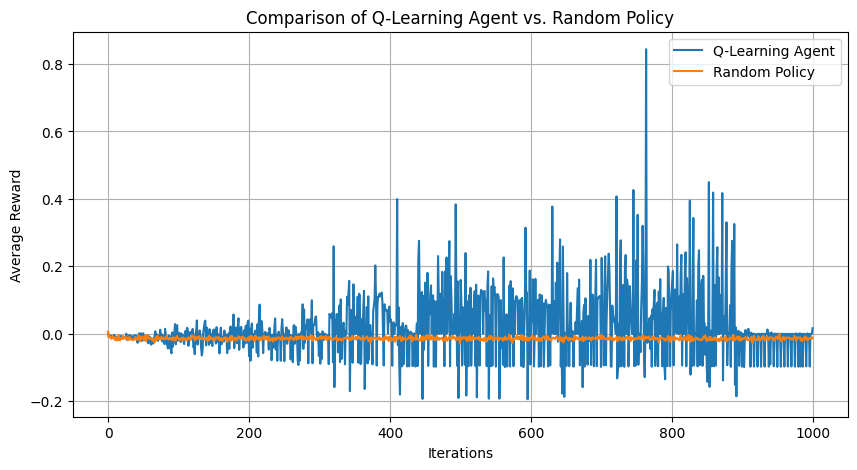

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(range(ITERATIONS), q_learning_rewards, label='Q-Learning Agent')
plt.plot(range(ITERATIONS), random_rewards, label='Random Policy')
plt.xlabel('Iterations')
plt.ylabel('Average Reward')
plt.title('Comparison of Q-Learning Agent vs. Random Policy')
plt.legend()
plt.grid(True)
plt.show()

#DQN Agent

###Environment definition

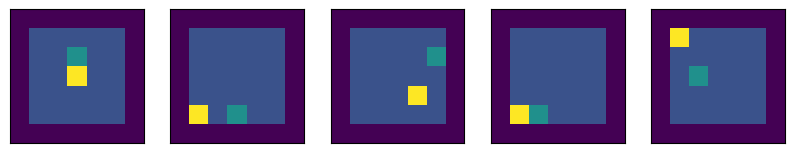

In [ ]:
%matplotlib inline
# function to standardize getting an env for the whole notebook
def get_env(n=1024):
    # n is the number of boards that you want to simulate parallely
    # size is the size of each board, also considering the borders
    # mask for the partially observable, is the size of the local neighborhood
    size = 7
    e = environments_fully_observable.OriginalSnakeEnvironment(n, size)
    # or environments_partially_observable.OriginalSnakeEnvironment(n, size, 2)
    return e
env_ = get_env()

fig,axs=plt.subplots(1,min(len(env_.boards), 5), figsize=(10,3))
for ax, board in zip(axs, env_.boards):
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    ax.imshow(board, origin="lower")

###Training

In [ ]:
# Initialize the Agent
ITERATIONS = 1000
state_space_shape = env_.to_state().shape
action_space_size = 5
agent = DQNAgent(action_space_size, state_space_shape)
DQN_rewards = []

# Training Loop
for episode in trange(ITERATIONS):
    state = env_.to_state()

    # Choose action
    action = agent.choose_action(state)

    # Take action
    reward = env_.move(action)
    DQN_rewards.append(np.mean(reward))

    # Take next state
    next_state = env_.to_state()

    # Update Q-values
    agent.update_q_values(state, action, reward, next_state)

    # Decay exploration rate
    agent.decay_exploration_rate()

  0%|          | 0/1000 [00:00<?, ?it/s]

32/32 [==============================] - 0s 1ms/step


  0%|          | 1/1000 [00:01<21:56,  1.32s/it]

32/32 [==============================] - 0s 1ms/step


  0%|          | 2/1000 [00:02<18:31,  1.11s/it]

32/32 [==============================] - 0s 1ms/step


  0%|          | 3/1000 [00:03<15:39,  1.06it/s]

32/32 [==============================] - 0s 1ms/step


  0%|          | 4/1000 [00:03<14:07,  1.18it/s]

32/32 [==============================] - 0s 1ms/step


  0%|          | 5/1000 [00:04<13:14,  1.25it/s]

32/32 [==============================] - 0s 1ms/step


  1%|          | 6/1000 [00:05<12:47,  1.30it/s]

32/32 [==============================] - 0s 1ms/step


  1%|          | 7/1000 [00:05<12:30,  1.32it/s]

32/32 [==============================] - 0s 2ms/step


  1%|          | 8/1000 [00:06<14:04,  1.17it/s]

32/32 [==============================] - 0s 2ms/step


  1%|          | 9/1000 [00:08<15:44,  1.05it/s]

32/32 [==============================] - 0s 2ms/step


  1%|          | 10/1000 [00:09<15:40,  1.05it/s]

32/32 [==============================] - 0s 1ms/step


  1%|          | 11/1000 [00:09<14:28,  1.14it/s]

32/32 [==============================] - 0s 1ms/step


  1%|          | 12/1000 [00:10<14:18,  1.15it/s]

32/32 [==============================] - 0s 1ms/step


  1%|▏         | 13/1000 [00:11<13:28,  1.22it/s]

32/32 [==============================] - 0s 1ms/step


  1%|▏         | 14/1000 [00:12<12:50,  1.28it/s]

32/32 [==============================] - 0s 1ms/step


  2%|▏         | 15/1000 [00:12<12:52,  1.28it/s]

32/32 [==============================] - 0s 1ms/step


  2%|▏         | 16/1000 [00:13<13:24,  1.22it/s]

32/32 [==============================] - 0s 1ms/step


  2%|▏         | 17/1000 [00:14<13:18,  1.23it/s]

32/32 [==============================] - 0s 1ms/step


  2%|▏         | 18/1000 [00:15<12:49,  1.28it/s]

32/32 [==============================] - 0s 1ms/step


  2%|▏         | 19/1000 [00:16<13:13,  1.24it/s]

32/32 [==============================] - 0s 1ms/step


  2%|▏         | 20/1000 [00:16<12:50,  1.27it/s]

32/32 [==============================] - 0s 1ms/step


  2%|▏         | 21/1000 [00:17<12:18,  1.33it/s]

32/32 [==============================] - 0s 1ms/step


  2%|▏         | 22/1000 [00:18<11:51,  1.37it/s]

32/32 [==============================] - 0s 1ms/step


  2%|▏         | 23/1000 [00:19<12:41,  1.28it/s]

32/32 [==============================] - 0s 2ms/step


  2%|▏         | 24/1000 [00:20<14:03,  1.16it/s]

32/32 [==============================] - 0s 2ms/step


  2%|▎         | 25/1000 [00:21<16:07,  1.01it/s]

32/32 [==============================] - 0s 1ms/step


  3%|▎         | 26/1000 [00:22<14:50,  1.09it/s]

32/32 [==============================] - 0s 1ms/step


  3%|▎         | 27/1000 [00:22<13:41,  1.18it/s]

32/32 [==============================] - 0s 1ms/step


  3%|▎         | 28/1000 [00:23<12:51,  1.26it/s]

32/32 [==============================] - 0s 1ms/step


  3%|▎         | 29/1000 [00:24<13:18,  1.22it/s]

32/32 [==============================] - 0s 2ms/step


  3%|▎         | 30/1000 [00:25<13:06,  1.23it/s]

32/32 [==============================] - 0s 1ms/step


  3%|▎         | 31/1000 [00:26<13:06,  1.23it/s]

32/32 [==============================] - 0s 1ms/step


  3%|▎         | 32/1000 [00:26<12:31,  1.29it/s]

32/32 [==============================] - 0s 1ms/step


  3%|▎         | 33/1000 [00:27<12:47,  1.26it/s]

32/32 [==============================] - 0s 2ms/step


  3%|▎         | 34/1000 [00:28<12:18,  1.31it/s]

32/32 [==============================] - 0s 1ms/step


  4%|▎         | 35/1000 [00:28<11:59,  1.34it/s]

32/32 [==============================] - 0s 1ms/step


  4%|▎         | 36/1000 [00:29<12:15,  1.31it/s]

32/32 [==============================] - 0s 1ms/step


  4%|▎         | 37/1000 [00:30<13:00,  1.23it/s]

32/32 [==============================] - 0s 1ms/step


  4%|▍         | 38/1000 [00:31<12:23,  1.29it/s]

32/32 [==============================] - 0s 3ms/step


  4%|▍         | 39/1000 [00:32<14:24,  1.11it/s]

32/32 [==============================] - 0s 2ms/step


  4%|▍         | 40/1000 [00:33<15:30,  1.03it/s]

32/32 [==============================] - 0s 2ms/step


  4%|▍         | 41/1000 [00:34<16:24,  1.03s/it]

32/32 [==============================] - 0s 1ms/step


  4%|▍         | 42/1000 [00:35<15:17,  1.04it/s]

32/32 [==============================] - 0s 1ms/step


  4%|▍         | 43/1000 [00:36<14:31,  1.10it/s]

32/32 [==============================] - 0s 1ms/step


  4%|▍         | 44/1000 [00:37<14:10,  1.12it/s]

32/32 [==============================] - 0s 1ms/step


  4%|▍         | 45/1000 [00:37<13:12,  1.21it/s]

32/32 [==============================] - 0s 1ms/step


  5%|▍         | 46/1000 [00:38<13:08,  1.21it/s]

32/32 [==============================] - 0s 1ms/step


  5%|▍         | 47/1000 [00:39<13:25,  1.18it/s]

32/32 [==============================] - 0s 1ms/step


  5%|▍         | 48/1000 [00:40<12:43,  1.25it/s]

32/32 [==============================] - 0s 1ms/step


  5%|▍         | 49/1000 [00:41<12:41,  1.25it/s]

32/32 [==============================] - 0s 1ms/step


  5%|▌         | 50/1000 [00:41<12:10,  1.30it/s]

32/32 [==============================] - 0s 1ms/step


  5%|▌         | 51/1000 [00:42<11:45,  1.35it/s]

32/32 [==============================] - 0s 1ms/step


  5%|▌         | 52/1000 [00:43<12:14,  1.29it/s]

32/32 [==============================] - 0s 1ms/step


  5%|▌         | 53/1000 [00:44<12:26,  1.27it/s]

32/32 [==============================] - 0s 1ms/step


  5%|▌         | 54/1000 [00:45<12:54,  1.22it/s]

32/32 [==============================] - 0s 2ms/step


  6%|▌         | 55/1000 [00:46<14:59,  1.05it/s]

32/32 [==============================] - 0s 2ms/step


  6%|▌         | 56/1000 [00:47<15:20,  1.03it/s]

32/32 [==============================] - 0s 1ms/step


  6%|▌         | 57/1000 [00:48<14:41,  1.07it/s]

32/32 [==============================] - 0s 1ms/step


  6%|▌         | 58/1000 [00:49<14:04,  1.12it/s]

32/32 [==============================] - 0s 1ms/step


  6%|▌         | 59/1000 [00:49<13:03,  1.20it/s]

32/32 [==============================] - 0s 1ms/step


  6%|▌         | 60/1000 [00:50<12:13,  1.28it/s]

32/32 [==============================] - 0s 1ms/step


  6%|▌         | 61/1000 [00:51<11:44,  1.33it/s]

32/32 [==============================] - 0s 1ms/step


  6%|▌         | 62/1000 [00:51<11:53,  1.32it/s]

32/32 [==============================] - 0s 1ms/step


  6%|▋         | 63/1000 [00:52<12:06,  1.29it/s]

32/32 [==============================] - 0s 1ms/step


  6%|▋         | 64/1000 [00:53<11:37,  1.34it/s]

32/32 [==============================] - 0s 2ms/step


  6%|▋         | 65/1000 [00:54<11:32,  1.35it/s]

32/32 [==============================] - 0s 1ms/step


  7%|▋         | 66/1000 [00:54<12:11,  1.28it/s]

32/32 [==============================] - 0s 1ms/step


  7%|▋         | 67/1000 [00:55<12:08,  1.28it/s]

32/32 [==============================] - 0s 1ms/step


  7%|▋         | 68/1000 [00:56<11:46,  1.32it/s]

32/32 [==============================] - 0s 1ms/step


  7%|▋         | 69/1000 [00:57<11:58,  1.30it/s]

32/32 [==============================] - 0s 2ms/step


  7%|▋         | 70/1000 [00:58<14:06,  1.10it/s]

32/32 [==============================] - 0s 3ms/step


  7%|▋         | 71/1000 [00:59<16:09,  1.04s/it]

32/32 [==============================] - 0s 1ms/step


  7%|▋         | 72/1000 [01:00<14:54,  1.04it/s]

32/32 [==============================] - 0s 1ms/step


  7%|▋         | 73/1000 [01:01<13:34,  1.14it/s]

32/32 [==============================] - 0s 1ms/step


  7%|▋         | 74/1000 [01:02<13:16,  1.16it/s]

32/32 [==============================] - 0s 1ms/step


  8%|▊         | 75/1000 [01:02<13:10,  1.17it/s]

32/32 [==============================] - 0s 1ms/step


  8%|▊         | 76/1000 [01:03<12:52,  1.20it/s]

32/32 [==============================] - 0s 1ms/step


  8%|▊         | 77/1000 [01:04<12:52,  1.19it/s]

32/32 [==============================] - 0s 1ms/step


  8%|▊         | 78/1000 [01:05<12:13,  1.26it/s]

32/32 [==============================] - 0s 1ms/step


  8%|▊         | 79/1000 [01:06<12:10,  1.26it/s]

32/32 [==============================] - 0s 1ms/step


  8%|▊         | 80/1000 [01:07<13:10,  1.16it/s]

32/32 [==============================] - 0s 2ms/step


  8%|▊         | 81/1000 [01:07<13:15,  1.15it/s]

32/32 [==============================] - 0s 1ms/step


  8%|▊         | 82/1000 [01:08<12:44,  1.20it/s]

32/32 [==============================] - 0s 1ms/step


  8%|▊         | 83/1000 [01:09<11:58,  1.28it/s]

32/32 [==============================] - 0s 1ms/step


  8%|▊         | 84/1000 [01:10<11:25,  1.34it/s]

32/32 [==============================] - 0s 2ms/step


  8%|▊         | 85/1000 [01:11<13:33,  1.12it/s]

32/32 [==============================] - 0s 2ms/step


  9%|▊         | 86/1000 [01:12<15:51,  1.04s/it]

32/32 [==============================] - 0s 1ms/step


  9%|▊         | 87/1000 [01:13<14:35,  1.04it/s]

32/32 [==============================] - 0s 1ms/step


  9%|▉         | 88/1000 [01:14<13:19,  1.14it/s]

32/32 [==============================] - 0s 1ms/step


  9%|▉         | 89/1000 [01:14<13:02,  1.16it/s]

32/32 [==============================] - 0s 1ms/step


  9%|▉         | 90/1000 [01:15<12:17,  1.23it/s]

32/32 [==============================] - 0s 1ms/step


  9%|▉         | 91/1000 [01:16<12:25,  1.22it/s]

32/32 [==============================] - 0s 2ms/step


  9%|▉         | 92/1000 [01:17<11:47,  1.28it/s]

32/32 [==============================] - 0s 1ms/step


  9%|▉         | 93/1000 [01:17<11:58,  1.26it/s]

32/32 [==============================] - 0s 2ms/step


  9%|▉         | 94/1000 [01:18<12:18,  1.23it/s]

32/32 [==============================] - 0s 1ms/step


 10%|▉         | 95/1000 [01:19<11:43,  1.29it/s]

32/32 [==============================] - 0s 1ms/step


 10%|▉         | 96/1000 [01:20<11:11,  1.35it/s]

32/32 [==============================] - 0s 1ms/step


 10%|▉         | 97/1000 [01:21<12:04,  1.25it/s]

32/32 [==============================] - 0s 1ms/step


 10%|▉         | 98/1000 [01:21<12:01,  1.25it/s]

32/32 [==============================] - 0s 1ms/step


 10%|▉         | 99/1000 [01:22<12:05,  1.24it/s]

32/32 [==============================] - 0s 2ms/step


 10%|█         | 100/1000 [01:24<14:13,  1.05it/s]

32/32 [==============================] - 0s 2ms/step


 10%|█         | 101/1000 [01:25<16:13,  1.08s/it]

32/32 [==============================] - 0s 2ms/step


 10%|█         | 102/1000 [01:26<16:01,  1.07s/it]

32/32 [==============================] - 0s 1ms/step


 10%|█         | 103/1000 [01:27<14:49,  1.01it/s]

32/32 [==============================] - 0s 1ms/step


 10%|█         | 104/1000 [01:28<14:23,  1.04it/s]

32/32 [==============================] - 0s 1ms/step


 10%|█         | 105/1000 [01:28<13:11,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 11%|█         | 106/1000 [01:29<13:12,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 11%|█         | 107/1000 [01:30<12:13,  1.22it/s]

32/32 [==============================] - 0s 1ms/step


 11%|█         | 108/1000 [01:31<12:14,  1.21it/s]

32/32 [==============================] - 0s 1ms/step


 11%|█         | 109/1000 [01:32<12:10,  1.22it/s]

32/32 [==============================] - 0s 1ms/step


 11%|█         | 110/1000 [01:32<12:10,  1.22it/s]

32/32 [==============================] - 0s 1ms/step


 11%|█         | 111/1000 [01:33<11:57,  1.24it/s]

32/32 [==============================] - 0s 1ms/step


 11%|█         | 112/1000 [01:34<11:53,  1.25it/s]

32/32 [==============================] - 0s 1ms/step


 11%|█▏        | 113/1000 [01:35<11:49,  1.25it/s]

32/32 [==============================] - 0s 1ms/step


 11%|█▏        | 114/1000 [01:36<12:03,  1.22it/s]

32/32 [==============================] - 0s 2ms/step


 12%|█▏        | 115/1000 [01:37<12:52,  1.15it/s]

32/32 [==============================] - 0s 2ms/step


 12%|█▏        | 116/1000 [01:38<13:50,  1.06it/s]

32/32 [==============================] - 0s 1ms/step


 12%|█▏        | 117/1000 [01:39<14:10,  1.04it/s]

32/32 [==============================] - 0s 1ms/step


 12%|█▏        | 118/1000 [01:39<12:49,  1.15it/s]

32/32 [==============================] - 0s 1ms/step


 12%|█▏        | 119/1000 [01:40<11:50,  1.24it/s]

32/32 [==============================] - 0s 1ms/step


 12%|█▏        | 120/1000 [01:41<11:49,  1.24it/s]

32/32 [==============================] - 0s 1ms/step


 12%|█▏        | 121/1000 [01:41<11:03,  1.33it/s]

32/32 [==============================] - 0s 1ms/step


 12%|█▏        | 122/1000 [01:42<10:36,  1.38it/s]

32/32 [==============================] - 0s 1ms/step


 12%|█▏        | 123/1000 [01:43<10:49,  1.35it/s]

32/32 [==============================] - 0s 1ms/step


 12%|█▏        | 124/1000 [01:44<10:30,  1.39it/s]

32/32 [==============================] - 0s 1ms/step


 12%|█▎        | 125/1000 [01:44<10:45,  1.35it/s]

32/32 [==============================] - 0s 1ms/step


 13%|█▎        | 126/1000 [01:45<11:24,  1.28it/s]

32/32 [==============================] - 0s 1ms/step


 13%|█▎        | 127/1000 [01:46<11:25,  1.27it/s]

32/32 [==============================] - 0s 2ms/step


 13%|█▎        | 128/1000 [01:47<13:23,  1.09it/s]

32/32 [==============================] - 0s 1ms/step


 13%|█▎        | 129/1000 [01:48<14:05,  1.03it/s]

32/32 [==============================] - 0s 2ms/step


 13%|█▎        | 130/1000 [01:50<15:32,  1.07s/it]

32/32 [==============================] - 0s 3ms/step


 13%|█▎        | 131/1000 [01:51<17:16,  1.19s/it]

32/32 [==============================] - 0s 1ms/step


 13%|█▎        | 132/1000 [01:52<16:23,  1.13s/it]

32/32 [==============================] - 0s 1ms/step


 13%|█▎        | 133/1000 [01:53<15:12,  1.05s/it]

32/32 [==============================] - 0s 1ms/step


 13%|█▎        | 134/1000 [01:54<13:44,  1.05it/s]

32/32 [==============================] - 0s 2ms/step


 14%|█▎        | 135/1000 [01:54<12:59,  1.11it/s]

32/32 [==============================] - 0s 2ms/step


 14%|█▎        | 136/1000 [01:55<13:11,  1.09it/s]

32/32 [==============================] - 0s 1ms/step


 14%|█▎        | 137/1000 [01:56<13:06,  1.10it/s]

32/32 [==============================] - 0s 1ms/step


 14%|█▍        | 138/1000 [01:57<13:04,  1.10it/s]

32/32 [==============================] - 0s 1ms/step


 14%|█▍        | 139/1000 [01:58<12:54,  1.11it/s]

32/32 [==============================] - 0s 1ms/step


 14%|█▍        | 140/1000 [01:59<12:43,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 14%|█▍        | 141/1000 [02:00<12:36,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 14%|█▍        | 142/1000 [02:01<12:34,  1.14it/s]

32/32 [==============================] - 0s 2ms/step


 14%|█▍        | 143/1000 [02:02<13:35,  1.05it/s]

32/32 [==============================] - 0s 2ms/step


 14%|█▍        | 144/1000 [02:03<14:19,  1.00s/it]

32/32 [==============================] - 0s 2ms/step


 14%|█▍        | 145/1000 [02:04<14:59,  1.05s/it]

32/32 [==============================] - 0s 1ms/step


 15%|█▍        | 146/1000 [02:05<14:09,  1.01it/s]

32/32 [==============================] - 0s 2ms/step


 15%|█▍        | 147/1000 [02:06<14:05,  1.01it/s]

32/32 [==============================] - 0s 1ms/step


 15%|█▍        | 148/1000 [02:07<13:37,  1.04it/s]

32/32 [==============================] - 0s 2ms/step


 15%|█▍        | 149/1000 [02:08<13:21,  1.06it/s]

32/32 [==============================] - 0s 2ms/step


 15%|█▌        | 150/1000 [02:09<12:34,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 15%|█▌        | 151/1000 [02:10<13:54,  1.02it/s]

32/32 [==============================] - 0s 1ms/step


 15%|█▌        | 152/1000 [02:11<13:36,  1.04it/s]

32/32 [==============================] - 0s 1ms/step


 15%|█▌        | 153/1000 [02:12<13:08,  1.07it/s]

32/32 [==============================] - 0s 1ms/step


 15%|█▌        | 154/1000 [02:13<13:52,  1.02it/s]

32/32 [==============================] - 0s 2ms/step


 16%|█▌        | 155/1000 [02:14<14:30,  1.03s/it]

32/32 [==============================] - 0s 3ms/step


 16%|█▌        | 156/1000 [02:15<14:36,  1.04s/it]

32/32 [==============================] - 0s 3ms/step


 16%|█▌        | 157/1000 [02:16<16:32,  1.18s/it]

32/32 [==============================] - 0s 1ms/step


 16%|█▌        | 158/1000 [02:17<16:31,  1.18s/it]

32/32 [==============================] - 0s 1ms/step


 16%|█▌        | 159/1000 [02:18<15:11,  1.08s/it]

32/32 [==============================] - 0s 2ms/step


 16%|█▌        | 160/1000 [02:19<14:24,  1.03s/it]

32/32 [==============================] - 0s 1ms/step


 16%|█▌        | 161/1000 [02:20<13:41,  1.02it/s]

32/32 [==============================] - 0s 2ms/step


 16%|█▌        | 162/1000 [02:21<13:50,  1.01it/s]

32/32 [==============================] - 0s 1ms/step


 16%|█▋        | 163/1000 [02:22<13:26,  1.04it/s]

32/32 [==============================] - 0s 1ms/step


 16%|█▋        | 164/1000 [02:23<13:19,  1.05it/s]

32/32 [==============================] - 0s 1ms/step


 16%|█▋        | 165/1000 [02:24<12:48,  1.09it/s]

32/32 [==============================] - 0s 1ms/step


 17%|█▋        | 166/1000 [02:25<12:26,  1.12it/s]

32/32 [==============================] - 0s 1ms/step


 17%|█▋        | 167/1000 [02:25<11:51,  1.17it/s]

32/32 [==============================] - 0s 1ms/step


 17%|█▋        | 168/1000 [02:26<12:15,  1.13it/s]

32/32 [==============================] - 0s 2ms/step


 17%|█▋        | 169/1000 [02:28<13:36,  1.02it/s]

32/32 [==============================] - 0s 2ms/step


 17%|█▋        | 170/1000 [02:29<15:10,  1.10s/it]

32/32 [==============================] - 0s 1ms/step


 17%|█▋        | 171/1000 [02:30<15:05,  1.09s/it]

32/32 [==============================] - 0s 1ms/step


 17%|█▋        | 172/1000 [02:31<13:27,  1.03it/s]

32/32 [==============================] - 0s 1ms/step


 17%|█▋        | 173/1000 [02:32<12:46,  1.08it/s]

32/32 [==============================] - 0s 1ms/step


 17%|█▋        | 174/1000 [02:32<12:21,  1.11it/s]

32/32 [==============================] - 0s 1ms/step


 18%|█▊        | 175/1000 [02:33<12:16,  1.12it/s]

32/32 [==============================] - 0s 1ms/step


 18%|█▊        | 176/1000 [02:34<11:23,  1.21it/s]

32/32 [==============================] - 0s 1ms/step


 18%|█▊        | 177/1000 [02:35<11:15,  1.22it/s]

32/32 [==============================] - 0s 1ms/step


 18%|█▊        | 178/1000 [02:36<11:19,  1.21it/s]

32/32 [==============================] - 0s 1ms/step


 18%|█▊        | 179/1000 [02:36<11:19,  1.21it/s]

32/32 [==============================] - 0s 1ms/step


 18%|█▊        | 180/1000 [02:37<11:32,  1.18it/s]

32/32 [==============================] - 0s 1ms/step


 18%|█▊        | 181/1000 [02:38<11:20,  1.20it/s]

32/32 [==============================] - 0s 1ms/step


 18%|█▊        | 182/1000 [02:39<11:15,  1.21it/s]

32/32 [==============================] - 0s 1ms/step


 18%|█▊        | 183/1000 [02:40<11:26,  1.19it/s]

32/32 [==============================] - 0s 2ms/step


 18%|█▊        | 184/1000 [02:41<13:05,  1.04it/s]

32/32 [==============================] - 0s 2ms/step


 18%|█▊        | 185/1000 [02:42<13:34,  1.00it/s]

32/32 [==============================] - 0s 1ms/step


 19%|█▊        | 186/1000 [02:43<13:30,  1.00it/s]

32/32 [==============================] - 0s 1ms/step


 19%|█▊        | 187/1000 [02:44<12:45,  1.06it/s]

32/32 [==============================] - 0s 1ms/step


 19%|█▉        | 188/1000 [02:45<12:41,  1.07it/s]

32/32 [==============================] - 0s 2ms/step


 19%|█▉        | 189/1000 [02:46<12:36,  1.07it/s]

32/32 [==============================] - 0s 2ms/step


 19%|█▉        | 190/1000 [02:47<12:01,  1.12it/s]

32/32 [==============================] - 0s 2ms/step


 19%|█▉        | 191/1000 [02:48<13:03,  1.03it/s]

32/32 [==============================] - 0s 1ms/step


 19%|█▉        | 192/1000 [02:49<13:02,  1.03it/s]

32/32 [==============================] - 0s 1ms/step


 19%|█▉        | 193/1000 [02:50<12:29,  1.08it/s]

32/32 [==============================] - 0s 1ms/step


 19%|█▉        | 194/1000 [02:50<12:02,  1.12it/s]

32/32 [==============================] - 0s 1ms/step


 20%|█▉        | 195/1000 [02:51<12:03,  1.11it/s]

32/32 [==============================] - 0s 1ms/step


 20%|█▉        | 196/1000 [02:52<11:41,  1.15it/s]

32/32 [==============================] - 0s 3ms/step


 20%|█▉        | 197/1000 [02:53<13:08,  1.02it/s]

32/32 [==============================] - 0s 3ms/step


 20%|█▉        | 198/1000 [02:55<14:42,  1.10s/it]

32/32 [==============================] - 0s 1ms/step


 20%|█▉        | 199/1000 [02:56<14:33,  1.09s/it]

32/32 [==============================] - 0s 1ms/step


 20%|██        | 200/1000 [02:57<13:39,  1.02s/it]

32/32 [==============================] - 0s 2ms/step


 20%|██        | 201/1000 [02:57<13:01,  1.02it/s]

32/32 [==============================] - 0s 2ms/step


 20%|██        | 202/1000 [02:58<11:52,  1.12it/s]

32/32 [==============================] - 0s 1ms/step


 20%|██        | 203/1000 [02:59<11:50,  1.12it/s]

32/32 [==============================] - 0s 1ms/step


 20%|██        | 204/1000 [03:00<12:09,  1.09it/s]

32/32 [==============================] - 0s 2ms/step


 20%|██        | 205/1000 [03:01<12:31,  1.06it/s]

32/32 [==============================] - 0s 1ms/step


 21%|██        | 206/1000 [03:02<12:12,  1.08it/s]

32/32 [==============================] - 0s 1ms/step


 21%|██        | 207/1000 [03:03<11:47,  1.12it/s]

32/32 [==============================] - 0s 1ms/step


 21%|██        | 208/1000 [03:04<11:41,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 21%|██        | 209/1000 [03:04<11:25,  1.15it/s]

32/32 [==============================] - 0s 1ms/step


 21%|██        | 210/1000 [03:05<11:09,  1.18it/s]

32/32 [==============================] - 0s 2ms/step


 21%|██        | 211/1000 [03:07<12:55,  1.02it/s]

32/32 [==============================] - 0s 2ms/step


 21%|██        | 212/1000 [03:08<14:25,  1.10s/it]

32/32 [==============================] - 0s 1ms/step


 21%|██▏       | 213/1000 [03:09<13:40,  1.04s/it]

32/32 [==============================] - 0s 1ms/step


 21%|██▏       | 214/1000 [03:10<12:45,  1.03it/s]

32/32 [==============================] - 0s 1ms/step


 22%|██▏       | 215/1000 [03:11<12:27,  1.05it/s]

32/32 [==============================] - 0s 1ms/step


 22%|██▏       | 216/1000 [03:11<12:10,  1.07it/s]

32/32 [==============================] - 0s 2ms/step


 22%|██▏       | 217/1000 [03:12<12:08,  1.07it/s]

32/32 [==============================] - 0s 1ms/step


 22%|██▏       | 218/1000 [03:13<11:49,  1.10it/s]

32/32 [==============================] - 0s 1ms/step


 22%|██▏       | 219/1000 [03:14<11:27,  1.14it/s]

32/32 [==============================] - 0s 1ms/step


 22%|██▏       | 220/1000 [03:15<11:09,  1.16it/s]

32/32 [==============================] - 0s 1ms/step


 22%|██▏       | 221/1000 [03:16<10:55,  1.19it/s]

32/32 [==============================] - 0s 1ms/step


 22%|██▏       | 222/1000 [03:16<10:41,  1.21it/s]

32/32 [==============================] - 0s 1ms/step


 22%|██▏       | 223/1000 [03:17<10:04,  1.28it/s]

32/32 [==============================] - 0s 1ms/step


 22%|██▏       | 224/1000 [03:18<10:26,  1.24it/s]

32/32 [==============================] - 0s 2ms/step


 22%|██▎       | 225/1000 [03:19<12:16,  1.05it/s]

32/32 [==============================] - 0s 2ms/step


 23%|██▎       | 226/1000 [03:21<13:58,  1.08s/it]

32/32 [==============================] - 0s 1ms/step


 23%|██▎       | 227/1000 [03:21<12:26,  1.04it/s]

32/32 [==============================] - 0s 1ms/step


 23%|██▎       | 228/1000 [03:22<11:41,  1.10it/s]

32/32 [==============================] - 0s 1ms/step


 23%|██▎       | 229/1000 [03:23<11:24,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 23%|██▎       | 230/1000 [03:24<11:05,  1.16it/s]

32/32 [==============================] - 0s 1ms/step


 23%|██▎       | 231/1000 [03:25<11:00,  1.16it/s]

32/32 [==============================] - 0s 1ms/step


 23%|██▎       | 232/1000 [03:25<10:54,  1.17it/s]

32/32 [==============================] - 0s 2ms/step


 23%|██▎       | 233/1000 [03:26<11:10,  1.14it/s]

32/32 [==============================] - 0s 1ms/step


 23%|██▎       | 234/1000 [03:27<11:21,  1.12it/s]

32/32 [==============================] - 0s 1ms/step


 24%|██▎       | 235/1000 [03:28<11:09,  1.14it/s]

32/32 [==============================] - 0s 1ms/step


 24%|██▎       | 236/1000 [03:29<11:33,  1.10it/s]

32/32 [==============================] - 0s 1ms/step


 24%|██▎       | 237/1000 [03:30<11:14,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 24%|██▍       | 238/1000 [03:31<10:30,  1.21it/s]

32/32 [==============================] - 0s 2ms/step


 24%|██▍       | 239/1000 [03:32<12:24,  1.02it/s]

32/32 [==============================] - 0s 3ms/step


 24%|██▍       | 240/1000 [03:33<13:46,  1.09s/it]

32/32 [==============================] - 0s 1ms/step


 24%|██▍       | 241/1000 [03:34<13:09,  1.04s/it]

32/32 [==============================] - 0s 1ms/step


 24%|██▍       | 242/1000 [03:35<12:10,  1.04it/s]

32/32 [==============================] - 0s 1ms/step


 24%|██▍       | 243/1000 [03:36<11:37,  1.09it/s]

32/32 [==============================] - 0s 1ms/step


 24%|██▍       | 244/1000 [03:37<12:44,  1.01s/it]

32/32 [==============================] - 0s 1ms/step


 24%|██▍       | 245/1000 [03:38<12:34,  1.00it/s]

32/32 [==============================] - 0s 2ms/step


 25%|██▍       | 246/1000 [03:39<12:26,  1.01it/s]

32/32 [==============================] - 0s 1ms/step


 25%|██▍       | 247/1000 [03:40<12:48,  1.02s/it]

32/32 [==============================] - 0s 1ms/step


 25%|██▍       | 248/1000 [03:41<12:28,  1.00it/s]

32/32 [==============================] - 0s 1ms/step


 25%|██▍       | 249/1000 [03:42<12:33,  1.00s/it]

32/32 [==============================] - 0s 1ms/step


 25%|██▌       | 250/1000 [03:43<12:04,  1.03it/s]

32/32 [==============================] - 0s 1ms/step


 25%|██▌       | 251/1000 [03:44<12:57,  1.04s/it]

32/32 [==============================] - 0s 2ms/step


 25%|██▌       | 252/1000 [03:45<13:32,  1.09s/it]

32/32 [==============================] - 0s 3ms/step


 25%|██▌       | 253/1000 [03:47<14:37,  1.18s/it]

32/32 [==============================] - 0s 2ms/step


 25%|██▌       | 254/1000 [03:48<14:06,  1.13s/it]

32/32 [==============================] - 0s 1ms/step


 26%|██▌       | 255/1000 [03:49<13:31,  1.09s/it]

32/32 [==============================] - 0s 2ms/step


 26%|██▌       | 256/1000 [03:50<13:22,  1.08s/it]

32/32 [==============================] - 0s 1ms/step


 26%|██▌       | 257/1000 [03:51<12:53,  1.04s/it]

32/32 [==============================] - 0s 1ms/step


 26%|██▌       | 258/1000 [03:52<12:25,  1.01s/it]

32/32 [==============================] - 0s 1ms/step


 26%|██▌       | 259/1000 [03:53<11:53,  1.04it/s]

32/32 [==============================] - 0s 1ms/step


 26%|██▌       | 260/1000 [03:53<11:45,  1.05it/s]

32/32 [==============================] - 0s 1ms/step


 26%|██▌       | 261/1000 [03:54<11:46,  1.05it/s]

32/32 [==============================] - 0s 1ms/step


 26%|██▌       | 262/1000 [03:55<11:29,  1.07it/s]

32/32 [==============================] - 0s 1ms/step


 26%|██▋       | 263/1000 [03:56<11:08,  1.10it/s]

32/32 [==============================] - 0s 2ms/step


 26%|██▋       | 264/1000 [03:57<12:29,  1.02s/it]

32/32 [==============================] - 0s 2ms/step


 26%|██▋       | 265/1000 [03:59<13:15,  1.08s/it]

32/32 [==============================] - 0s 2ms/step


 27%|██▋       | 266/1000 [04:00<13:40,  1.12s/it]

32/32 [==============================] - 0s 1ms/step


 27%|██▋       | 267/1000 [04:01<12:58,  1.06s/it]

32/32 [==============================] - 0s 1ms/step


 27%|██▋       | 268/1000 [04:02<11:46,  1.04it/s]

32/32 [==============================] - 0s 1ms/step


 27%|██▋       | 269/1000 [04:02<11:21,  1.07it/s]

32/32 [==============================] - 0s 1ms/step


 27%|██▋       | 270/1000 [04:03<11:16,  1.08it/s]

32/32 [==============================] - 0s 1ms/step


 27%|██▋       | 271/1000 [04:04<11:11,  1.09it/s]

32/32 [==============================] - 0s 1ms/step


 27%|██▋       | 272/1000 [04:05<10:45,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 27%|██▋       | 273/1000 [04:06<10:02,  1.21it/s]

32/32 [==============================] - 0s 1ms/step


 27%|██▋       | 274/1000 [04:07<09:59,  1.21it/s]

32/32 [==============================] - 0s 1ms/step


 28%|██▊       | 275/1000 [04:07<10:02,  1.20it/s]

32/32 [==============================] - 0s 1ms/step


 28%|██▊       | 276/1000 [04:08<09:55,  1.22it/s]

32/32 [==============================] - 0s 2ms/step


 28%|██▊       | 277/1000 [04:09<09:50,  1.22it/s]

32/32 [==============================] - 0s 2ms/step


 28%|██▊       | 278/1000 [04:10<11:20,  1.06it/s]

32/32 [==============================] - 0s 3ms/step


 28%|██▊       | 279/1000 [04:11<11:55,  1.01it/s]

32/32 [==============================] - 0s 2ms/step


 28%|██▊       | 280/1000 [04:12<12:07,  1.01s/it]

32/32 [==============================] - 0s 1ms/step


 28%|██▊       | 281/1000 [04:13<11:42,  1.02it/s]

32/32 [==============================] - 0s 2ms/step


 28%|██▊       | 282/1000 [04:14<11:11,  1.07it/s]

32/32 [==============================] - 0s 1ms/step


 28%|██▊       | 283/1000 [04:15<11:01,  1.08it/s]

32/32 [==============================] - 0s 1ms/step


 28%|██▊       | 284/1000 [04:16<11:12,  1.06it/s]

32/32 [==============================] - 0s 1ms/step


 28%|██▊       | 285/1000 [04:17<10:46,  1.11it/s]

32/32 [==============================] - 0s 1ms/step


 29%|██▊       | 286/1000 [04:17<09:59,  1.19it/s]

32/32 [==============================] - 0s 1ms/step


 29%|██▊       | 287/1000 [04:18<10:08,  1.17it/s]

32/32 [==============================] - 0s 1ms/step


 29%|██▉       | 288/1000 [04:19<10:17,  1.15it/s]

32/32 [==============================] - 0s 1ms/step


 29%|██▉       | 289/1000 [04:20<10:40,  1.11it/s]

32/32 [==============================] - 0s 1ms/step


 29%|██▉       | 290/1000 [04:21<10:39,  1.11it/s]

32/32 [==============================] - 0s 1ms/step


 29%|██▉       | 291/1000 [04:22<10:21,  1.14it/s]

32/32 [==============================] - 0s 2ms/step


 29%|██▉       | 292/1000 [04:23<11:12,  1.05it/s]

32/32 [==============================] - 0s 3ms/step


 29%|██▉       | 293/1000 [04:24<12:43,  1.08s/it]

32/32 [==============================] - 0s 1ms/step


 29%|██▉       | 294/1000 [04:26<12:59,  1.10s/it]

32/32 [==============================] - 0s 1ms/step


 30%|██▉       | 295/1000 [04:27<12:17,  1.05s/it]

32/32 [==============================] - 0s 2ms/step


 30%|██▉       | 296/1000 [04:27<11:05,  1.06it/s]

32/32 [==============================] - 0s 1ms/step


 30%|██▉       | 297/1000 [04:28<10:39,  1.10it/s]

32/32 [==============================] - 0s 1ms/step


 30%|██▉       | 298/1000 [04:29<09:54,  1.18it/s]

32/32 [==============================] - 0s 2ms/step


 30%|██▉       | 299/1000 [04:30<10:01,  1.17it/s]

32/32 [==============================] - 0s 1ms/step


 30%|███       | 300/1000 [04:31<10:14,  1.14it/s]

32/32 [==============================] - 0s 1ms/step


 30%|███       | 301/1000 [04:31<10:16,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 30%|███       | 302/1000 [04:32<10:04,  1.16it/s]

32/32 [==============================] - 0s 1ms/step


 30%|███       | 303/1000 [04:33<10:13,  1.14it/s]

32/32 [==============================] - 0s 1ms/step


 30%|███       | 304/1000 [04:34<10:01,  1.16it/s]

32/32 [==============================] - 0s 1ms/step


 30%|███       | 305/1000 [04:35<09:52,  1.17it/s]

32/32 [==============================] - 0s 2ms/step


 31%|███       | 306/1000 [04:36<11:07,  1.04it/s]

32/32 [==============================] - 0s 3ms/step


 31%|███       | 307/1000 [04:38<12:39,  1.10s/it]

32/32 [==============================] - 0s 1ms/step


 31%|███       | 308/1000 [04:38<12:06,  1.05s/it]

32/32 [==============================] - 0s 1ms/step


 31%|███       | 309/1000 [04:39<11:12,  1.03it/s]

32/32 [==============================] - 0s 1ms/step


 31%|███       | 310/1000 [04:40<10:35,  1.09it/s]

32/32 [==============================] - 0s 1ms/step


 31%|███       | 311/1000 [04:41<10:23,  1.10it/s]

32/32 [==============================] - 0s 1ms/step


 31%|███       | 312/1000 [04:42<10:16,  1.12it/s]

32/32 [==============================] - 0s 1ms/step


 31%|███▏      | 313/1000 [04:43<09:55,  1.15it/s]

32/32 [==============================] - 0s 1ms/step


 31%|███▏      | 314/1000 [04:43<09:47,  1.17it/s]

32/32 [==============================] - 0s 1ms/step


 32%|███▏      | 315/1000 [04:44<09:38,  1.19it/s]

32/32 [==============================] - 0s 1ms/step


 32%|███▏      | 316/1000 [04:45<09:27,  1.21it/s]

32/32 [==============================] - 0s 1ms/step


 32%|███▏      | 317/1000 [04:46<10:00,  1.14it/s]

32/32 [==============================] - 0s 1ms/step


 32%|███▏      | 318/1000 [04:47<09:57,  1.14it/s]

32/32 [==============================] - 0s 2ms/step


 32%|███▏      | 319/1000 [04:48<10:06,  1.12it/s]

32/32 [==============================] - 0s 2ms/step


 32%|███▏      | 320/1000 [04:49<11:41,  1.03s/it]

32/32 [==============================] - 0s 2ms/step


 32%|███▏      | 321/1000 [04:51<13:14,  1.17s/it]

32/32 [==============================] - 0s 1ms/step


 32%|███▏      | 322/1000 [04:51<11:58,  1.06s/it]

32/32 [==============================] - 0s 1ms/step


 32%|███▏      | 323/1000 [04:52<11:07,  1.01it/s]

32/32 [==============================] - 0s 1ms/step


 32%|███▏      | 324/1000 [04:53<10:42,  1.05it/s]

32/32 [==============================] - 0s 1ms/step


 32%|███▎      | 325/1000 [04:54<10:29,  1.07it/s]

32/32 [==============================] - 0s 1ms/step


 33%|███▎      | 326/1000 [04:55<10:04,  1.11it/s]

32/32 [==============================] - 0s 1ms/step


 33%|███▎      | 327/1000 [04:56<10:03,  1.12it/s]

32/32 [==============================] - 0s 1ms/step


 33%|███▎      | 328/1000 [04:57<09:55,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 33%|███▎      | 329/1000 [04:57<09:36,  1.16it/s]

32/32 [==============================] - 0s 1ms/step


 33%|███▎      | 330/1000 [04:58<09:34,  1.17it/s]

32/32 [==============================] - 0s 1ms/step


 33%|███▎      | 331/1000 [04:59<09:20,  1.19it/s]

32/32 [==============================] - 0s 1ms/step


 33%|███▎      | 332/1000 [05:00<09:05,  1.22it/s]

32/32 [==============================] - 0s 1ms/step


 33%|███▎      | 333/1000 [05:01<09:17,  1.20it/s]

32/32 [==============================] - 0s 2ms/step


 33%|███▎      | 334/1000 [05:02<10:54,  1.02it/s]

32/32 [==============================] - 0s 2ms/step


 34%|███▎      | 335/1000 [05:03<11:59,  1.08s/it]

32/32 [==============================] - 0s 1ms/step


 34%|███▎      | 336/1000 [05:04<11:49,  1.07s/it]

32/32 [==============================] - 0s 1ms/step


 34%|███▎      | 337/1000 [05:05<10:55,  1.01it/s]

32/32 [==============================] - 0s 1ms/step


 34%|███▍      | 338/1000 [05:06<10:31,  1.05it/s]

32/32 [==============================] - 0s 1ms/step


 34%|███▍      | 339/1000 [05:07<10:04,  1.09it/s]

32/32 [==============================] - 0s 1ms/step


 34%|███▍      | 340/1000 [05:08<09:54,  1.11it/s]

32/32 [==============================] - 0s 1ms/step


 34%|███▍      | 341/1000 [05:09<10:06,  1.09it/s]

32/32 [==============================] - 0s 2ms/step


 34%|███▍      | 342/1000 [05:10<10:09,  1.08it/s]

32/32 [==============================] - 0s 1ms/step


 34%|███▍      | 343/1000 [05:11<10:10,  1.08it/s]

32/32 [==============================] - 0s 1ms/step


 34%|███▍      | 344/1000 [05:11<09:38,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 34%|███▍      | 345/1000 [05:12<09:57,  1.10it/s]

32/32 [==============================] - 0s 1ms/step


 35%|███▍      | 346/1000 [05:13<09:45,  1.12it/s]

32/32 [==============================] - 0s 1ms/step


 35%|███▍      | 347/1000 [05:14<10:44,  1.01it/s]

32/32 [==============================] - 0s 3ms/step


 35%|███▍      | 348/1000 [05:16<12:07,  1.12s/it]

32/32 [==============================] - 0s 3ms/step


 35%|███▍      | 349/1000 [05:17<12:10,  1.12s/it]

32/32 [==============================] - 0s 2ms/step


 35%|███▌      | 350/1000 [05:18<11:29,  1.06s/it]

32/32 [==============================] - 0s 1ms/step


 35%|███▌      | 351/1000 [05:19<10:42,  1.01it/s]

32/32 [==============================] - 0s 2ms/step


 35%|███▌      | 352/1000 [05:20<10:53,  1.01s/it]

32/32 [==============================] - 0s 2ms/step


 35%|███▌      | 353/1000 [05:21<10:47,  1.00s/it]

32/32 [==============================] - 0s 1ms/step


 35%|███▌      | 354/1000 [05:22<10:41,  1.01it/s]

32/32 [==============================] - 0s 1ms/step


 36%|███▌      | 355/1000 [05:23<10:24,  1.03it/s]

32/32 [==============================] - 0s 1ms/step


 36%|███▌      | 356/1000 [05:23<09:55,  1.08it/s]

32/32 [==============================] - 0s 2ms/step


 36%|███▌      | 357/1000 [05:24<09:54,  1.08it/s]

32/32 [==============================] - 0s 2ms/step


 36%|███▌      | 358/1000 [05:25<09:36,  1.11it/s]

32/32 [==============================] - 0s 2ms/step


 36%|███▌      | 359/1000 [05:26<09:32,  1.12it/s]

32/32 [==============================] - 0s 1ms/step


 36%|███▌      | 360/1000 [05:27<10:28,  1.02it/s]

32/32 [==============================] - 0s 2ms/step


 36%|███▌      | 361/1000 [05:29<11:35,  1.09s/it]

32/32 [==============================] - 0s 3ms/step


 36%|███▌      | 362/1000 [05:30<11:50,  1.11s/it]

32/32 [==============================] - 0s 1ms/step


 36%|███▋      | 363/1000 [05:31<10:48,  1.02s/it]

32/32 [==============================] - 0s 1ms/step


 36%|███▋      | 364/1000 [05:32<11:40,  1.10s/it]

32/32 [==============================] - 0s 1ms/step


 36%|███▋      | 365/1000 [05:33<11:03,  1.04s/it]

32/32 [==============================] - 0s 1ms/step


 37%|███▋      | 366/1000 [05:34<10:57,  1.04s/it]

32/32 [==============================] - 0s 1ms/step


 37%|███▋      | 367/1000 [05:35<10:24,  1.01it/s]

32/32 [==============================] - 0s 1ms/step


 37%|███▋      | 368/1000 [05:36<09:58,  1.06it/s]

32/32 [==============================] - 0s 1ms/step


 37%|███▋      | 369/1000 [05:36<09:44,  1.08it/s]

32/32 [==============================] - 0s 2ms/step


 37%|███▋      | 370/1000 [05:37<10:00,  1.05it/s]

32/32 [==============================] - 0s 1ms/step


 37%|███▋      | 371/1000 [05:38<10:14,  1.02it/s]

32/32 [==============================] - 0s 1ms/step


 37%|███▋      | 372/1000 [05:39<10:28,  1.00s/it]

32/32 [==============================] - 0s 3ms/step


 37%|███▋      | 373/1000 [05:41<11:28,  1.10s/it]

32/32 [==============================] - 0s 3ms/step


 37%|███▋      | 374/1000 [05:42<12:43,  1.22s/it]

32/32 [==============================] - 0s 1ms/step


 38%|███▊      | 375/1000 [05:43<12:14,  1.17s/it]

32/32 [==============================] - 0s 1ms/step


 38%|███▊      | 376/1000 [05:44<11:30,  1.11s/it]

32/32 [==============================] - 0s 1ms/step


 38%|███▊      | 377/1000 [05:45<10:17,  1.01it/s]

32/32 [==============================] - 0s 1ms/step


 38%|███▊      | 378/1000 [05:46<10:06,  1.03it/s]

32/32 [==============================] - 0s 1ms/step


 38%|███▊      | 379/1000 [05:47<09:44,  1.06it/s]

32/32 [==============================] - 0s 1ms/step


 38%|███▊      | 380/1000 [05:48<10:02,  1.03it/s]

32/32 [==============================] - 0s 2ms/step


 38%|███▊      | 381/1000 [05:49<09:44,  1.06it/s]

32/32 [==============================] - 0s 1ms/step


 38%|███▊      | 382/1000 [05:50<09:57,  1.03it/s]

32/32 [==============================] - 0s 2ms/step


 38%|███▊      | 383/1000 [05:51<09:56,  1.03it/s]

32/32 [==============================] - 0s 1ms/step


 38%|███▊      | 384/1000 [05:52<09:50,  1.04it/s]

32/32 [==============================] - 0s 2ms/step


 38%|███▊      | 385/1000 [05:53<10:21,  1.01s/it]

32/32 [==============================] - 0s 3ms/step


 39%|███▊      | 386/1000 [05:54<11:18,  1.11s/it]

32/32 [==============================] - 0s 3ms/step


 39%|███▊      | 387/1000 [05:55<11:46,  1.15s/it]

32/32 [==============================] - 0s 1ms/step


 39%|███▉      | 388/1000 [05:56<11:03,  1.08s/it]

32/32 [==============================] - 0s 1ms/step


 39%|███▉      | 389/1000 [05:57<10:33,  1.04s/it]

32/32 [==============================] - 0s 1ms/step


 39%|███▉      | 390/1000 [05:58<09:52,  1.03it/s]

32/32 [==============================] - 0s 1ms/step


 39%|███▉      | 391/1000 [05:59<09:40,  1.05it/s]

32/32 [==============================] - 0s 1ms/step


 39%|███▉      | 392/1000 [06:00<09:18,  1.09it/s]

32/32 [==============================] - 0s 1ms/step


 39%|███▉      | 393/1000 [06:01<09:49,  1.03it/s]

32/32 [==============================] - 0s 1ms/step


 39%|███▉      | 394/1000 [06:02<09:27,  1.07it/s]

32/32 [==============================] - 0s 1ms/step


 40%|███▉      | 395/1000 [06:03<09:18,  1.08it/s]

32/32 [==============================] - 0s 1ms/step


 40%|███▉      | 396/1000 [06:04<09:16,  1.09it/s]

32/32 [==============================] - 0s 1ms/step


 40%|███▉      | 397/1000 [06:04<08:57,  1.12it/s]

32/32 [==============================] - 0s 1ms/step


 40%|███▉      | 398/1000 [06:05<08:39,  1.16it/s]

32/32 [==============================] - 0s 3ms/step


 40%|███▉      | 399/1000 [06:07<09:56,  1.01it/s]

32/32 [==============================] - 0s 3ms/step


 40%|████      | 400/1000 [06:08<11:06,  1.11s/it]

32/32 [==============================] - 0s 1ms/step


 40%|████      | 401/1000 [06:09<10:15,  1.03s/it]

32/32 [==============================] - 0s 1ms/step


 40%|████      | 402/1000 [06:10<09:39,  1.03it/s]

32/32 [==============================] - 0s 1ms/step


 40%|████      | 403/1000 [06:11<09:36,  1.04it/s]

32/32 [==============================] - 0s 1ms/step


 40%|████      | 404/1000 [06:11<09:17,  1.07it/s]

32/32 [==============================] - 0s 1ms/step


 40%|████      | 405/1000 [06:12<08:54,  1.11it/s]

32/32 [==============================] - 0s 1ms/step


 41%|████      | 406/1000 [06:13<08:55,  1.11it/s]

32/32 [==============================] - 0s 1ms/step


 41%|████      | 407/1000 [06:14<08:39,  1.14it/s]

32/32 [==============================] - 0s 1ms/step


 41%|████      | 408/1000 [06:15<08:31,  1.16it/s]

32/32 [==============================] - 0s 1ms/step


 41%|████      | 409/1000 [06:16<08:23,  1.17it/s]

32/32 [==============================] - 0s 1ms/step


 41%|████      | 410/1000 [06:16<08:21,  1.18it/s]

32/32 [==============================] - 0s 1ms/step


 41%|████      | 411/1000 [06:17<08:26,  1.16it/s]

32/32 [==============================] - 0s 1ms/step


 41%|████      | 412/1000 [06:18<09:07,  1.07it/s]

32/32 [==============================] - 0s 2ms/step


 41%|████▏     | 413/1000 [06:20<10:08,  1.04s/it]

32/32 [==============================] - 0s 3ms/step


 41%|████▏     | 414/1000 [06:21<10:45,  1.10s/it]

32/32 [==============================] - 0s 1ms/step


 42%|████▏     | 415/1000 [06:22<10:06,  1.04s/it]

32/32 [==============================] - 0s 1ms/step


 42%|████▏     | 416/1000 [06:23<09:52,  1.02s/it]

32/32 [==============================] - 0s 1ms/step


 42%|████▏     | 417/1000 [06:24<09:18,  1.04it/s]

32/32 [==============================] - 0s 1ms/step


 42%|████▏     | 418/1000 [06:25<09:04,  1.07it/s]

32/32 [==============================] - 0s 1ms/step


 42%|████▏     | 419/1000 [06:25<08:56,  1.08it/s]

32/32 [==============================] - 0s 1ms/step


 42%|████▏     | 420/1000 [06:26<09:06,  1.06it/s]

32/32 [==============================] - 0s 1ms/step


 42%|████▏     | 421/1000 [06:27<09:09,  1.05it/s]

32/32 [==============================] - 0s 1ms/step


 42%|████▏     | 422/1000 [06:28<08:59,  1.07it/s]

32/32 [==============================] - 0s 1ms/step


 42%|████▏     | 423/1000 [06:29<08:37,  1.12it/s]

32/32 [==============================] - 0s 1ms/step


 42%|████▏     | 424/1000 [06:30<08:24,  1.14it/s]

32/32 [==============================] - 0s 1ms/step


 42%|████▎     | 425/1000 [06:31<08:31,  1.12it/s]

32/32 [==============================] - 0s 3ms/step


 43%|████▎     | 426/1000 [06:32<09:38,  1.01s/it]

32/32 [==============================] - 0s 3ms/step


 43%|████▎     | 427/1000 [06:33<10:40,  1.12s/it]

32/32 [==============================] - 0s 1ms/step


 43%|████▎     | 428/1000 [06:34<10:09,  1.07s/it]

32/32 [==============================] - 0s 1ms/step


 43%|████▎     | 429/1000 [06:35<09:27,  1.01it/s]

32/32 [==============================] - 0s 1ms/step


 43%|████▎     | 430/1000 [06:36<09:22,  1.01it/s]

32/32 [==============================] - 0s 2ms/step


 43%|████▎     | 431/1000 [06:37<09:25,  1.01it/s]

32/32 [==============================] - 0s 1ms/step


 43%|████▎     | 432/1000 [06:38<08:53,  1.06it/s]

32/32 [==============================] - 0s 1ms/step


 43%|████▎     | 433/1000 [06:39<08:31,  1.11it/s]

32/32 [==============================] - 0s 1ms/step


 43%|████▎     | 434/1000 [06:40<08:17,  1.14it/s]

32/32 [==============================] - 0s 2ms/step


 44%|████▎     | 435/1000 [06:41<08:21,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 44%|████▎     | 436/1000 [06:41<08:10,  1.15it/s]

32/32 [==============================] - 0s 1ms/step


 44%|████▎     | 437/1000 [06:42<08:11,  1.15it/s]

32/32 [==============================] - 0s 1ms/step


 44%|████▍     | 438/1000 [06:43<08:00,  1.17it/s]

32/32 [==============================] - 0s 1ms/step


 44%|████▍     | 439/1000 [06:44<08:10,  1.14it/s]

32/32 [==============================] - 0s 3ms/step


 44%|████▍     | 440/1000 [06:45<09:28,  1.02s/it]

32/32 [==============================] - 0s 3ms/step


 44%|████▍     | 441/1000 [06:47<10:17,  1.11s/it]

32/32 [==============================] - 0s 2ms/step


 44%|████▍     | 442/1000 [06:48<09:55,  1.07s/it]

32/32 [==============================] - 0s 1ms/step


 44%|████▍     | 443/1000 [06:49<09:19,  1.00s/it]

32/32 [==============================] - 0s 1ms/step


 44%|████▍     | 444/1000 [06:50<09:14,  1.00it/s]

32/32 [==============================] - 0s 1ms/step


 44%|████▍     | 445/1000 [06:50<09:00,  1.03it/s]

32/32 [==============================] - 0s 1ms/step


 45%|████▍     | 446/1000 [06:51<08:32,  1.08it/s]

32/32 [==============================] - 0s 1ms/step


 45%|████▍     | 447/1000 [06:52<08:11,  1.12it/s]

32/32 [==============================] - 0s 1ms/step


 45%|████▍     | 448/1000 [06:53<08:11,  1.12it/s]

32/32 [==============================] - 0s 1ms/step


 45%|████▍     | 449/1000 [06:54<08:11,  1.12it/s]

32/32 [==============================] - 0s 2ms/step


 45%|████▌     | 450/1000 [06:55<08:25,  1.09it/s]

32/32 [==============================] - 0s 1ms/step


 45%|████▌     | 451/1000 [06:56<07:49,  1.17it/s]

32/32 [==============================] - 0s 1ms/step


 45%|████▌     | 452/1000 [06:56<07:36,  1.20it/s]

32/32 [==============================] - 0s 3ms/step


 45%|████▌     | 453/1000 [06:58<08:44,  1.04it/s]

32/32 [==============================] - 0s 3ms/step


 45%|████▌     | 454/1000 [06:59<09:59,  1.10s/it]

32/32 [==============================] - 0s 1ms/step


 46%|████▌     | 455/1000 [07:00<09:26,  1.04s/it]

32/32 [==============================] - 0s 1ms/step


 46%|████▌     | 456/1000 [07:01<08:56,  1.01it/s]

32/32 [==============================] - 0s 1ms/step


 46%|████▌     | 457/1000 [07:02<08:53,  1.02it/s]

32/32 [==============================] - 0s 1ms/step


 46%|████▌     | 458/1000 [07:02<08:20,  1.08it/s]

32/32 [==============================] - 0s 1ms/step


 46%|████▌     | 459/1000 [07:03<08:26,  1.07it/s]

32/32 [==============================] - 0s 1ms/step


 46%|████▌     | 460/1000 [07:04<08:14,  1.09it/s]

32/32 [==============================] - 0s 1ms/step


 46%|████▌     | 461/1000 [07:05<08:05,  1.11it/s]

32/32 [==============================] - 0s 1ms/step


 46%|████▌     | 462/1000 [07:06<07:52,  1.14it/s]

32/32 [==============================] - 0s 2ms/step


 46%|████▋     | 463/1000 [07:07<07:43,  1.16it/s]

32/32 [==============================] - 0s 1ms/step


 46%|████▋     | 464/1000 [07:08<07:59,  1.12it/s]

32/32 [==============================] - 0s 1ms/step


 46%|████▋     | 465/1000 [07:09<07:55,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 47%|████▋     | 466/1000 [07:10<08:09,  1.09it/s]

32/32 [==============================] - 0s 2ms/step


 47%|████▋     | 467/1000 [07:11<09:12,  1.04s/it]

32/32 [==============================] - 0s 2ms/step


 47%|████▋     | 468/1000 [07:12<10:02,  1.13s/it]

32/32 [==============================] - 0s 2ms/step


 47%|████▋     | 469/1000 [07:13<09:23,  1.06s/it]

32/32 [==============================] - 0s 2ms/step


 47%|████▋     | 470/1000 [07:14<09:07,  1.03s/it]

32/32 [==============================] - 0s 1ms/step


 47%|████▋     | 471/1000 [07:15<08:28,  1.04it/s]

32/32 [==============================] - 0s 1ms/step


 47%|████▋     | 472/1000 [07:16<08:33,  1.03it/s]

32/32 [==============================] - 0s 1ms/step


 47%|████▋     | 473/1000 [07:17<08:03,  1.09it/s]

32/32 [==============================] - 0s 1ms/step


 47%|████▋     | 474/1000 [07:18<08:05,  1.08it/s]

32/32 [==============================] - 0s 2ms/step


 48%|████▊     | 475/1000 [07:19<08:11,  1.07it/s]

32/32 [==============================] - 0s 1ms/step


 48%|████▊     | 476/1000 [07:20<08:12,  1.06it/s]

32/32 [==============================] - 0s 2ms/step


 48%|████▊     | 477/1000 [07:21<08:07,  1.07it/s]

32/32 [==============================] - 0s 1ms/step


 48%|████▊     | 478/1000 [07:22<08:42,  1.00s/it]

32/32 [==============================] - 0s 1ms/step


 48%|████▊     | 479/1000 [07:23<08:47,  1.01s/it]

32/32 [==============================] - 0s 2ms/step


 48%|████▊     | 480/1000 [07:24<09:32,  1.10s/it]

32/32 [==============================] - 0s 2ms/step


 48%|████▊     | 481/1000 [07:25<10:11,  1.18s/it]

32/32 [==============================] - 0s 1ms/step


 48%|████▊     | 482/1000 [07:26<09:35,  1.11s/it]

32/32 [==============================] - 0s 2ms/step


 48%|████▊     | 483/1000 [07:27<09:17,  1.08s/it]

32/32 [==============================] - 0s 2ms/step


 48%|████▊     | 484/1000 [07:28<08:51,  1.03s/it]

32/32 [==============================] - 0s 2ms/step


 48%|████▊     | 485/1000 [07:29<08:42,  1.01s/it]

32/32 [==============================] - 0s 1ms/step


 49%|████▊     | 486/1000 [07:30<08:42,  1.02s/it]

32/32 [==============================] - 0s 1ms/step


 49%|████▊     | 487/1000 [07:31<08:44,  1.02s/it]

32/32 [==============================] - 0s 1ms/step


 49%|████▉     | 488/1000 [07:32<08:38,  1.01s/it]

32/32 [==============================] - 0s 1ms/step


 49%|████▉     | 489/1000 [07:33<08:19,  1.02it/s]

32/32 [==============================] - 0s 1ms/step


 49%|████▉     | 490/1000 [07:34<08:22,  1.02it/s]

32/32 [==============================] - 0s 1ms/step


 49%|████▉     | 491/1000 [07:35<08:25,  1.01it/s]

32/32 [==============================] - 0s 3ms/step


 49%|████▉     | 492/1000 [07:37<09:13,  1.09s/it]

32/32 [==============================] - 0s 2ms/step


 49%|████▉     | 493/1000 [07:38<10:02,  1.19s/it]

32/32 [==============================] - 0s 1ms/step


 49%|████▉     | 494/1000 [07:39<09:19,  1.11s/it]

32/32 [==============================] - 0s 1ms/step


 50%|████▉     | 495/1000 [07:40<08:52,  1.05s/it]

32/32 [==============================] - 0s 1ms/step


 50%|████▉     | 496/1000 [07:41<08:45,  1.04s/it]

32/32 [==============================] - 0s 1ms/step


 50%|████▉     | 497/1000 [07:42<08:26,  1.01s/it]

32/32 [==============================] - 0s 1ms/step


 50%|████▉     | 498/1000 [07:43<08:13,  1.02it/s]

32/32 [==============================] - 0s 1ms/step


 50%|████▉     | 499/1000 [07:44<08:06,  1.03it/s]

32/32 [==============================] - 0s 1ms/step


 50%|█████     | 500/1000 [07:45<07:57,  1.05it/s]

32/32 [==============================] - 0s 1ms/step


 50%|█████     | 501/1000 [07:45<07:44,  1.07it/s]

32/32 [==============================] - 0s 2ms/step


 50%|█████     | 502/1000 [07:46<07:46,  1.07it/s]

32/32 [==============================] - 0s 2ms/step


 50%|█████     | 503/1000 [07:47<08:14,  1.01it/s]

32/32 [==============================] - 0s 1ms/step


 50%|█████     | 504/1000 [07:49<09:05,  1.10s/it]

32/32 [==============================] - 0s 2ms/step


 50%|█████     | 505/1000 [07:50<10:03,  1.22s/it]

32/32 [==============================] - 0s 2ms/step


 51%|█████     | 506/1000 [07:51<09:51,  1.20s/it]

32/32 [==============================] - 0s 1ms/step


 51%|█████     | 507/1000 [07:52<09:13,  1.12s/it]

32/32 [==============================] - 0s 1ms/step


 51%|█████     | 508/1000 [07:53<08:43,  1.06s/it]

32/32 [==============================] - 0s 2ms/step


 51%|█████     | 509/1000 [07:54<08:17,  1.01s/it]

32/32 [==============================] - 0s 2ms/step


 51%|█████     | 510/1000 [07:55<08:06,  1.01it/s]

32/32 [==============================] - 0s 1ms/step


 51%|█████     | 511/1000 [07:56<07:57,  1.02it/s]

32/32 [==============================] - 0s 1ms/step


 51%|█████     | 512/1000 [07:57<07:43,  1.05it/s]

32/32 [==============================] - 0s 1ms/step


 51%|█████▏    | 513/1000 [07:58<07:28,  1.09it/s]

32/32 [==============================] - 0s 1ms/step


 51%|█████▏    | 514/1000 [07:59<07:24,  1.09it/s]

32/32 [==============================] - 0s 1ms/step


 52%|█████▏    | 515/1000 [08:00<07:35,  1.06it/s]

32/32 [==============================] - 0s 2ms/step


 52%|█████▏    | 516/1000 [08:01<07:42,  1.05it/s]

32/32 [==============================] - 0s 2ms/step


 52%|█████▏    | 517/1000 [08:02<08:28,  1.05s/it]

32/32 [==============================] - 0s 3ms/step


 52%|█████▏    | 518/1000 [08:03<09:05,  1.13s/it]

32/32 [==============================] - 0s 1ms/step


 52%|█████▏    | 519/1000 [08:05<09:12,  1.15s/it]

32/32 [==============================] - 0s 2ms/step


 52%|█████▏    | 520/1000 [08:05<08:32,  1.07s/it]

32/32 [==============================] - 0s 1ms/step


 52%|█████▏    | 521/1000 [08:06<08:23,  1.05s/it]

32/32 [==============================] - 0s 1ms/step


 52%|█████▏    | 522/1000 [08:07<08:06,  1.02s/it]

32/32 [==============================] - 0s 2ms/step


 52%|█████▏    | 523/1000 [08:08<08:04,  1.01s/it]

32/32 [==============================] - 0s 1ms/step


 52%|█████▏    | 524/1000 [08:09<07:57,  1.00s/it]

32/32 [==============================] - 0s 1ms/step


 52%|█████▎    | 525/1000 [08:10<07:48,  1.01it/s]

32/32 [==============================] - 0s 2ms/step


 53%|█████▎    | 526/1000 [08:11<07:19,  1.08it/s]

32/32 [==============================] - 0s 1ms/step


 53%|█████▎    | 527/1000 [08:12<07:17,  1.08it/s]

32/32 [==============================] - 0s 1ms/step


 53%|█████▎    | 528/1000 [08:13<07:16,  1.08it/s]

32/32 [==============================] - 0s 2ms/step


 53%|█████▎    | 529/1000 [08:14<07:06,  1.10it/s]

32/32 [==============================] - 0s 2ms/step


 53%|█████▎    | 530/1000 [08:15<07:47,  1.01it/s]

32/32 [==============================] - 0s 2ms/step


 53%|█████▎    | 531/1000 [08:16<08:40,  1.11s/it]

32/32 [==============================] - 0s 2ms/step


 53%|█████▎    | 532/1000 [08:18<08:46,  1.12s/it]

32/32 [==============================] - 0s 1ms/step


 53%|█████▎    | 533/1000 [08:18<08:15,  1.06s/it]

32/32 [==============================] - 0s 1ms/step


 53%|█████▎    | 534/1000 [08:19<08:03,  1.04s/it]

32/32 [==============================] - 0s 1ms/step


 54%|█████▎    | 535/1000 [08:20<07:48,  1.01s/it]

32/32 [==============================] - 0s 1ms/step


 54%|█████▎    | 536/1000 [08:21<07:35,  1.02it/s]

32/32 [==============================] - 0s 1ms/step


 54%|█████▎    | 537/1000 [08:22<07:16,  1.06it/s]

32/32 [==============================] - 0s 1ms/step


 54%|█████▍    | 538/1000 [08:23<06:58,  1.10it/s]

32/32 [==============================] - 0s 1ms/step


 54%|█████▍    | 539/1000 [08:24<07:17,  1.05it/s]

32/32 [==============================] - 0s 1ms/step


 54%|█████▍    | 540/1000 [08:25<07:20,  1.04it/s]

32/32 [==============================] - 0s 1ms/step


 54%|█████▍    | 541/1000 [08:26<07:11,  1.06it/s]

32/32 [==============================] - 0s 1ms/step


 54%|█████▍    | 542/1000 [08:27<07:27,  1.02it/s]

32/32 [==============================] - 0s 2ms/step


 54%|█████▍    | 543/1000 [08:28<07:57,  1.04s/it]

32/32 [==============================] - 0s 3ms/step


 54%|█████▍    | 544/1000 [08:30<08:44,  1.15s/it]

32/32 [==============================] - 0s 1ms/step


 55%|█████▍    | 545/1000 [08:31<08:18,  1.10s/it]

32/32 [==============================] - 0s 1ms/step


 55%|█████▍    | 546/1000 [08:31<07:41,  1.02s/it]

32/32 [==============================] - 0s 1ms/step


 55%|█████▍    | 547/1000 [08:32<07:22,  1.02it/s]

32/32 [==============================] - 0s 1ms/step


 55%|█████▍    | 548/1000 [08:33<07:11,  1.05it/s]

32/32 [==============================] - 0s 1ms/step


 55%|█████▍    | 549/1000 [08:34<06:58,  1.08it/s]

32/32 [==============================] - 0s 1ms/step


 55%|█████▌    | 550/1000 [08:35<07:07,  1.05it/s]

32/32 [==============================] - 0s 1ms/step


 55%|█████▌    | 551/1000 [08:36<07:08,  1.05it/s]

32/32 [==============================] - 0s 2ms/step


 55%|█████▌    | 552/1000 [08:37<07:15,  1.03it/s]

32/32 [==============================] - 0s 1ms/step


 55%|█████▌    | 553/1000 [08:38<07:13,  1.03it/s]

32/32 [==============================] - 0s 1ms/step


 55%|█████▌    | 554/1000 [08:39<07:12,  1.03it/s]

32/32 [==============================] - 0s 1ms/step


 56%|█████▌    | 555/1000 [08:40<07:02,  1.05it/s]

32/32 [==============================] - 0s 2ms/step


 56%|█████▌    | 556/1000 [08:41<07:49,  1.06s/it]

32/32 [==============================] - 0s 2ms/step


 56%|█████▌    | 557/1000 [08:42<08:16,  1.12s/it]

32/32 [==============================] - 0s 3ms/step


 56%|█████▌    | 558/1000 [08:44<08:12,  1.11s/it]

32/32 [==============================] - 0s 1ms/step


 56%|█████▌    | 559/1000 [08:44<07:52,  1.07s/it]

32/32 [==============================] - 0s 1ms/step


 56%|█████▌    | 560/1000 [08:45<07:28,  1.02s/it]

32/32 [==============================] - 0s 1ms/step


 56%|█████▌    | 561/1000 [08:46<07:21,  1.00s/it]

32/32 [==============================] - 0s 2ms/step


 56%|█████▌    | 562/1000 [08:47<07:18,  1.00s/it]

32/32 [==============================] - 0s 1ms/step


 56%|█████▋    | 563/1000 [08:48<07:05,  1.03it/s]

32/32 [==============================] - 0s 1ms/step


 56%|█████▋    | 564/1000 [08:49<06:49,  1.06it/s]

32/32 [==============================] - 0s 1ms/step


 56%|█████▋    | 565/1000 [08:50<06:44,  1.08it/s]

32/32 [==============================] - 0s 2ms/step


 57%|█████▋    | 566/1000 [08:51<06:41,  1.08it/s]

32/32 [==============================] - 0s 1ms/step


 57%|█████▋    | 567/1000 [08:52<06:19,  1.14it/s]

32/32 [==============================] - 0s 1ms/step


 57%|█████▋    | 568/1000 [08:53<06:20,  1.14it/s]

32/32 [==============================] - 0s 2ms/step


 57%|█████▋    | 569/1000 [08:54<07:08,  1.01it/s]

32/32 [==============================] - 0s 2ms/step


 57%|█████▋    | 570/1000 [08:55<07:50,  1.09s/it]

32/32 [==============================] - 0s 2ms/step


 57%|█████▋    | 571/1000 [08:56<08:01,  1.12s/it]

32/32 [==============================] - 0s 2ms/step


 57%|█████▋    | 572/1000 [08:57<07:54,  1.11s/it]

32/32 [==============================] - 0s 1ms/step


 57%|█████▋    | 573/1000 [08:58<07:25,  1.04s/it]

32/32 [==============================] - 0s 2ms/step


 57%|█████▋    | 574/1000 [08:59<07:04,  1.00it/s]

32/32 [==============================] - 0s 1ms/step


 57%|█████▊    | 575/1000 [09:00<07:10,  1.01s/it]

32/32 [==============================] - 0s 1ms/step


 58%|█████▊    | 576/1000 [09:01<07:04,  1.00s/it]

32/32 [==============================] - 0s 2ms/step


 58%|█████▊    | 577/1000 [09:02<06:48,  1.03it/s]

32/32 [==============================] - 0s 1ms/step


 58%|█████▊    | 578/1000 [09:03<06:39,  1.06it/s]

32/32 [==============================] - 0s 1ms/step


 58%|█████▊    | 579/1000 [09:04<06:35,  1.07it/s]

32/32 [==============================] - 0s 1ms/step


 58%|█████▊    | 580/1000 [09:05<06:43,  1.04it/s]

32/32 [==============================] - 0s 1ms/step


 58%|█████▊    | 581/1000 [09:06<06:55,  1.01it/s]

32/32 [==============================] - 0s 2ms/step


 58%|█████▊    | 582/1000 [09:07<07:33,  1.08s/it]

32/32 [==============================] - 0s 2ms/step


 58%|█████▊    | 583/1000 [09:09<08:04,  1.16s/it]

32/32 [==============================] - 0s 2ms/step


 58%|█████▊    | 584/1000 [09:10<07:52,  1.13s/it]

32/32 [==============================] - 0s 2ms/step


 58%|█████▊    | 585/1000 [09:11<07:16,  1.05s/it]

32/32 [==============================] - 0s 1ms/step


 59%|█████▊    | 586/1000 [09:11<06:55,  1.00s/it]

32/32 [==============================] - 0s 1ms/step


 59%|█████▊    | 587/1000 [09:12<06:40,  1.03it/s]

32/32 [==============================] - 0s 1ms/step


 59%|█████▉    | 588/1000 [09:13<06:44,  1.02it/s]

32/32 [==============================] - 0s 1ms/step


 59%|█████▉    | 589/1000 [09:14<06:43,  1.02it/s]

32/32 [==============================] - 0s 1ms/step


 59%|█████▉    | 590/1000 [09:15<06:38,  1.03it/s]

32/32 [==============================] - 0s 1ms/step


 59%|█████▉    | 591/1000 [09:16<06:42,  1.02it/s]

32/32 [==============================] - 0s 1ms/step


 59%|█████▉    | 592/1000 [09:17<06:42,  1.01it/s]

32/32 [==============================] - 0s 1ms/step


 59%|█████▉    | 593/1000 [09:18<06:34,  1.03it/s]

32/32 [==============================] - 0s 2ms/step


 59%|█████▉    | 594/1000 [09:19<06:49,  1.01s/it]

32/32 [==============================] - 0s 2ms/step


 60%|█████▉    | 595/1000 [09:21<07:28,  1.11s/it]

32/32 [==============================] - 0s 2ms/step


 60%|█████▉    | 596/1000 [09:22<08:00,  1.19s/it]

32/32 [==============================] - 0s 1ms/step


 60%|█████▉    | 597/1000 [09:23<08:12,  1.22s/it]

32/32 [==============================] - 0s 1ms/step


 60%|█████▉    | 598/1000 [09:24<07:48,  1.16s/it]

32/32 [==============================] - 0s 2ms/step


 60%|█████▉    | 599/1000 [09:25<07:35,  1.14s/it]

32/32 [==============================] - 0s 1ms/step


 60%|██████    | 600/1000 [09:26<07:21,  1.10s/it]

32/32 [==============================] - 0s 2ms/step


 60%|██████    | 601/1000 [09:28<07:15,  1.09s/it]

32/32 [==============================] - 0s 2ms/step


 60%|██████    | 602/1000 [09:29<07:17,  1.10s/it]

32/32 [==============================] - 0s 2ms/step


 60%|██████    | 603/1000 [09:30<06:55,  1.05s/it]

32/32 [==============================] - 0s 1ms/step


 60%|██████    | 604/1000 [09:30<06:32,  1.01it/s]

32/32 [==============================] - 0s 2ms/step


 60%|██████    | 605/1000 [09:32<06:43,  1.02s/it]

32/32 [==============================] - 0s 2ms/step


 61%|██████    | 606/1000 [09:33<06:55,  1.06s/it]

32/32 [==============================] - 0s 3ms/step


 61%|██████    | 607/1000 [09:34<07:38,  1.17s/it]

32/32 [==============================] - 0s 2ms/step


 61%|██████    | 608/1000 [09:35<07:47,  1.19s/it]

32/32 [==============================] - 0s 2ms/step


 61%|██████    | 609/1000 [09:36<07:36,  1.17s/it]

32/32 [==============================] - 0s 2ms/step


 61%|██████    | 610/1000 [09:38<07:22,  1.14s/it]

32/32 [==============================] - 0s 2ms/step


 61%|██████    | 611/1000 [09:39<07:16,  1.12s/it]

32/32 [==============================] - 0s 1ms/step


 61%|██████    | 612/1000 [09:40<07:09,  1.11s/it]

32/32 [==============================] - 0s 2ms/step


 61%|██████▏   | 613/1000 [09:41<06:44,  1.05s/it]

32/32 [==============================] - 0s 1ms/step


 61%|██████▏   | 614/1000 [09:42<06:32,  1.02s/it]

32/32 [==============================] - 0s 1ms/step


 62%|██████▏   | 615/1000 [09:42<06:14,  1.03it/s]

32/32 [==============================] - 0s 1ms/step


 62%|██████▏   | 616/1000 [09:44<06:29,  1.01s/it]

32/32 [==============================] - 0s 1ms/step


 62%|██████▏   | 617/1000 [09:45<06:29,  1.02s/it]

32/32 [==============================] - 0s 3ms/step


 62%|██████▏   | 618/1000 [09:46<06:59,  1.10s/it]

32/32 [==============================] - 0s 3ms/step


 62%|██████▏   | 619/1000 [09:47<07:43,  1.22s/it]

32/32 [==============================] - 0s 2ms/step


 62%|██████▏   | 620/1000 [09:49<07:50,  1.24s/it]

32/32 [==============================] - 0s 2ms/step


 62%|██████▏   | 621/1000 [09:50<07:33,  1.20s/it]

32/32 [==============================] - 0s 1ms/step


 62%|██████▏   | 622/1000 [09:51<06:57,  1.10s/it]

32/32 [==============================] - 0s 2ms/step


 62%|██████▏   | 623/1000 [09:52<06:45,  1.08s/it]

32/32 [==============================] - 0s 2ms/step


 62%|██████▏   | 624/1000 [09:53<06:40,  1.07s/it]

32/32 [==============================] - 0s 2ms/step


 62%|██████▎   | 625/1000 [09:54<06:44,  1.08s/it]

32/32 [==============================] - 0s 2ms/step


 63%|██████▎   | 626/1000 [09:55<06:30,  1.04s/it]

32/32 [==============================] - 0s 1ms/step


 63%|██████▎   | 627/1000 [09:56<06:27,  1.04s/it]

32/32 [==============================] - 0s 2ms/step


 63%|██████▎   | 628/1000 [09:57<06:31,  1.05s/it]

32/32 [==============================] - 0s 2ms/step


 63%|██████▎   | 629/1000 [09:58<06:31,  1.05s/it]

32/32 [==============================] - 0s 2ms/step


 63%|██████▎   | 630/1000 [09:59<06:56,  1.13s/it]

32/32 [==============================] - 0s 2ms/step


 63%|██████▎   | 631/1000 [10:01<07:15,  1.18s/it]

32/32 [==============================] - 0s 2ms/step


 63%|██████▎   | 632/1000 [10:02<07:05,  1.16s/it]

32/32 [==============================] - 0s 2ms/step


 63%|██████▎   | 633/1000 [10:03<06:40,  1.09s/it]

32/32 [==============================] - 0s 1ms/step


 63%|██████▎   | 634/1000 [10:04<06:26,  1.06s/it]

32/32 [==============================] - 0s 2ms/step


 64%|██████▎   | 635/1000 [10:05<06:23,  1.05s/it]

32/32 [==============================] - 0s 1ms/step


 64%|██████▎   | 636/1000 [10:05<06:02,  1.00it/s]

32/32 [==============================] - 0s 1ms/step


 64%|██████▎   | 637/1000 [10:06<05:57,  1.02it/s]

32/32 [==============================] - 0s 1ms/step


 64%|██████▍   | 638/1000 [10:07<05:49,  1.03it/s]

32/32 [==============================] - 0s 1ms/step


 64%|██████▍   | 639/1000 [10:08<05:49,  1.03it/s]

32/32 [==============================] - 0s 1ms/step


 64%|██████▍   | 640/1000 [10:09<05:59,  1.00it/s]

32/32 [==============================] - 0s 1ms/step


 64%|██████▍   | 641/1000 [10:10<05:45,  1.04it/s]

32/32 [==============================] - 0s 1ms/step


 64%|██████▍   | 642/1000 [10:11<05:32,  1.08it/s]

32/32 [==============================] - 0s 2ms/step


 64%|██████▍   | 643/1000 [10:12<06:13,  1.05s/it]

32/32 [==============================] - 0s 2ms/step


 64%|██████▍   | 644/1000 [10:14<06:46,  1.14s/it]

32/32 [==============================] - 0s 1ms/step


 64%|██████▍   | 645/1000 [10:15<06:42,  1.13s/it]

32/32 [==============================] - 0s 1ms/step


 65%|██████▍   | 646/1000 [10:16<06:09,  1.04s/it]

32/32 [==============================] - 0s 2ms/step


 65%|██████▍   | 647/1000 [10:17<05:53,  1.00s/it]

32/32 [==============================] - 0s 2ms/step


 65%|██████▍   | 648/1000 [10:18<05:41,  1.03it/s]

32/32 [==============================] - 0s 1ms/step


 65%|██████▍   | 649/1000 [10:18<05:41,  1.03it/s]

32/32 [==============================] - 0s 2ms/step


 65%|██████▌   | 650/1000 [10:19<05:38,  1.03it/s]

32/32 [==============================] - 0s 1ms/step


 65%|██████▌   | 651/1000 [10:20<05:40,  1.02it/s]

32/32 [==============================] - 0s 1ms/step


 65%|██████▌   | 652/1000 [10:21<05:31,  1.05it/s]

32/32 [==============================] - 0s 2ms/step


 65%|██████▌   | 653/1000 [10:22<05:34,  1.04it/s]

32/32 [==============================] - 0s 2ms/step


 65%|██████▌   | 654/1000 [10:23<05:25,  1.06it/s]

32/32 [==============================] - 0s 2ms/step


 66%|██████▌   | 655/1000 [10:24<05:56,  1.03s/it]

32/32 [==============================] - 0s 2ms/step


 66%|██████▌   | 656/1000 [10:26<06:18,  1.10s/it]

32/32 [==============================] - 0s 2ms/step


 66%|██████▌   | 657/1000 [10:27<06:48,  1.19s/it]

32/32 [==============================] - 0s 2ms/step


 66%|██████▌   | 658/1000 [10:28<06:14,  1.09s/it]

32/32 [==============================] - 0s 1ms/step


 66%|██████▌   | 659/1000 [10:29<06:06,  1.08s/it]

32/32 [==============================] - 0s 2ms/step


 66%|██████▌   | 660/1000 [10:30<05:46,  1.02s/it]

32/32 [==============================] - 0s 1ms/step


 66%|██████▌   | 661/1000 [10:31<05:44,  1.02s/it]

32/32 [==============================] - 0s 2ms/step


 66%|██████▌   | 662/1000 [10:32<05:39,  1.01s/it]

32/32 [==============================] - 0s 1ms/step


 66%|██████▋   | 663/1000 [10:33<05:25,  1.03it/s]

32/32 [==============================] - 0s 2ms/step


 66%|██████▋   | 664/1000 [10:34<05:18,  1.06it/s]

32/32 [==============================] - 0s 1ms/step


 66%|██████▋   | 665/1000 [10:35<05:30,  1.01it/s]

32/32 [==============================] - 0s 2ms/step


 67%|██████▋   | 666/1000 [10:36<05:28,  1.02it/s]

32/32 [==============================] - 0s 2ms/step


 67%|██████▋   | 667/1000 [10:37<05:36,  1.01s/it]

32/32 [==============================] - 0s 3ms/step


 67%|██████▋   | 668/1000 [10:38<06:08,  1.11s/it]

32/32 [==============================] - 0s 3ms/step


 67%|██████▋   | 669/1000 [10:40<06:34,  1.19s/it]

32/32 [==============================] - 0s 1ms/step


 67%|██████▋   | 670/1000 [10:41<06:22,  1.16s/it]

32/32 [==============================] - 0s 2ms/step


 67%|██████▋   | 671/1000 [10:42<06:06,  1.11s/it]

32/32 [==============================] - 0s 1ms/step


 67%|██████▋   | 672/1000 [10:43<05:50,  1.07s/it]

32/32 [==============================] - 0s 2ms/step


 67%|██████▋   | 673/1000 [10:44<05:49,  1.07s/it]

32/32 [==============================] - 0s 1ms/step


 67%|██████▋   | 674/1000 [10:45<05:46,  1.06s/it]

32/32 [==============================] - 0s 2ms/step


 68%|██████▊   | 675/1000 [10:46<05:38,  1.04s/it]

32/32 [==============================] - 0s 1ms/step


 68%|██████▊   | 676/1000 [10:47<05:34,  1.03s/it]

32/32 [==============================] - 0s 2ms/step


 68%|██████▊   | 677/1000 [10:48<05:41,  1.06s/it]

32/32 [==============================] - 0s 2ms/step


 68%|██████▊   | 678/1000 [10:49<05:42,  1.06s/it]

32/32 [==============================] - 0s 2ms/step


 68%|██████▊   | 679/1000 [10:50<05:30,  1.03s/it]

32/32 [==============================] - 0s 2ms/step


 68%|██████▊   | 680/1000 [10:51<05:52,  1.10s/it]

32/32 [==============================] - 0s 3ms/step


 68%|██████▊   | 681/1000 [10:52<06:16,  1.18s/it]

32/32 [==============================] - 0s 1ms/step


 68%|██████▊   | 682/1000 [10:54<06:04,  1.15s/it]

32/32 [==============================] - 0s 1ms/step


 68%|██████▊   | 683/1000 [10:55<05:47,  1.10s/it]

32/32 [==============================] - 0s 2ms/step


 68%|██████▊   | 684/1000 [10:56<05:34,  1.06s/it]

32/32 [==============================] - 0s 2ms/step


 68%|██████▊   | 685/1000 [10:57<05:27,  1.04s/it]

32/32 [==============================] - 0s 1ms/step


 69%|██████▊   | 686/1000 [10:57<05:16,  1.01s/it]

32/32 [==============================] - 0s 1ms/step


 69%|██████▊   | 687/1000 [10:58<05:11,  1.00it/s]

32/32 [==============================] - 0s 1ms/step


 69%|██████▉   | 688/1000 [10:59<05:15,  1.01s/it]

32/32 [==============================] - 0s 2ms/step


 69%|██████▉   | 689/1000 [11:00<05:15,  1.01s/it]

32/32 [==============================] - 0s 2ms/step


 69%|██████▉   | 690/1000 [11:01<05:10,  1.00s/it]

32/32 [==============================] - 0s 1ms/step


 69%|██████▉   | 691/1000 [11:02<04:59,  1.03it/s]

32/32 [==============================] - 0s 1ms/step


 69%|██████▉   | 692/1000 [11:03<05:03,  1.01it/s]

32/32 [==============================] - 0s 2ms/step


 69%|██████▉   | 693/1000 [11:05<05:19,  1.04s/it]

32/32 [==============================] - 0s 2ms/step


 69%|██████▉   | 694/1000 [11:06<05:53,  1.15s/it]

32/32 [==============================] - 0s 2ms/step


 70%|██████▉   | 695/1000 [11:07<05:41,  1.12s/it]

32/32 [==============================] - 0s 2ms/step


 70%|██████▉   | 696/1000 [11:08<05:34,  1.10s/it]

32/32 [==============================] - 0s 2ms/step


 70%|██████▉   | 697/1000 [11:09<05:24,  1.07s/it]

32/32 [==============================] - 0s 2ms/step


 70%|██████▉   | 698/1000 [11:10<05:09,  1.02s/it]

32/32 [==============================] - 0s 2ms/step


 70%|██████▉   | 699/1000 [11:11<04:59,  1.00it/s]

32/32 [==============================] - 0s 1ms/step


 70%|███████   | 700/1000 [11:12<04:51,  1.03it/s]

32/32 [==============================] - 0s 2ms/step


 70%|███████   | 701/1000 [11:13<04:45,  1.05it/s]

32/32 [==============================] - 0s 1ms/step


 70%|███████   | 702/1000 [11:14<04:37,  1.07it/s]

32/32 [==============================] - 0s 1ms/step


 70%|███████   | 703/1000 [11:14<04:30,  1.10it/s]

32/32 [==============================] - 0s 1ms/step


 70%|███████   | 704/1000 [11:15<04:33,  1.08it/s]

32/32 [==============================] - 0s 1ms/step


 70%|███████   | 705/1000 [11:17<04:45,  1.03it/s]

32/32 [==============================] - 0s 2ms/step


 71%|███████   | 706/1000 [11:18<05:06,  1.04s/it]

32/32 [==============================] - 0s 2ms/step


 71%|███████   | 707/1000 [11:19<05:31,  1.13s/it]

32/32 [==============================] - 0s 1ms/step


 71%|███████   | 708/1000 [11:20<05:09,  1.06s/it]

32/32 [==============================] - 0s 1ms/step


 71%|███████   | 709/1000 [11:21<04:56,  1.02s/it]

32/32 [==============================] - 0s 2ms/step


 71%|███████   | 710/1000 [11:22<04:51,  1.00s/it]

32/32 [==============================] - 0s 2ms/step


 71%|███████   | 711/1000 [11:23<04:45,  1.01it/s]

32/32 [==============================] - 0s 1ms/step


 71%|███████   | 712/1000 [11:24<05:15,  1.10s/it]

32/32 [==============================] - 0s 2ms/step


 71%|███████▏  | 713/1000 [11:25<05:08,  1.08s/it]

32/32 [==============================] - 0s 1ms/step


 71%|███████▏  | 714/1000 [11:26<04:56,  1.04s/it]

32/32 [==============================] - 0s 1ms/step


 72%|███████▏  | 715/1000 [11:27<05:01,  1.06s/it]

32/32 [==============================] - 0s 2ms/step


 72%|███████▏  | 716/1000 [11:28<04:56,  1.04s/it]

32/32 [==============================] - 0s 2ms/step


 72%|███████▏  | 717/1000 [11:29<04:40,  1.01it/s]

32/32 [==============================] - 0s 2ms/step


 72%|███████▏  | 718/1000 [11:30<04:58,  1.06s/it]

32/32 [==============================] - 0s 2ms/step


 72%|███████▏  | 719/1000 [11:32<05:30,  1.17s/it]

32/32 [==============================] - 0s 1ms/step


 72%|███████▏  | 720/1000 [11:33<05:21,  1.15s/it]

32/32 [==============================] - 0s 2ms/step


 72%|███████▏  | 721/1000 [11:34<04:59,  1.07s/it]

32/32 [==============================] - 0s 2ms/step


 72%|███████▏  | 722/1000 [11:35<04:49,  1.04s/it]

32/32 [==============================] - 0s 2ms/step


 72%|███████▏  | 723/1000 [11:36<04:48,  1.04s/it]

32/32 [==============================] - 0s 2ms/step


 72%|███████▏  | 724/1000 [11:37<04:49,  1.05s/it]

32/32 [==============================] - 0s 1ms/step


 72%|███████▎  | 725/1000 [11:38<04:47,  1.05s/it]

32/32 [==============================] - 0s 1ms/step


 73%|███████▎  | 726/1000 [11:39<04:46,  1.04s/it]

32/32 [==============================] - 0s 1ms/step


 73%|███████▎  | 727/1000 [11:40<04:41,  1.03s/it]

32/32 [==============================] - 0s 1ms/step


 73%|███████▎  | 728/1000 [11:41<04:40,  1.03s/it]

32/32 [==============================] - 0s 1ms/step


 73%|███████▎  | 729/1000 [11:42<04:42,  1.04s/it]

32/32 [==============================] - 0s 2ms/step


 73%|███████▎  | 730/1000 [11:43<05:02,  1.12s/it]

32/32 [==============================] - 0s 2ms/step


 73%|███████▎  | 731/1000 [11:45<05:26,  1.21s/it]

32/32 [==============================] - 0s 1ms/step


 73%|███████▎  | 732/1000 [11:46<05:13,  1.17s/it]

32/32 [==============================] - 0s 2ms/step


 73%|███████▎  | 733/1000 [11:47<04:56,  1.11s/it]

32/32 [==============================] - 0s 2ms/step


 73%|███████▎  | 734/1000 [11:48<04:54,  1.11s/it]

32/32 [==============================] - 0s 2ms/step


 74%|███████▎  | 735/1000 [11:49<04:35,  1.04s/it]

32/32 [==============================] - 0s 2ms/step


 74%|███████▎  | 736/1000 [11:50<04:32,  1.03s/it]

32/32 [==============================] - 0s 1ms/step


 74%|███████▎  | 737/1000 [11:51<04:37,  1.06s/it]

32/32 [==============================] - 0s 1ms/step


 74%|███████▍  | 738/1000 [11:52<04:31,  1.04s/it]

32/32 [==============================] - 0s 1ms/step


 74%|███████▍  | 739/1000 [11:53<04:21,  1.00s/it]

32/32 [==============================] - 0s 1ms/step


 74%|███████▍  | 740/1000 [11:54<04:18,  1.01it/s]

32/32 [==============================] - 0s 2ms/step


 74%|███████▍  | 741/1000 [11:55<04:19,  1.00s/it]

32/32 [==============================] - 0s 2ms/step


 74%|███████▍  | 742/1000 [11:56<04:33,  1.06s/it]

32/32 [==============================] - 0s 3ms/step


 74%|███████▍  | 743/1000 [11:57<05:02,  1.18s/it]

32/32 [==============================] - 0s 2ms/step


 74%|███████▍  | 744/1000 [11:59<04:54,  1.15s/it]

32/32 [==============================] - 0s 1ms/step


 74%|███████▍  | 745/1000 [12:00<04:43,  1.11s/it]

32/32 [==============================] - 0s 1ms/step


 75%|███████▍  | 746/1000 [12:01<04:38,  1.10s/it]

32/32 [==============================] - 0s 2ms/step


 75%|███████▍  | 747/1000 [12:02<04:24,  1.04s/it]

32/32 [==============================] - 0s 2ms/step


 75%|███████▍  | 748/1000 [12:03<04:17,  1.02s/it]

32/32 [==============================] - 0s 2ms/step


 75%|███████▍  | 749/1000 [12:04<04:14,  1.01s/it]

32/32 [==============================] - 0s 2ms/step


 75%|███████▌  | 750/1000 [12:04<04:11,  1.01s/it]

32/32 [==============================] - 0s 1ms/step


 75%|███████▌  | 751/1000 [12:05<04:10,  1.00s/it]

32/32 [==============================] - 0s 1ms/step


 75%|███████▌  | 752/1000 [12:07<04:09,  1.01s/it]

32/32 [==============================] - 0s 2ms/step


 75%|███████▌  | 753/1000 [12:08<04:09,  1.01s/it]

32/32 [==============================] - 0s 3ms/step


 75%|███████▌  | 754/1000 [12:09<04:28,  1.09s/it]

32/32 [==============================] - 0s 2ms/step


 76%|███████▌  | 755/1000 [12:10<04:44,  1.16s/it]

32/32 [==============================] - 0s 2ms/step


 76%|███████▌  | 756/1000 [12:11<04:46,  1.18s/it]

32/32 [==============================] - 0s 1ms/step


 76%|███████▌  | 757/1000 [12:12<04:30,  1.11s/it]

32/32 [==============================] - 0s 1ms/step


 76%|███████▌  | 758/1000 [12:13<04:20,  1.07s/it]

32/32 [==============================] - 0s 2ms/step


 76%|███████▌  | 759/1000 [12:14<04:10,  1.04s/it]

32/32 [==============================] - 0s 2ms/step


 76%|███████▌  | 760/1000 [12:15<04:03,  1.02s/it]

32/32 [==============================] - 0s 1ms/step


 76%|███████▌  | 761/1000 [12:16<04:02,  1.01s/it]

32/32 [==============================] - 0s 2ms/step


 76%|███████▌  | 762/1000 [12:17<04:02,  1.02s/it]

32/32 [==============================] - 0s 2ms/step


 76%|███████▋  | 763/1000 [12:18<03:56,  1.00it/s]

32/32 [==============================] - 0s 1ms/step


 76%|███████▋  | 764/1000 [12:19<03:53,  1.01it/s]

32/32 [==============================] - 0s 1ms/step


 76%|███████▋  | 765/1000 [12:20<03:57,  1.01s/it]

32/32 [==============================] - 0s 1ms/step


 77%|███████▋  | 766/1000 [12:21<04:01,  1.03s/it]

32/32 [==============================] - 0s 3ms/step


 77%|███████▋  | 767/1000 [12:23<04:18,  1.11s/it]

32/32 [==============================] - 0s 2ms/step


 77%|███████▋  | 768/1000 [12:24<04:36,  1.19s/it]

32/32 [==============================] - 0s 1ms/step


 77%|███████▋  | 769/1000 [12:25<04:19,  1.12s/it]

32/32 [==============================] - 0s 1ms/step


 77%|███████▋  | 770/1000 [12:26<04:14,  1.11s/it]

32/32 [==============================] - 0s 1ms/step


 77%|███████▋  | 771/1000 [12:27<04:11,  1.10s/it]

32/32 [==============================] - 0s 1ms/step


 77%|███████▋  | 772/1000 [12:28<04:08,  1.09s/it]

32/32 [==============================] - 0s 2ms/step


 77%|███████▋  | 773/1000 [12:29<04:02,  1.07s/it]

32/32 [==============================] - 0s 1ms/step


 77%|███████▋  | 774/1000 [12:30<03:54,  1.04s/it]

32/32 [==============================] - 0s 2ms/step


 78%|███████▊  | 775/1000 [12:31<03:51,  1.03s/it]

32/32 [==============================] - 0s 1ms/step


 78%|███████▊  | 776/1000 [12:32<03:51,  1.03s/it]

32/32 [==============================] - 0s 1ms/step


 78%|███████▊  | 777/1000 [12:33<03:45,  1.01s/it]

32/32 [==============================] - 0s 1ms/step


 78%|███████▊  | 778/1000 [12:34<03:50,  1.04s/it]

32/32 [==============================] - 0s 2ms/step


 78%|███████▊  | 779/1000 [12:36<04:08,  1.13s/it]

32/32 [==============================] - 0s 2ms/step


 78%|███████▊  | 780/1000 [12:37<04:22,  1.19s/it]

32/32 [==============================] - 0s 1ms/step


 78%|███████▊  | 781/1000 [12:38<04:02,  1.11s/it]

32/32 [==============================] - 0s 1ms/step


 78%|███████▊  | 782/1000 [12:39<03:57,  1.09s/it]

32/32 [==============================] - 0s 1ms/step


 78%|███████▊  | 783/1000 [12:40<03:51,  1.07s/it]

32/32 [==============================] - 0s 1ms/step


 78%|███████▊  | 784/1000 [12:41<03:48,  1.06s/it]

32/32 [==============================] - 0s 2ms/step


 78%|███████▊  | 785/1000 [12:42<03:45,  1.05s/it]

32/32 [==============================] - 0s 2ms/step


 79%|███████▊  | 786/1000 [12:43<03:43,  1.04s/it]

32/32 [==============================] - 0s 1ms/step


 79%|███████▊  | 787/1000 [12:44<03:44,  1.05s/it]

32/32 [==============================] - 0s 1ms/step


 79%|███████▉  | 788/1000 [12:45<03:42,  1.05s/it]

32/32 [==============================] - 0s 1ms/step


 79%|███████▉  | 789/1000 [12:46<03:42,  1.05s/it]

32/32 [==============================] - 0s 2ms/step


 79%|███████▉  | 790/1000 [12:47<03:40,  1.05s/it]

32/32 [==============================] - 0s 2ms/step


 79%|███████▉  | 791/1000 [12:49<03:58,  1.14s/it]

32/32 [==============================] - 0s 3ms/step


 79%|███████▉  | 792/1000 [12:50<04:12,  1.22s/it]

32/32 [==============================] - 0s 1ms/step


 79%|███████▉  | 793/1000 [12:51<04:05,  1.18s/it]

32/32 [==============================] - 0s 2ms/step


 79%|███████▉  | 794/1000 [12:52<03:46,  1.10s/it]

32/32 [==============================] - 0s 1ms/step


 80%|███████▉  | 795/1000 [12:53<03:30,  1.03s/it]

32/32 [==============================] - 0s 1ms/step


 80%|███████▉  | 796/1000 [12:54<03:25,  1.01s/it]

32/32 [==============================] - 0s 1ms/step


 80%|███████▉  | 797/1000 [12:55<03:28,  1.03s/it]

32/32 [==============================] - 0s 1ms/step


 80%|███████▉  | 798/1000 [12:56<03:20,  1.01it/s]

32/32 [==============================] - 0s 1ms/step


 80%|███████▉  | 799/1000 [12:57<03:24,  1.02s/it]

32/32 [==============================] - 0s 1ms/step


 80%|████████  | 800/1000 [12:58<03:17,  1.01it/s]

32/32 [==============================] - 0s 2ms/step


 80%|████████  | 801/1000 [12:59<03:16,  1.01it/s]

32/32 [==============================] - 0s 1ms/step


 80%|████████  | 802/1000 [13:00<03:10,  1.04it/s]

32/32 [==============================] - 0s 3ms/step


 80%|████████  | 803/1000 [13:01<03:21,  1.02s/it]

32/32 [==============================] - 0s 2ms/step


 80%|████████  | 804/1000 [13:02<03:40,  1.13s/it]

32/32 [==============================] - 0s 3ms/step


 80%|████████  | 805/1000 [13:03<03:43,  1.15s/it]

32/32 [==============================] - 0s 2ms/step


 81%|████████  | 806/1000 [13:04<03:38,  1.13s/it]

32/32 [==============================] - 0s 1ms/step


 81%|████████  | 807/1000 [13:05<03:23,  1.05s/it]

32/32 [==============================] - 0s 2ms/step


 81%|████████  | 808/1000 [13:06<03:14,  1.01s/it]

32/32 [==============================] - 0s 1ms/step


 81%|████████  | 809/1000 [13:07<03:07,  1.02it/s]

32/32 [==============================] - 0s 2ms/step


 81%|████████  | 810/1000 [13:08<03:01,  1.05it/s]

32/32 [==============================] - 0s 2ms/step


 81%|████████  | 811/1000 [13:09<02:58,  1.06it/s]

32/32 [==============================] - 0s 2ms/step


 81%|████████  | 812/1000 [13:10<03:00,  1.04it/s]

32/32 [==============================] - 0s 2ms/step


 81%|████████▏ | 813/1000 [13:11<03:04,  1.01it/s]

32/32 [==============================] - 0s 1ms/step


 81%|████████▏ | 814/1000 [13:12<03:07,  1.01s/it]

32/32 [==============================] - 0s 2ms/step


 82%|████████▏ | 815/1000 [13:13<03:02,  1.01it/s]

32/32 [==============================] - 0s 3ms/step


 82%|████████▏ | 816/1000 [13:14<03:24,  1.11s/it]

32/32 [==============================] - 0s 2ms/step


 82%|████████▏ | 817/1000 [13:16<03:38,  1.20s/it]

32/32 [==============================] - 0s 2ms/step


 82%|████████▏ | 818/1000 [13:17<03:30,  1.16s/it]

32/32 [==============================] - 0s 1ms/step


 82%|████████▏ | 819/1000 [13:18<03:21,  1.11s/it]

32/32 [==============================] - 0s 1ms/step


 82%|████████▏ | 820/1000 [13:19<03:12,  1.07s/it]

32/32 [==============================] - 0s 2ms/step


 82%|████████▏ | 821/1000 [13:20<03:07,  1.05s/it]

32/32 [==============================] - 0s 1ms/step


 82%|████████▏ | 822/1000 [13:21<03:00,  1.01s/it]

32/32 [==============================] - 0s 2ms/step


 82%|████████▏ | 823/1000 [13:22<02:54,  1.02it/s]

32/32 [==============================] - 0s 1ms/step


 82%|████████▏ | 824/1000 [13:23<03:05,  1.06s/it]

32/32 [==============================] - 0s 2ms/step


 82%|████████▎ | 825/1000 [13:24<03:04,  1.05s/it]

32/32 [==============================] - 0s 2ms/step


 83%|████████▎ | 826/1000 [13:25<03:04,  1.06s/it]

32/32 [==============================] - 0s 2ms/step


 83%|████████▎ | 827/1000 [13:26<03:08,  1.09s/it]

32/32 [==============================] - 0s 2ms/step


 83%|████████▎ | 828/1000 [13:28<03:25,  1.20s/it]

32/32 [==============================] - 0s 2ms/step


 83%|████████▎ | 829/1000 [13:29<03:39,  1.29s/it]

32/32 [==============================] - 0s 1ms/step


 83%|████████▎ | 830/1000 [13:30<03:22,  1.19s/it]

32/32 [==============================] - 0s 2ms/step


 83%|████████▎ | 831/1000 [13:31<03:11,  1.13s/it]

32/32 [==============================] - 0s 2ms/step


 83%|████████▎ | 832/1000 [13:32<03:06,  1.11s/it]

32/32 [==============================] - 0s 2ms/step


 83%|████████▎ | 833/1000 [13:33<02:58,  1.07s/it]

32/32 [==============================] - 0s 2ms/step


 83%|████████▎ | 834/1000 [13:34<02:56,  1.06s/it]

32/32 [==============================] - 0s 2ms/step


 84%|████████▎ | 835/1000 [13:35<02:52,  1.04s/it]

32/32 [==============================] - 0s 2ms/step


 84%|████████▎ | 836/1000 [13:36<02:48,  1.03s/it]

32/32 [==============================] - 0s 1ms/step


 84%|████████▎ | 837/1000 [13:37<02:50,  1.05s/it]

32/32 [==============================] - 0s 2ms/step


 84%|████████▍ | 838/1000 [13:38<02:51,  1.06s/it]

32/32 [==============================] - 0s 2ms/step


 84%|████████▍ | 839/1000 [13:40<02:53,  1.08s/it]

32/32 [==============================] - 0s 3ms/step


 84%|████████▍ | 840/1000 [13:41<03:03,  1.14s/it]

32/32 [==============================] - 0s 3ms/step


 84%|████████▍ | 841/1000 [13:42<03:14,  1.23s/it]

32/32 [==============================] - 0s 1ms/step


 84%|████████▍ | 842/1000 [13:43<03:12,  1.22s/it]

32/32 [==============================] - 0s 2ms/step


 84%|████████▍ | 843/1000 [13:45<03:04,  1.18s/it]

32/32 [==============================] - 0s 2ms/step


 84%|████████▍ | 844/1000 [13:46<02:59,  1.15s/it]

32/32 [==============================] - 0s 2ms/step


 84%|████████▍ | 845/1000 [13:47<02:58,  1.15s/it]

32/32 [==============================] - 0s 3ms/step


 85%|████████▍ | 846/1000 [13:48<03:00,  1.17s/it]

32/32 [==============================] - 0s 2ms/step


 85%|████████▍ | 847/1000 [13:49<02:55,  1.15s/it]

32/32 [==============================] - 0s 2ms/step


 85%|████████▍ | 848/1000 [13:50<02:49,  1.12s/it]

32/32 [==============================] - 0s 2ms/step


 85%|████████▍ | 849/1000 [13:51<02:46,  1.10s/it]

32/32 [==============================] - 0s 2ms/step


 85%|████████▌ | 850/1000 [13:52<02:44,  1.09s/it]

32/32 [==============================] - 0s 3ms/step


 85%|████████▌ | 851/1000 [13:54<02:53,  1.16s/it]

32/32 [==============================] - 0s 3ms/step


 85%|████████▌ | 852/1000 [13:55<03:04,  1.24s/it]

32/32 [==============================] - 0s 2ms/step


 85%|████████▌ | 853/1000 [13:56<03:03,  1.25s/it]

32/32 [==============================] - 0s 2ms/step


 85%|████████▌ | 854/1000 [13:57<02:51,  1.18s/it]

32/32 [==============================] - 0s 2ms/step


 86%|████████▌ | 855/1000 [13:58<02:41,  1.11s/it]

32/32 [==============================] - 0s 2ms/step


 86%|████████▌ | 856/1000 [13:59<02:41,  1.12s/it]

32/32 [==============================] - 0s 2ms/step


 86%|████████▌ | 857/1000 [14:00<02:33,  1.08s/it]

32/32 [==============================] - 0s 1ms/step


 86%|████████▌ | 858/1000 [14:01<02:32,  1.08s/it]

32/32 [==============================] - 0s 1ms/step


 86%|████████▌ | 859/1000 [14:02<02:25,  1.03s/it]

32/32 [==============================] - 0s 2ms/step


 86%|████████▌ | 860/1000 [14:03<02:27,  1.05s/it]

32/32 [==============================] - 0s 3ms/step


 86%|████████▌ | 861/1000 [14:05<02:30,  1.08s/it]

32/32 [==============================] - 0s 2ms/step


 86%|████████▌ | 862/1000 [14:06<02:26,  1.07s/it]

32/32 [==============================] - 0s 4ms/step


 86%|████████▋ | 863/1000 [14:07<02:42,  1.19s/it]

32/32 [==============================] - 0s 3ms/step


 86%|████████▋ | 864/1000 [14:09<02:59,  1.32s/it]

32/32 [==============================] - 0s 2ms/step


 86%|████████▋ | 865/1000 [14:10<02:51,  1.27s/it]

32/32 [==============================] - 0s 2ms/step


 87%|████████▋ | 866/1000 [14:11<02:41,  1.20s/it]

32/32 [==============================] - 0s 2ms/step


 87%|████████▋ | 867/1000 [14:12<02:33,  1.15s/it]

32/32 [==============================] - 0s 2ms/step


 87%|████████▋ | 868/1000 [14:13<02:28,  1.12s/it]

32/32 [==============================] - 0s 2ms/step


 87%|████████▋ | 869/1000 [14:14<02:20,  1.07s/it]

32/32 [==============================] - 0s 1ms/step


 87%|████████▋ | 870/1000 [14:15<02:18,  1.07s/it]

32/32 [==============================] - 0s 2ms/step


 87%|████████▋ | 871/1000 [14:16<02:18,  1.07s/it]

32/32 [==============================] - 0s 2ms/step


 87%|████████▋ | 872/1000 [14:17<02:16,  1.07s/it]

32/32 [==============================] - 0s 2ms/step


 87%|████████▋ | 873/1000 [14:18<02:12,  1.04s/it]

32/32 [==============================] - 0s 2ms/step


 87%|████████▋ | 874/1000 [14:19<02:14,  1.07s/it]

32/32 [==============================] - 0s 3ms/step


 88%|████████▊ | 875/1000 [14:21<02:30,  1.20s/it]

32/32 [==============================] - 0s 4ms/step


 88%|████████▊ | 876/1000 [14:22<02:37,  1.27s/it]

32/32 [==============================] - 0s 2ms/step


 88%|████████▊ | 877/1000 [14:23<02:29,  1.22s/it]

32/32 [==============================] - 0s 2ms/step


 88%|████████▊ | 878/1000 [14:24<02:20,  1.15s/it]

32/32 [==============================] - 0s 2ms/step


 88%|████████▊ | 879/1000 [14:25<02:14,  1.11s/it]

32/32 [==============================] - 0s 2ms/step


 88%|████████▊ | 880/1000 [14:26<02:13,  1.11s/it]

32/32 [==============================] - 0s 2ms/step


 88%|████████▊ | 881/1000 [14:27<02:09,  1.09s/it]

32/32 [==============================] - 0s 2ms/step


 88%|████████▊ | 882/1000 [14:28<02:03,  1.05s/it]

32/32 [==============================] - 0s 2ms/step


 88%|████████▊ | 883/1000 [14:29<02:01,  1.04s/it]

32/32 [==============================] - 0s 2ms/step


 88%|████████▊ | 884/1000 [14:30<01:58,  1.02s/it]

32/32 [==============================] - 0s 1ms/step


 88%|████████▊ | 885/1000 [14:31<01:55,  1.00s/it]

32/32 [==============================] - 0s 1ms/step


 89%|████████▊ | 886/1000 [14:33<02:00,  1.06s/it]

32/32 [==============================] - 0s 3ms/step


 89%|████████▊ | 887/1000 [14:34<02:08,  1.14s/it]

32/32 [==============================] - 0s 2ms/step


 89%|████████▉ | 888/1000 [14:35<02:12,  1.18s/it]

32/32 [==============================] - 0s 1ms/step


 89%|████████▉ | 889/1000 [14:36<02:07,  1.15s/it]

32/32 [==============================] - 0s 2ms/step


 89%|████████▉ | 890/1000 [14:37<01:56,  1.06s/it]

32/32 [==============================] - 0s 1ms/step


 89%|████████▉ | 891/1000 [14:38<01:54,  1.05s/it]

32/32 [==============================] - 0s 1ms/step


 89%|████████▉ | 892/1000 [14:39<01:51,  1.03s/it]

32/32 [==============================] - 0s 2ms/step


 89%|████████▉ | 893/1000 [14:40<01:51,  1.04s/it]

32/32 [==============================] - 0s 2ms/step


 89%|████████▉ | 894/1000 [14:41<01:48,  1.02s/it]

32/32 [==============================] - 0s 1ms/step


 90%|████████▉ | 895/1000 [14:42<01:42,  1.03it/s]

32/32 [==============================] - 0s 2ms/step


 90%|████████▉ | 896/1000 [14:43<01:41,  1.03it/s]

32/32 [==============================] - 0s 2ms/step


 90%|████████▉ | 897/1000 [14:44<01:39,  1.04it/s]

32/32 [==============================] - 0s 2ms/step


 90%|████████▉ | 898/1000 [14:45<01:35,  1.07it/s]

32/32 [==============================] - 0s 2ms/step


 90%|████████▉ | 899/1000 [14:46<01:43,  1.02s/it]

32/32 [==============================] - 0s 2ms/step


 90%|█████████ | 900/1000 [14:47<01:54,  1.14s/it]

32/32 [==============================] - 0s 2ms/step


 90%|█████████ | 901/1000 [14:49<01:53,  1.15s/it]

32/32 [==============================] - 0s 2ms/step


 90%|█████████ | 902/1000 [14:50<01:50,  1.12s/it]

32/32 [==============================] - 0s 1ms/step


 90%|█████████ | 903/1000 [14:51<01:43,  1.06s/it]

32/32 [==============================] - 0s 2ms/step


 90%|█████████ | 904/1000 [14:52<01:40,  1.05s/it]

32/32 [==============================] - 0s 1ms/step


 90%|█████████ | 905/1000 [14:53<01:37,  1.03s/it]

32/32 [==============================] - 0s 2ms/step


 91%|█████████ | 906/1000 [14:54<01:37,  1.04s/it]

32/32 [==============================] - 0s 2ms/step


 91%|█████████ | 907/1000 [14:55<01:35,  1.02s/it]

32/32 [==============================] - 0s 2ms/step


 91%|█████████ | 908/1000 [14:56<01:35,  1.03s/it]

32/32 [==============================] - 0s 2ms/step


 91%|█████████ | 909/1000 [14:57<01:32,  1.01s/it]

32/32 [==============================] - 0s 1ms/step


 91%|█████████ | 910/1000 [14:58<01:28,  1.02it/s]

32/32 [==============================] - 0s 1ms/step


 91%|█████████ | 911/1000 [14:59<01:31,  1.03s/it]

32/32 [==============================] - 0s 2ms/step


 91%|█████████ | 912/1000 [15:00<01:38,  1.12s/it]

32/32 [==============================] - 0s 2ms/step


 91%|█████████▏| 913/1000 [15:01<01:41,  1.16s/it]

32/32 [==============================] - 0s 1ms/step


 91%|█████████▏| 914/1000 [15:02<01:37,  1.13s/it]

32/32 [==============================] - 0s 1ms/step


 92%|█████████▏| 915/1000 [15:03<01:29,  1.06s/it]

32/32 [==============================] - 0s 2ms/step


 92%|█████████▏| 916/1000 [15:04<01:24,  1.01s/it]

32/32 [==============================] - 0s 1ms/step


 92%|█████████▏| 917/1000 [15:05<01:20,  1.03it/s]

32/32 [==============================] - 0s 2ms/step


 92%|█████████▏| 918/1000 [15:06<01:16,  1.07it/s]

32/32 [==============================] - 0s 1ms/step


 92%|█████████▏| 919/1000 [15:07<01:17,  1.04it/s]

32/32 [==============================] - 0s 1ms/step


 92%|█████████▏| 920/1000 [15:08<01:16,  1.04it/s]

32/32 [==============================] - 0s 1ms/step


 92%|█████████▏| 921/1000 [15:09<01:17,  1.02it/s]

32/32 [==============================] - 0s 1ms/step


 92%|█████████▏| 922/1000 [15:10<01:14,  1.05it/s]

32/32 [==============================] - 0s 1ms/step


 92%|█████████▏| 923/1000 [15:11<01:13,  1.05it/s]

32/32 [==============================] - 0s 3ms/step


 92%|█████████▏| 924/1000 [15:12<01:18,  1.03s/it]

32/32 [==============================] - 0s 2ms/step


 92%|█████████▎| 925/1000 [15:13<01:21,  1.09s/it]

32/32 [==============================] - 0s 2ms/step


 93%|█████████▎| 926/1000 [15:14<01:24,  1.15s/it]

32/32 [==============================] - 0s 2ms/step


 93%|█████████▎| 927/1000 [15:15<01:20,  1.10s/it]

32/32 [==============================] - 0s 1ms/step


 93%|█████████▎| 928/1000 [15:16<01:16,  1.06s/it]

32/32 [==============================] - 0s 1ms/step


 93%|█████████▎| 929/1000 [15:17<01:11,  1.00s/it]

32/32 [==============================] - 0s 1ms/step


 93%|█████████▎| 930/1000 [15:18<01:09,  1.00it/s]

32/32 [==============================] - 0s 2ms/step


 93%|█████████▎| 931/1000 [15:19<01:06,  1.03it/s]

32/32 [==============================] - 0s 2ms/step


 93%|█████████▎| 932/1000 [15:20<01:04,  1.05it/s]

32/32 [==============================] - 0s 2ms/step


 93%|█████████▎| 933/1000 [15:21<01:02,  1.07it/s]

32/32 [==============================] - 0s 1ms/step


 93%|█████████▎| 934/1000 [15:22<01:01,  1.07it/s]

32/32 [==============================] - 0s 1ms/step


 94%|█████████▎| 935/1000 [15:23<01:01,  1.06it/s]

32/32 [==============================] - 0s 2ms/step


 94%|█████████▎| 936/1000 [15:24<01:01,  1.03it/s]

32/32 [==============================] - 0s 2ms/step


 94%|█████████▎| 937/1000 [15:25<01:02,  1.00it/s]

32/32 [==============================] - 0s 2ms/step


 94%|█████████▍| 938/1000 [15:26<01:06,  1.07s/it]

32/32 [==============================] - 0s 2ms/step


 94%|█████████▍| 939/1000 [15:28<01:09,  1.13s/it]

32/32 [==============================] - 0s 2ms/step


 94%|█████████▍| 940/1000 [15:28<01:03,  1.06s/it]

32/32 [==============================] - 0s 1ms/step


 94%|█████████▍| 941/1000 [15:30<01:05,  1.11s/it]

32/32 [==============================] - 0s 1ms/step


 94%|█████████▍| 942/1000 [15:31<01:02,  1.08s/it]

32/32 [==============================] - 0s 2ms/step


 94%|█████████▍| 943/1000 [15:32<01:00,  1.07s/it]

32/32 [==============================] - 0s 2ms/step


 94%|█████████▍| 944/1000 [15:33<00:58,  1.05s/it]

32/32 [==============================] - 0s 2ms/step


 94%|█████████▍| 945/1000 [15:34<00:57,  1.04s/it]

32/32 [==============================] - 0s 2ms/step


 95%|█████████▍| 946/1000 [15:35<00:54,  1.02s/it]

32/32 [==============================] - 0s 2ms/step


 95%|█████████▍| 947/1000 [15:36<00:55,  1.04s/it]

32/32 [==============================] - 0s 2ms/step


 95%|█████████▍| 948/1000 [15:37<00:54,  1.05s/it]

32/32 [==============================] - 0s 2ms/step


 95%|█████████▍| 949/1000 [15:38<00:55,  1.08s/it]

32/32 [==============================] - 0s 2ms/step


 95%|█████████▌| 950/1000 [15:39<00:58,  1.16s/it]

32/32 [==============================] - 0s 3ms/step


 95%|█████████▌| 951/1000 [15:41<01:00,  1.23s/it]

32/32 [==============================] - 0s 2ms/step


 95%|█████████▌| 952/1000 [15:42<00:56,  1.18s/it]

32/32 [==============================] - 0s 2ms/step


 95%|█████████▌| 953/1000 [15:43<00:53,  1.15s/it]

32/32 [==============================] - 0s 2ms/step


 95%|█████████▌| 954/1000 [15:44<00:51,  1.12s/it]

32/32 [==============================] - 0s 1ms/step


 96%|█████████▌| 955/1000 [15:45<00:49,  1.10s/it]

32/32 [==============================] - 0s 1ms/step


 96%|█████████▌| 956/1000 [15:46<00:46,  1.06s/it]

32/32 [==============================] - 0s 2ms/step


 96%|█████████▌| 957/1000 [15:47<00:45,  1.05s/it]

32/32 [==============================] - 0s 2ms/step


 96%|█████████▌| 958/1000 [15:48<00:44,  1.05s/it]

32/32 [==============================] - 0s 1ms/step


 96%|█████████▌| 959/1000 [15:49<00:41,  1.02s/it]

32/32 [==============================] - 0s 2ms/step


 96%|█████████▌| 960/1000 [15:50<00:41,  1.03s/it]

32/32 [==============================] - 0s 3ms/step


 96%|█████████▌| 961/1000 [15:51<00:43,  1.10s/it]

32/32 [==============================] - 0s 2ms/step


 96%|█████████▌| 962/1000 [15:53<00:45,  1.21s/it]

32/32 [==============================] - 0s 3ms/step


 96%|█████████▋| 963/1000 [15:54<00:44,  1.21s/it]

32/32 [==============================] - 0s 2ms/step


 96%|█████████▋| 964/1000 [15:55<00:42,  1.19s/it]

32/32 [==============================] - 0s 2ms/step


 96%|█████████▋| 965/1000 [15:56<00:39,  1.13s/it]

32/32 [==============================] - 0s 1ms/step


 97%|█████████▋| 966/1000 [15:57<00:35,  1.04s/it]

32/32 [==============================] - 0s 1ms/step


 97%|█████████▋| 967/1000 [15:58<00:32,  1.02it/s]

32/32 [==============================] - 0s 1ms/step


 97%|█████████▋| 968/1000 [15:59<00:31,  1.03it/s]

32/32 [==============================] - 0s 2ms/step


 97%|█████████▋| 969/1000 [16:00<00:30,  1.00it/s]

32/32 [==============================] - 0s 2ms/step


 97%|█████████▋| 970/1000 [16:01<00:30,  1.01s/it]

32/32 [==============================] - 0s 2ms/step


 97%|█████████▋| 971/1000 [16:02<00:29,  1.01s/it]

32/32 [==============================] - 0s 2ms/step


 97%|█████████▋| 972/1000 [16:03<00:27,  1.01it/s]

32/32 [==============================] - 0s 1ms/step


 97%|█████████▋| 973/1000 [16:04<00:28,  1.06s/it]

32/32 [==============================] - 0s 2ms/step


 97%|█████████▋| 974/1000 [16:05<00:29,  1.12s/it]

32/32 [==============================] - 0s 3ms/step


 98%|█████████▊| 975/1000 [16:07<00:30,  1.21s/it]

32/32 [==============================] - 0s 2ms/step


 98%|█████████▊| 976/1000 [16:08<00:27,  1.14s/it]

32/32 [==============================] - 0s 2ms/step


 98%|█████████▊| 977/1000 [16:09<00:25,  1.11s/it]

32/32 [==============================] - 0s 2ms/step


 98%|█████████▊| 978/1000 [16:10<00:23,  1.08s/it]

32/32 [==============================] - 0s 2ms/step


 98%|█████████▊| 979/1000 [16:11<00:21,  1.01s/it]

32/32 [==============================] - 0s 2ms/step


 98%|█████████▊| 980/1000 [16:12<00:19,  1.00it/s]

32/32 [==============================] - 0s 2ms/step


 98%|█████████▊| 981/1000 [16:13<00:18,  1.00it/s]

32/32 [==============================] - 0s 1ms/step


 98%|█████████▊| 982/1000 [16:13<00:17,  1.02it/s]

32/32 [==============================] - 0s 1ms/step


 98%|█████████▊| 983/1000 [16:14<00:16,  1.04it/s]

32/32 [==============================] - 0s 1ms/step


 98%|█████████▊| 984/1000 [16:15<00:15,  1.06it/s]

32/32 [==============================] - 0s 1ms/step


 98%|█████████▊| 985/1000 [16:16<00:14,  1.02it/s]

32/32 [==============================] - 0s 2ms/step


 99%|█████████▊| 986/1000 [16:18<00:15,  1.10s/it]

32/32 [==============================] - 0s 3ms/step


 99%|█████████▊| 987/1000 [16:19<00:15,  1.18s/it]

32/32 [==============================] - 0s 1ms/step


 99%|█████████▉| 988/1000 [16:20<00:14,  1.17s/it]

32/32 [==============================] - 0s 2ms/step


 99%|█████████▉| 989/1000 [16:21<00:12,  1.13s/it]

32/32 [==============================] - 0s 1ms/step


 99%|█████████▉| 990/1000 [16:22<00:11,  1.11s/it]

32/32 [==============================] - 0s 1ms/step


 99%|█████████▉| 991/1000 [16:23<00:09,  1.10s/it]

32/32 [==============================] - 0s 1ms/step


 99%|█████████▉| 992/1000 [16:24<00:08,  1.10s/it]

32/32 [==============================] - 0s 1ms/step


 99%|█████████▉| 993/1000 [16:26<00:07,  1.09s/it]

32/32 [==============================] - 0s 2ms/step


 99%|█████████▉| 994/1000 [16:27<00:06,  1.08s/it]

32/32 [==============================] - 0s 1ms/step


100%|█████████▉| 995/1000 [16:28<00:05,  1.05s/it]

32/32 [==============================] - 0s 1ms/step


100%|█████████▉| 996/1000 [16:29<00:04,  1.01s/it]

32/32 [==============================] - 0s 1ms/step


100%|█████████▉| 997/1000 [16:30<00:03,  1.00s/it]

32/32 [==============================] - 0s 3ms/step


100%|█████████▉| 998/1000 [16:31<00:02,  1.11s/it]

32/32 [==============================] - 0s 3ms/step


100%|█████████▉| 999/1000 [16:32<00:01,  1.21s/it]

32/32 [==============================] - 0s 2ms/step


100%|██████████| 1000/1000 [16:33<00:00,  1.01it/s]


 ### Random policy reward

Just a baseline (not the one you are supposed to develop)

In [ ]:
random_env = get_env()
random_rewards = []

for _ in trange(ITERATIONS):
    probs = tf.convert_to_tensor([[.25]*4]*random_env.n_boards)
    actions =  tf.random.categorical(tf.math.log(probs), 1, dtype=tf.int32)
    rewards = random_env.move(actions)
    random_rewards.append(np.mean(rewards))

100%|██████████| 1000/1000 [00:21<00:00, 45.64it/s]


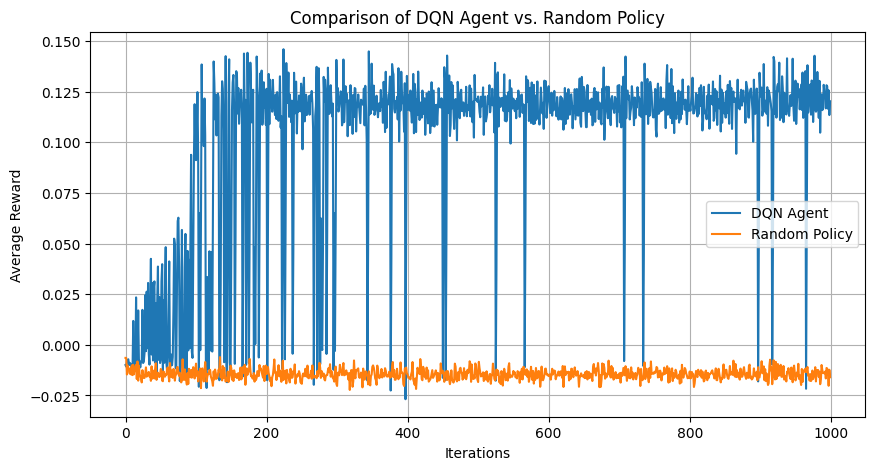

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(range(ITERATIONS), DQN_rewards, label='DQN Agent')
plt.plot(range(ITERATIONS), random_rewards, label='Random Policy')
plt.xlabel('Iterations')
plt.ylabel('Average Reward')
plt.title('Comparison of DQN Agent vs. Random Policy')
plt.legend()
plt.grid(True)
plt.show()

#Actor Critic Agent

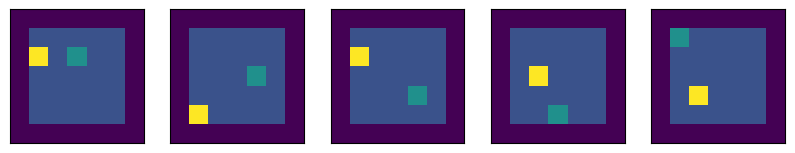

In [ ]:
%matplotlib inline
# function to standardize getting an env for the whole notebook
def get_env(n=1024):
    # n is the number of boards that you want to simulate parallely
    # size is the size of each board, also considering the borders
    # mask for the partially observable, is the size of the local neighborhood
    size = 7
    e = environments_fully_observable.OriginalSnakeEnvironment(n, size)
    # or environments_partially_observable.OriginalSnakeEnvironment(n, size, 2)
    return e
env_ = get_env()

fig,axs=plt.subplots(1,min(len(env_.boards), 5), figsize=(10,3))
for ax, board in zip(axs, env_.boards):
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    ax.imshow(board, origin="lower")

##Training

In [ ]:
# Initialize the agent
state_space_shape = env_.to_state().shape
action_space_size = 5
agent = ActorCriticAgent(action_space_size, state_space_shape)
actor_critic_rewards = []

# Training parameters
ITERATIONS = 1000

# Training loop
for _ in trange(ITERATIONS):

    # Get state
    state = env_.to_state()

    # Choose action
    action = agent.choose_action(state)

    # Take action and observe next state and reward
    reward = env_.move(action)
    actor_critic_rewards.append(np.mean(reward))

    # Save next state
    next_state = env_.to_state()

    # Update agent
    agent.update_actor_critic(state, action, reward, next_state)

    # Decay exploration rate after each episode
    agent.decay_exploration_rate()

  0%|          | 0/1000 [00:00<?, ?it/s]

32/32 [==============================] - 0s 1ms/step


  0%|          | 1/1000 [00:02<41:01,  2.46s/it]

32/32 [==============================] - 0s 2ms/step


  0%|          | 2/1000 [00:03<25:39,  1.54s/it]

32/32 [==============================] - 0s 1ms/step


  0%|          | 3/1000 [00:03<17:56,  1.08s/it]

32/32 [==============================] - 0s 1ms/step


  0%|          | 4/1000 [00:04<14:11,  1.17it/s]

32/32 [==============================] - 0s 1ms/step


  0%|          | 5/1000 [00:04<12:08,  1.37it/s]

32/32 [==============================] - 0s 1ms/step


  1%|          | 6/1000 [00:05<11:26,  1.45it/s]

32/32 [==============================] - 0s 1ms/step


  1%|          | 7/1000 [00:06<10:49,  1.53it/s]

32/32 [==============================] - 0s 2ms/step


  1%|          | 8/1000 [00:07<12:33,  1.32it/s]

32/32 [==============================] - 0s 1ms/step


  1%|          | 9/1000 [00:07<11:21,  1.45it/s]

32/32 [==============================] - 0s 1ms/step


  1%|          | 10/1000 [00:08<10:18,  1.60it/s]

32/32 [==============================] - 0s 1ms/step


  1%|          | 11/1000 [00:08<09:43,  1.70it/s]

32/32 [==============================] - 0s 1ms/step


  1%|          | 12/1000 [00:09<09:18,  1.77it/s]

32/32 [==============================] - 0s 1ms/step


  1%|▏         | 13/1000 [00:09<09:07,  1.80it/s]

32/32 [==============================] - 0s 1ms/step


  1%|▏         | 14/1000 [00:10<08:52,  1.85it/s]

32/32 [==============================] - 0s 1ms/step


  2%|▏         | 15/1000 [00:10<08:47,  1.87it/s]

32/32 [==============================] - 0s 1ms/step


  2%|▏         | 16/1000 [00:11<08:38,  1.90it/s]

32/32 [==============================] - 0s 1ms/step


  2%|▏         | 17/1000 [00:11<08:35,  1.91it/s]

32/32 [==============================] - 0s 1ms/step


  2%|▏         | 18/1000 [00:12<08:29,  1.93it/s]

32/32 [==============================] - 0s 1ms/step


  2%|▏         | 19/1000 [00:12<08:23,  1.95it/s]

32/32 [==============================] - 0s 1ms/step


  2%|▏         | 20/1000 [00:13<09:09,  1.78it/s]

32/32 [==============================] - 0s 2ms/step


  2%|▏         | 21/1000 [00:14<10:45,  1.52it/s]

32/32 [==============================] - 0s 2ms/step


  2%|▏         | 22/1000 [00:15<12:16,  1.33it/s]

32/32 [==============================] - 0s 2ms/step


  2%|▏         | 23/1000 [00:16<12:49,  1.27it/s]

32/32 [==============================] - 0s 1ms/step


  2%|▏         | 24/1000 [00:16<11:29,  1.42it/s]

32/32 [==============================] - 0s 1ms/step


  2%|▎         | 25/1000 [00:17<10:46,  1.51it/s]

32/32 [==============================] - 0s 1ms/step


  3%|▎         | 26/1000 [00:17<11:10,  1.45it/s]

32/32 [==============================] - 0s 1ms/step


  3%|▎         | 27/1000 [00:18<10:11,  1.59it/s]

32/32 [==============================] - 0s 1ms/step


  3%|▎         | 28/1000 [00:18<09:42,  1.67it/s]

32/32 [==============================] - 0s 1ms/step


  3%|▎         | 29/1000 [00:19<09:15,  1.75it/s]

32/32 [==============================] - 0s 1ms/step


  3%|▎         | 30/1000 [00:20<09:03,  1.78it/s]

32/32 [==============================] - 0s 1ms/step


  3%|▎         | 31/1000 [00:20<09:17,  1.74it/s]

32/32 [==============================] - 0s 2ms/step


  3%|▎         | 32/1000 [00:21<10:07,  1.59it/s]

32/32 [==============================] - 0s 1ms/step


  3%|▎         | 33/1000 [00:22<10:19,  1.56it/s]

32/32 [==============================] - 0s 1ms/step


  3%|▎         | 34/1000 [00:23<12:16,  1.31it/s]

32/32 [==============================] - 0s 1ms/step


  4%|▎         | 35/1000 [00:23<11:25,  1.41it/s]

32/32 [==============================] - 0s 1ms/step


  4%|▎         | 36/1000 [00:24<10:39,  1.51it/s]

32/32 [==============================] - 0s 2ms/step


  4%|▎         | 37/1000 [00:24<11:00,  1.46it/s]

32/32 [==============================] - 0s 1ms/step


  4%|▍         | 38/1000 [00:25<10:16,  1.56it/s]

32/32 [==============================] - 0s 1ms/step


  4%|▍         | 39/1000 [00:26<10:49,  1.48it/s]

32/32 [==============================] - 0s 2ms/step


  4%|▍         | 40/1000 [00:27<12:53,  1.24it/s]

32/32 [==============================] - 0s 3ms/step


  4%|▍         | 41/1000 [00:28<13:40,  1.17it/s]

32/32 [==============================] - 0s 1ms/step


  4%|▍         | 42/1000 [00:29<14:30,  1.10it/s]

32/32 [==============================] - 0s 2ms/step


  4%|▍         | 43/1000 [00:30<13:39,  1.17it/s]

32/32 [==============================] - 0s 1ms/step


  4%|▍         | 44/1000 [00:30<12:19,  1.29it/s]

32/32 [==============================] - 0s 1ms/step


  4%|▍         | 45/1000 [00:31<12:36,  1.26it/s]

32/32 [==============================] - 0s 1ms/step


  5%|▍         | 46/1000 [00:32<12:12,  1.30it/s]

32/32 [==============================] - 0s 1ms/step


  5%|▍         | 47/1000 [00:32<11:15,  1.41it/s]

32/32 [==============================] - 0s 1ms/step


  5%|▍         | 48/1000 [00:33<11:01,  1.44it/s]

32/32 [==============================] - 0s 2ms/step


  5%|▍         | 49/1000 [00:34<11:16,  1.41it/s]

32/32 [==============================] - 0s 1ms/step


  5%|▌         | 50/1000 [00:34<10:35,  1.49it/s]

32/32 [==============================] - 0s 1ms/step


  5%|▌         | 51/1000 [00:35<10:26,  1.52it/s]

32/32 [==============================] - 0s 1ms/step


  5%|▌         | 52/1000 [00:35<09:52,  1.60it/s]

32/32 [==============================] - 0s 1ms/step


  5%|▌         | 53/1000 [00:36<10:43,  1.47it/s]

32/32 [==============================] - 0s 1ms/step


  5%|▌         | 54/1000 [00:37<10:30,  1.50it/s]

32/32 [==============================] - 0s 1ms/step


  6%|▌         | 55/1000 [00:37<09:59,  1.58it/s]

32/32 [==============================] - 0s 1ms/step


  6%|▌         | 56/1000 [00:38<09:40,  1.63it/s]

32/32 [==============================] - 0s 2ms/step


  6%|▌         | 57/1000 [00:39<10:23,  1.51it/s]

32/32 [==============================] - 0s 2ms/step


  6%|▌         | 58/1000 [00:40<12:32,  1.25it/s]

32/32 [==============================] - 0s 2ms/step


  6%|▌         | 59/1000 [00:41<14:19,  1.09it/s]

32/32 [==============================] - 0s 1ms/step


  6%|▌         | 60/1000 [00:42<13:26,  1.17it/s]

32/32 [==============================] - 0s 1ms/step


  6%|▌         | 61/1000 [00:42<11:53,  1.32it/s]

32/32 [==============================] - 0s 1ms/step


  6%|▌         | 62/1000 [00:43<11:23,  1.37it/s]

32/32 [==============================] - 0s 1ms/step


  6%|▋         | 63/1000 [00:44<10:24,  1.50it/s]

32/32 [==============================] - 0s 1ms/step


  6%|▋         | 64/1000 [00:44<09:46,  1.59it/s]

32/32 [==============================] - 0s 1ms/step


  6%|▋         | 65/1000 [00:45<10:26,  1.49it/s]

32/32 [==============================] - 0s 1ms/step


  7%|▋         | 66/1000 [00:46<10:27,  1.49it/s]

32/32 [==============================] - 0s 1ms/step


  7%|▋         | 67/1000 [00:46<10:56,  1.42it/s]

32/32 [==============================] - 0s 1ms/step


  7%|▋         | 68/1000 [00:47<10:10,  1.53it/s]

32/32 [==============================] - 0s 1ms/step


  7%|▋         | 69/1000 [00:47<09:37,  1.61it/s]

32/32 [==============================] - 0s 1ms/step


  7%|▋         | 70/1000 [00:48<09:15,  1.67it/s]

32/32 [==============================] - 0s 1ms/step


  7%|▋         | 71/1000 [00:49<10:06,  1.53it/s]

32/32 [==============================] - 0s 1ms/step


  7%|▋         | 72/1000 [00:49<10:06,  1.53it/s]

32/32 [==============================] - 0s 2ms/step


  7%|▋         | 73/1000 [00:50<11:15,  1.37it/s]

32/32 [==============================] - 0s 1ms/step


  7%|▋         | 74/1000 [00:51<11:34,  1.33it/s]

32/32 [==============================] - 0s 2ms/step


  8%|▊         | 75/1000 [00:52<12:19,  1.25it/s]

32/32 [==============================] - 0s 3ms/step


  8%|▊         | 76/1000 [00:53<13:56,  1.10it/s]

32/32 [==============================] - 0s 3ms/step


  8%|▊         | 77/1000 [00:54<14:27,  1.06it/s]

32/32 [==============================] - 0s 1ms/step


  8%|▊         | 78/1000 [00:55<12:38,  1.22it/s]

32/32 [==============================] - 0s 1ms/step


  8%|▊         | 79/1000 [00:55<11:59,  1.28it/s]

32/32 [==============================] - 0s 1ms/step


  8%|▊         | 80/1000 [00:56<10:56,  1.40it/s]

32/32 [==============================] - 0s 1ms/step


  8%|▊         | 81/1000 [00:57<10:44,  1.43it/s]

32/32 [==============================] - 0s 1ms/step


  8%|▊         | 82/1000 [00:57<10:01,  1.53it/s]

32/32 [==============================] - 0s 1ms/step


  8%|▊         | 83/1000 [00:58<10:03,  1.52it/s]

32/32 [==============================] - 0s 1ms/step


  8%|▊         | 84/1000 [00:58<09:51,  1.55it/s]

32/32 [==============================] - 0s 1ms/step


  8%|▊         | 85/1000 [00:59<09:57,  1.53it/s]

32/32 [==============================] - 0s 1ms/step


  9%|▊         | 86/1000 [01:00<09:57,  1.53it/s]

32/32 [==============================] - 0s 1ms/step


  9%|▊         | 87/1000 [01:00<09:24,  1.62it/s]

32/32 [==============================] - 0s 1ms/step


  9%|▉         | 88/1000 [01:01<09:38,  1.58it/s]

32/32 [==============================] - 0s 1ms/step


  9%|▉         | 89/1000 [01:02<09:06,  1.67it/s]

32/32 [==============================] - 0s 1ms/step


  9%|▉         | 90/1000 [01:02<09:19,  1.63it/s]

32/32 [==============================] - 0s 1ms/step


  9%|▉         | 91/1000 [01:03<09:48,  1.54it/s]

32/32 [==============================] - 0s 2ms/step


  9%|▉         | 92/1000 [01:04<09:58,  1.52it/s]

32/32 [==============================] - 0s 2ms/step


  9%|▉         | 93/1000 [01:04<10:54,  1.39it/s]

32/32 [==============================] - 0s 2ms/step


  9%|▉         | 94/1000 [01:06<12:32,  1.20it/s]

32/32 [==============================] - 0s 2ms/step


 10%|▉         | 95/1000 [01:07<13:53,  1.09it/s]

32/32 [==============================] - 0s 1ms/step


 10%|▉         | 96/1000 [01:07<13:17,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 10%|▉         | 97/1000 [01:08<11:40,  1.29it/s]

32/32 [==============================] - 0s 1ms/step


 10%|▉         | 98/1000 [01:08<10:31,  1.43it/s]

32/32 [==============================] - 0s 1ms/step


 10%|▉         | 99/1000 [01:09<10:43,  1.40it/s]

32/32 [==============================] - 0s 1ms/step


 10%|█         | 100/1000 [01:10<09:46,  1.54it/s]

32/32 [==============================] - 0s 1ms/step


 10%|█         | 101/1000 [01:10<09:11,  1.63it/s]

32/32 [==============================] - 0s 1ms/step


 10%|█         | 102/1000 [01:11<09:41,  1.54it/s]

32/32 [==============================] - 0s 1ms/step


 10%|█         | 103/1000 [01:12<09:56,  1.50it/s]

32/32 [==============================] - 0s 1ms/step


 10%|█         | 104/1000 [01:12<09:59,  1.49it/s]

32/32 [==============================] - 0s 1ms/step


 10%|█         | 105/1000 [01:13<10:01,  1.49it/s]

32/32 [==============================] - 0s 1ms/step


 11%|█         | 106/1000 [01:14<09:24,  1.58it/s]

32/32 [==============================] - 0s 2ms/step


 11%|█         | 107/1000 [01:14<10:29,  1.42it/s]

32/32 [==============================] - 0s 1ms/step


 11%|█         | 108/1000 [01:15<09:51,  1.51it/s]

32/32 [==============================] - 0s 2ms/step


 11%|█         | 109/1000 [01:16<10:18,  1.44it/s]

32/32 [==============================] - 0s 1ms/step


 11%|█         | 110/1000 [01:17<10:19,  1.44it/s]

32/32 [==============================] - 0s 2ms/step


 11%|█         | 111/1000 [01:18<12:18,  1.20it/s]

32/32 [==============================] - 0s 2ms/step


 11%|█         | 112/1000 [01:19<13:30,  1.10it/s]

32/32 [==============================] - 0s 2ms/step


 11%|█▏        | 113/1000 [01:20<13:12,  1.12it/s]

32/32 [==============================] - 0s 1ms/step


 11%|█▏        | 114/1000 [01:20<12:15,  1.20it/s]

32/32 [==============================] - 0s 1ms/step


 12%|█▏        | 115/1000 [01:21<12:06,  1.22it/s]

32/32 [==============================] - 0s 1ms/step


 12%|█▏        | 116/1000 [01:22<11:25,  1.29it/s]

32/32 [==============================] - 0s 2ms/step


 12%|█▏        | 117/1000 [01:22<11:03,  1.33it/s]

32/32 [==============================] - 0s 1ms/step


 12%|█▏        | 118/1000 [01:23<11:04,  1.33it/s]

32/32 [==============================] - 0s 2ms/step


 12%|█▏        | 119/1000 [01:24<11:13,  1.31it/s]

32/32 [==============================] - 0s 1ms/step


 12%|█▏        | 120/1000 [01:25<10:48,  1.36it/s]

32/32 [==============================] - 0s 2ms/step


 12%|█▏        | 121/1000 [01:25<10:55,  1.34it/s]

32/32 [==============================] - 0s 1ms/step


 12%|█▏        | 122/1000 [01:26<10:48,  1.35it/s]

32/32 [==============================] - 0s 1ms/step


 12%|█▏        | 123/1000 [01:27<10:33,  1.38it/s]

32/32 [==============================] - 0s 1ms/step


 12%|█▏        | 124/1000 [01:28<10:20,  1.41it/s]

32/32 [==============================] - 0s 1ms/step


 12%|█▎        | 125/1000 [01:28<10:57,  1.33it/s]

32/32 [==============================] - 0s 1ms/step


 13%|█▎        | 126/1000 [01:29<10:59,  1.33it/s]

32/32 [==============================] - 0s 3ms/step


 13%|█▎        | 127/1000 [01:30<12:17,  1.18it/s]

32/32 [==============================] - 0s 2ms/step


 13%|█▎        | 128/1000 [01:31<12:12,  1.19it/s]

32/32 [==============================] - 0s 3ms/step


 13%|█▎        | 129/1000 [01:32<13:48,  1.05it/s]

32/32 [==============================] - 0s 1ms/step


 13%|█▎        | 130/1000 [01:33<12:55,  1.12it/s]

32/32 [==============================] - 0s 1ms/step


 13%|█▎        | 131/1000 [01:34<12:17,  1.18it/s]

32/32 [==============================] - 0s 1ms/step


 13%|█▎        | 132/1000 [01:34<11:42,  1.24it/s]

32/32 [==============================] - 0s 1ms/step


 13%|█▎        | 133/1000 [01:35<11:16,  1.28it/s]

32/32 [==============================] - 0s 1ms/step


 13%|█▎        | 134/1000 [01:36<11:19,  1.27it/s]

32/32 [==============================] - 0s 1ms/step


 14%|█▎        | 135/1000 [01:37<10:57,  1.32it/s]

32/32 [==============================] - 0s 1ms/step


 14%|█▎        | 136/1000 [01:37<11:00,  1.31it/s]

32/32 [==============================] - 0s 1ms/step


 14%|█▎        | 137/1000 [01:38<10:03,  1.43it/s]

32/32 [==============================] - 0s 1ms/step


 14%|█▍        | 138/1000 [01:39<10:08,  1.42it/s]

32/32 [==============================] - 0s 1ms/step


 14%|█▍        | 139/1000 [01:39<10:27,  1.37it/s]

32/32 [==============================] - 0s 1ms/step


 14%|█▍        | 140/1000 [01:40<10:31,  1.36it/s]

32/32 [==============================] - 0s 1ms/step


 14%|█▍        | 141/1000 [01:41<09:56,  1.44it/s]

32/32 [==============================] - 0s 1ms/step


 14%|█▍        | 142/1000 [01:41<09:20,  1.53it/s]

32/32 [==============================] - 0s 1ms/step


 14%|█▍        | 143/1000 [01:42<10:25,  1.37it/s]

32/32 [==============================] - 0s 3ms/step


 14%|█▍        | 144/1000 [01:43<11:55,  1.20it/s]

32/32 [==============================] - 0s 2ms/step


 14%|█▍        | 145/1000 [01:45<13:45,  1.04it/s]

32/32 [==============================] - 0s 1ms/step


 15%|█▍        | 146/1000 [01:46<13:31,  1.05it/s]

32/32 [==============================] - 0s 1ms/step


 15%|█▍        | 147/1000 [01:46<12:26,  1.14it/s]

32/32 [==============================] - 0s 2ms/step


 15%|█▍        | 148/1000 [01:47<11:52,  1.20it/s]

32/32 [==============================] - 0s 1ms/step


 15%|█▍        | 149/1000 [01:48<11:12,  1.27it/s]

32/32 [==============================] - 0s 1ms/step


 15%|█▌        | 150/1000 [01:48<10:52,  1.30it/s]

32/32 [==============================] - 0s 1ms/step


 15%|█▌        | 151/1000 [01:49<10:37,  1.33it/s]

32/32 [==============================] - 0s 1ms/step


 15%|█▌        | 152/1000 [01:50<10:48,  1.31it/s]

32/32 [==============================] - 0s 1ms/step


 15%|█▌        | 153/1000 [01:51<10:35,  1.33it/s]

32/32 [==============================] - 0s 1ms/step


 15%|█▌        | 154/1000 [01:51<09:36,  1.47it/s]

32/32 [==============================] - 0s 1ms/step


 16%|█▌        | 155/1000 [01:52<10:02,  1.40it/s]

32/32 [==============================] - 0s 1ms/step


 16%|█▌        | 156/1000 [01:52<09:14,  1.52it/s]

32/32 [==============================] - 0s 2ms/step


 16%|█▌        | 157/1000 [01:53<09:50,  1.43it/s]

32/32 [==============================] - 0s 1ms/step


 16%|█▌        | 158/1000 [01:54<09:49,  1.43it/s]

32/32 [==============================] - 0s 1ms/step


 16%|█▌        | 159/1000 [01:55<09:48,  1.43it/s]

32/32 [==============================] - 0s 2ms/step


 16%|█▌        | 160/1000 [01:56<11:39,  1.20it/s]

32/32 [==============================] - 0s 2ms/step


 16%|█▌        | 161/1000 [01:57<12:52,  1.09it/s]

32/32 [==============================] - 0s 2ms/step


 16%|█▌        | 162/1000 [01:58<12:03,  1.16it/s]

32/32 [==============================] - 0s 1ms/step


 16%|█▋        | 163/1000 [01:58<11:13,  1.24it/s]

32/32 [==============================] - 0s 1ms/step


 16%|█▋        | 164/1000 [01:59<10:29,  1.33it/s]

32/32 [==============================] - 0s 1ms/step


 16%|█▋        | 165/1000 [02:00<10:29,  1.33it/s]

32/32 [==============================] - 0s 1ms/step


 17%|█▋        | 166/1000 [02:00<10:19,  1.35it/s]

32/32 [==============================] - 0s 1ms/step


 17%|█▋        | 167/1000 [02:01<09:57,  1.40it/s]

32/32 [==============================] - 0s 1ms/step


 17%|█▋        | 168/1000 [02:02<09:43,  1.43it/s]

32/32 [==============================] - 0s 1ms/step


 17%|█▋        | 169/1000 [02:03<09:51,  1.41it/s]

32/32 [==============================] - 0s 1ms/step


 17%|█▋        | 170/1000 [02:03<09:05,  1.52it/s]

32/32 [==============================] - 0s 1ms/step


 17%|█▋        | 171/1000 [02:04<09:05,  1.52it/s]

32/32 [==============================] - 0s 1ms/step


 17%|█▋        | 172/1000 [02:04<09:10,  1.51it/s]

32/32 [==============================] - 0s 1ms/step


 17%|█▋        | 173/1000 [02:05<09:32,  1.44it/s]

32/32 [==============================] - 0s 1ms/step


 17%|█▋        | 174/1000 [02:06<09:09,  1.50it/s]

32/32 [==============================] - 0s 1ms/step


 18%|█▊        | 175/1000 [02:06<09:07,  1.51it/s]

32/32 [==============================] - 0s 1ms/step


 18%|█▊        | 176/1000 [02:07<09:03,  1.52it/s]

32/32 [==============================] - 0s 1ms/step


 18%|█▊        | 177/1000 [02:08<10:01,  1.37it/s]

32/32 [==============================] - 0s 2ms/step


 18%|█▊        | 178/1000 [02:09<11:15,  1.22it/s]

32/32 [==============================] - 0s 2ms/step


 18%|█▊        | 179/1000 [02:10<12:38,  1.08it/s]

32/32 [==============================] - 0s 2ms/step


 18%|█▊        | 180/1000 [02:11<11:36,  1.18it/s]

32/32 [==============================] - 0s 1ms/step


 18%|█▊        | 181/1000 [02:11<10:51,  1.26it/s]

32/32 [==============================] - 0s 1ms/step


 18%|█▊        | 182/1000 [02:12<10:50,  1.26it/s]

32/32 [==============================] - 0s 1ms/step


 18%|█▊        | 183/1000 [02:13<10:17,  1.32it/s]

32/32 [==============================] - 0s 1ms/step


 18%|█▊        | 184/1000 [02:14<10:14,  1.33it/s]

32/32 [==============================] - 0s 1ms/step


 18%|█▊        | 185/1000 [02:14<10:15,  1.32it/s]

32/32 [==============================] - 0s 1ms/step


 19%|█▊        | 186/1000 [02:15<09:56,  1.37it/s]

32/32 [==============================] - 0s 2ms/step


 19%|█▊        | 187/1000 [02:16<09:48,  1.38it/s]

32/32 [==============================] - 0s 1ms/step


 19%|█▉        | 188/1000 [02:17<09:39,  1.40it/s]

32/32 [==============================] - 0s 1ms/step


 19%|█▉        | 189/1000 [02:17<09:37,  1.40it/s]

32/32 [==============================] - 0s 1ms/step


 19%|█▉        | 190/1000 [02:18<09:25,  1.43it/s]

32/32 [==============================] - 0s 1ms/step


 19%|█▉        | 191/1000 [02:19<09:14,  1.46it/s]

32/32 [==============================] - 0s 1ms/step


 19%|█▉        | 192/1000 [02:19<09:19,  1.44it/s]

32/32 [==============================] - 0s 1ms/step


 19%|█▉        | 193/1000 [02:20<09:18,  1.44it/s]

32/32 [==============================] - 0s 3ms/step


 19%|█▉        | 194/1000 [02:21<10:45,  1.25it/s]

32/32 [==============================] - 0s 2ms/step


 20%|█▉        | 195/1000 [02:22<11:58,  1.12it/s]

32/32 [==============================] - 0s 2ms/step


 20%|█▉        | 196/1000 [02:23<12:28,  1.07it/s]

32/32 [==============================] - 0s 1ms/step


 20%|█▉        | 197/1000 [02:24<11:24,  1.17it/s]

32/32 [==============================] - 0s 1ms/step


 20%|█▉        | 198/1000 [02:24<10:08,  1.32it/s]

32/32 [==============================] - 0s 1ms/step


 20%|█▉        | 199/1000 [02:25<09:51,  1.35it/s]

32/32 [==============================] - 0s 2ms/step


 20%|██        | 200/1000 [02:26<09:36,  1.39it/s]

32/32 [==============================] - 0s 1ms/step


 20%|██        | 201/1000 [02:26<09:31,  1.40it/s]

32/32 [==============================] - 0s 1ms/step


 20%|██        | 202/1000 [02:27<09:22,  1.42it/s]

32/32 [==============================] - 0s 1ms/step


 20%|██        | 203/1000 [02:28<09:15,  1.43it/s]

32/32 [==============================] - 0s 2ms/step


 20%|██        | 204/1000 [02:29<09:30,  1.39it/s]

32/32 [==============================] - 0s 2ms/step


 20%|██        | 205/1000 [02:29<09:43,  1.36it/s]

32/32 [==============================] - 0s 1ms/step


 21%|██        | 206/1000 [02:30<10:03,  1.32it/s]

32/32 [==============================] - 0s 1ms/step


 21%|██        | 207/1000 [02:31<09:42,  1.36it/s]

32/32 [==============================] - 0s 1ms/step


 21%|██        | 208/1000 [02:31<09:29,  1.39it/s]

32/32 [==============================] - 0s 1ms/step


 21%|██        | 209/1000 [02:32<09:20,  1.41it/s]

32/32 [==============================] - 0s 2ms/step


 21%|██        | 210/1000 [02:33<08:37,  1.53it/s]

32/32 [==============================] - 0s 1ms/step


 21%|██        | 211/1000 [02:33<08:37,  1.52it/s]

32/32 [==============================] - 0s 2ms/step


 21%|██        | 212/1000 [02:34<10:18,  1.27it/s]

32/32 [==============================] - 0s 2ms/step


 21%|██▏       | 213/1000 [02:35<11:01,  1.19it/s]

32/32 [==============================] - 0s 1ms/step


 21%|██▏       | 214/1000 [02:37<12:34,  1.04it/s]

32/32 [==============================] - 0s 1ms/step


 22%|██▏       | 215/1000 [02:37<11:37,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 22%|██▏       | 216/1000 [02:38<11:17,  1.16it/s]

32/32 [==============================] - 0s 2ms/step


 22%|██▏       | 217/1000 [02:39<10:53,  1.20it/s]

32/32 [==============================] - 0s 1ms/step


 22%|██▏       | 218/1000 [02:40<11:10,  1.17it/s]

32/32 [==============================] - 0s 2ms/step


 22%|██▏       | 219/1000 [02:41<10:49,  1.20it/s]

32/32 [==============================] - 0s 1ms/step


 22%|██▏       | 220/1000 [02:41<10:24,  1.25it/s]

32/32 [==============================] - 0s 1ms/step


 22%|██▏       | 221/1000 [02:42<10:06,  1.29it/s]

32/32 [==============================] - 0s 1ms/step


 22%|██▏       | 222/1000 [02:43<09:53,  1.31it/s]

32/32 [==============================] - 0s 1ms/step


 22%|██▏       | 223/1000 [02:44<09:42,  1.33it/s]

32/32 [==============================] - 0s 1ms/step


 22%|██▏       | 224/1000 [02:44<09:29,  1.36it/s]

32/32 [==============================] - 0s 1ms/step


 22%|██▎       | 225/1000 [02:45<10:08,  1.27it/s]

32/32 [==============================] - 0s 1ms/step


 23%|██▎       | 226/1000 [02:46<09:50,  1.31it/s]

32/32 [==============================] - 0s 2ms/step


 23%|██▎       | 227/1000 [02:47<11:08,  1.16it/s]

32/32 [==============================] - 0s 3ms/step


 23%|██▎       | 228/1000 [02:48<12:33,  1.02it/s]

32/32 [==============================] - 0s 1ms/step


 23%|██▎       | 229/1000 [02:49<12:18,  1.04it/s]

32/32 [==============================] - 0s 1ms/step


 23%|██▎       | 230/1000 [02:50<11:47,  1.09it/s]

32/32 [==============================] - 0s 1ms/step


 23%|██▎       | 231/1000 [02:51<11:03,  1.16it/s]

32/32 [==============================] - 0s 1ms/step


 23%|██▎       | 232/1000 [02:51<10:11,  1.26it/s]

32/32 [==============================] - 0s 1ms/step


 23%|██▎       | 233/1000 [02:52<09:18,  1.37it/s]

32/32 [==============================] - 0s 1ms/step


 23%|██▎       | 234/1000 [02:53<09:17,  1.37it/s]

32/32 [==============================] - 0s 1ms/step


 24%|██▎       | 235/1000 [02:53<09:08,  1.39it/s]

32/32 [==============================] - 0s 1ms/step


 24%|██▎       | 236/1000 [02:54<09:07,  1.40it/s]

32/32 [==============================] - 0s 1ms/step


 24%|██▎       | 237/1000 [02:55<08:30,  1.49it/s]

32/32 [==============================] - 0s 1ms/step


 24%|██▍       | 238/1000 [02:55<08:33,  1.48it/s]

32/32 [==============================] - 0s 2ms/step


 24%|██▍       | 239/1000 [02:56<08:47,  1.44it/s]

32/32 [==============================] - 0s 1ms/step


 24%|██▍       | 240/1000 [02:57<08:46,  1.44it/s]

32/32 [==============================] - 0s 1ms/step


 24%|██▍       | 241/1000 [02:57<08:41,  1.46it/s]

32/32 [==============================] - 0s 1ms/step


 24%|██▍       | 242/1000 [02:58<08:44,  1.45it/s]

32/32 [==============================] - 0s 1ms/step


 24%|██▍       | 243/1000 [02:59<08:00,  1.57it/s]

32/32 [==============================] - 0s 3ms/step


 24%|██▍       | 244/1000 [02:59<08:50,  1.43it/s]

32/32 [==============================] - 0s 3ms/step


 24%|██▍       | 245/1000 [03:01<10:23,  1.21it/s]

32/32 [==============================] - 0s 2ms/step


 25%|██▍       | 246/1000 [03:02<11:22,  1.10it/s]

32/32 [==============================] - 0s 1ms/step


 25%|██▍       | 247/1000 [03:02<10:39,  1.18it/s]

32/32 [==============================] - 0s 1ms/step


 25%|██▍       | 248/1000 [03:03<10:23,  1.21it/s]

32/32 [==============================] - 0s 1ms/step


 25%|██▍       | 249/1000 [03:04<09:57,  1.26it/s]

32/32 [==============================] - 0s 1ms/step


 25%|██▌       | 250/1000 [03:05<09:48,  1.28it/s]

32/32 [==============================] - 0s 1ms/step


 25%|██▌       | 251/1000 [03:05<09:24,  1.33it/s]

32/32 [==============================] - 0s 1ms/step


 25%|██▌       | 252/1000 [03:06<09:10,  1.36it/s]

32/32 [==============================] - 0s 1ms/step


 25%|██▌       | 253/1000 [03:07<08:54,  1.40it/s]

32/32 [==============================] - 0s 1ms/step


 25%|██▌       | 254/1000 [03:07<09:04,  1.37it/s]

32/32 [==============================] - 0s 1ms/step


 26%|██▌       | 255/1000 [03:08<08:52,  1.40it/s]

32/32 [==============================] - 0s 1ms/step


 26%|██▌       | 256/1000 [03:09<08:54,  1.39it/s]

32/32 [==============================] - 0s 1ms/step


 26%|██▌       | 257/1000 [03:09<08:44,  1.42it/s]

32/32 [==============================] - 0s 1ms/step


 26%|██▌       | 258/1000 [03:10<08:32,  1.45it/s]

32/32 [==============================] - 0s 1ms/step


 26%|██▌       | 259/1000 [03:11<08:40,  1.42it/s]

32/32 [==============================] - 0s 1ms/step


 26%|██▌       | 260/1000 [03:12<08:32,  1.44it/s]

32/32 [==============================] - 0s 2ms/step


 26%|██▌       | 261/1000 [03:13<10:02,  1.23it/s]

32/32 [==============================] - 0s 2ms/step


 26%|██▌       | 262/1000 [03:14<11:41,  1.05it/s]

32/32 [==============================] - 0s 2ms/step


 26%|██▋       | 263/1000 [03:15<10:59,  1.12it/s]

32/32 [==============================] - 0s 1ms/step


 26%|██▋       | 264/1000 [03:15<10:09,  1.21it/s]

32/32 [==============================] - 0s 1ms/step


 26%|██▋       | 265/1000 [03:16<09:45,  1.26it/s]

32/32 [==============================] - 0s 2ms/step


 27%|██▋       | 266/1000 [03:17<09:39,  1.27it/s]

32/32 [==============================] - 0s 1ms/step


 27%|██▋       | 267/1000 [03:18<09:16,  1.32it/s]

32/32 [==============================] - 0s 2ms/step


 27%|██▋       | 268/1000 [03:18<09:17,  1.31it/s]

32/32 [==============================] - 0s 1ms/step


 27%|██▋       | 269/1000 [03:19<09:03,  1.35it/s]

32/32 [==============================] - 0s 1ms/step


 27%|██▋       | 270/1000 [03:20<08:45,  1.39it/s]

32/32 [==============================] - 0s 1ms/step


 27%|██▋       | 271/1000 [03:20<08:50,  1.37it/s]

32/32 [==============================] - 0s 2ms/step


 27%|██▋       | 272/1000 [03:22<10:37,  1.14it/s]

32/32 [==============================] - 0s 2ms/step


 27%|██▋       | 273/1000 [03:23<11:41,  1.04it/s]

32/32 [==============================] - 0s 1ms/step


 27%|██▋       | 274/1000 [03:24<10:58,  1.10it/s]

32/32 [==============================] - 0s 2ms/step


 28%|██▊       | 275/1000 [03:24<10:59,  1.10it/s]

32/32 [==============================] - 0s 2ms/step


 28%|██▊       | 276/1000 [03:26<12:12,  1.01s/it]

32/32 [==============================] - 0s 2ms/step


 28%|██▊       | 277/1000 [03:27<12:46,  1.06s/it]

32/32 [==============================] - 0s 1ms/step


 28%|██▊       | 278/1000 [03:28<11:23,  1.06it/s]

32/32 [==============================] - 0s 1ms/step


 28%|██▊       | 279/1000 [03:28<10:28,  1.15it/s]

32/32 [==============================] - 0s 1ms/step


 28%|██▊       | 280/1000 [03:29<09:46,  1.23it/s]

32/32 [==============================] - 0s 1ms/step


 28%|██▊       | 281/1000 [03:30<09:16,  1.29it/s]

32/32 [==============================] - 0s 1ms/step


 28%|██▊       | 282/1000 [03:30<08:58,  1.33it/s]

32/32 [==============================] - 0s 1ms/step


 28%|██▊       | 283/1000 [03:31<08:44,  1.37it/s]

32/32 [==============================] - 0s 1ms/step


 28%|██▊       | 284/1000 [03:32<08:26,  1.41it/s]

32/32 [==============================] - 0s 1ms/step


 28%|██▊       | 285/1000 [03:32<08:15,  1.44it/s]

32/32 [==============================] - 0s 1ms/step


 29%|██▊       | 286/1000 [03:33<08:22,  1.42it/s]

32/32 [==============================] - 0s 1ms/step


 29%|██▊       | 287/1000 [03:34<08:12,  1.45it/s]

32/32 [==============================] - 0s 1ms/step


 29%|██▉       | 288/1000 [03:34<08:09,  1.46it/s]

32/32 [==============================] - 0s 1ms/step


 29%|██▉       | 289/1000 [03:35<08:03,  1.47it/s]

32/32 [==============================] - 0s 1ms/step


 29%|██▉       | 290/1000 [03:36<07:57,  1.49it/s]

32/32 [==============================] - 0s 1ms/step


 29%|██▉       | 291/1000 [03:36<08:06,  1.46it/s]

32/32 [==============================] - 0s 1ms/step


 29%|██▉       | 292/1000 [03:37<09:09,  1.29it/s]

32/32 [==============================] - 0s 2ms/step


 29%|██▉       | 293/1000 [03:39<10:21,  1.14it/s]

32/32 [==============================] - 0s 2ms/step


 29%|██▉       | 294/1000 [03:40<11:06,  1.06it/s]

32/32 [==============================] - 0s 1ms/step


 30%|██▉       | 295/1000 [03:40<10:10,  1.16it/s]

32/32 [==============================] - 0s 1ms/step


 30%|██▉       | 296/1000 [03:41<09:19,  1.26it/s]

32/32 [==============================] - 0s 2ms/step


 30%|██▉       | 297/1000 [03:42<08:41,  1.35it/s]

32/32 [==============================] - 0s 1ms/step


 30%|██▉       | 298/1000 [03:42<08:24,  1.39it/s]

32/32 [==============================] - 0s 1ms/step


 30%|██▉       | 299/1000 [03:43<08:13,  1.42it/s]

32/32 [==============================] - 0s 1ms/step


 30%|███       | 300/1000 [03:44<08:00,  1.46it/s]

32/32 [==============================] - 0s 1ms/step


 30%|███       | 301/1000 [03:44<08:05,  1.44it/s]

32/32 [==============================] - 0s 1ms/step


 30%|███       | 302/1000 [03:45<08:17,  1.40it/s]

32/32 [==============================] - 0s 2ms/step


 30%|███       | 303/1000 [03:46<08:20,  1.39it/s]

32/32 [==============================] - 0s 1ms/step


 30%|███       | 304/1000 [03:46<08:05,  1.43it/s]

32/32 [==============================] - 0s 1ms/step


 30%|███       | 305/1000 [03:47<07:55,  1.46it/s]

32/32 [==============================] - 0s 1ms/step


 31%|███       | 306/1000 [03:48<08:09,  1.42it/s]

32/32 [==============================] - 0s 2ms/step


 31%|███       | 307/1000 [03:49<09:11,  1.26it/s]

32/32 [==============================] - 0s 1ms/step


 31%|███       | 308/1000 [03:50<08:48,  1.31it/s]

32/32 [==============================] - 0s 3ms/step


 31%|███       | 309/1000 [03:51<10:23,  1.11it/s]

32/32 [==============================] - 0s 3ms/step


 31%|███       | 310/1000 [03:52<11:31,  1.00s/it]

32/32 [==============================] - 0s 1ms/step


 31%|███       | 311/1000 [03:53<11:18,  1.02it/s]

32/32 [==============================] - 0s 1ms/step


 31%|███       | 312/1000 [03:54<10:56,  1.05it/s]

32/32 [==============================] - 0s 1ms/step


 31%|███▏      | 313/1000 [03:55<10:26,  1.10it/s]

32/32 [==============================] - 0s 1ms/step


 31%|███▏      | 314/1000 [03:55<09:47,  1.17it/s]

32/32 [==============================] - 0s 1ms/step


 32%|███▏      | 315/1000 [03:56<09:30,  1.20it/s]

32/32 [==============================] - 0s 2ms/step


 32%|███▏      | 316/1000 [03:57<09:21,  1.22it/s]

32/32 [==============================] - 0s 1ms/step


 32%|███▏      | 317/1000 [03:58<08:57,  1.27it/s]

32/32 [==============================] - 0s 1ms/step


 32%|███▏      | 318/1000 [03:58<09:01,  1.26it/s]

32/32 [==============================] - 0s 1ms/step


 32%|███▏      | 319/1000 [03:59<08:47,  1.29it/s]

32/32 [==============================] - 0s 1ms/step


 32%|███▏      | 320/1000 [04:00<08:33,  1.33it/s]

32/32 [==============================] - 0s 1ms/step


 32%|███▏      | 321/1000 [04:01<08:22,  1.35it/s]

32/32 [==============================] - 0s 1ms/step


 32%|███▏      | 322/1000 [04:01<08:34,  1.32it/s]

32/32 [==============================] - 0s 1ms/step


 32%|███▏      | 323/1000 [04:02<08:29,  1.33it/s]

32/32 [==============================] - 0s 2ms/step


 32%|███▏      | 324/1000 [04:03<09:34,  1.18it/s]

32/32 [==============================] - 0s 2ms/step


 32%|███▎      | 325/1000 [04:04<10:30,  1.07it/s]

32/32 [==============================] - 0s 1ms/step


 33%|███▎      | 326/1000 [04:05<10:47,  1.04it/s]

32/32 [==============================] - 0s 1ms/step


 33%|███▎      | 327/1000 [04:06<09:57,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 33%|███▎      | 328/1000 [04:07<09:35,  1.17it/s]

32/32 [==============================] - 0s 1ms/step


 33%|███▎      | 329/1000 [04:08<09:39,  1.16it/s]

32/32 [==============================] - 0s 1ms/step


 33%|███▎      | 330/1000 [04:08<09:06,  1.23it/s]

32/32 [==============================] - 0s 1ms/step


 33%|███▎      | 331/1000 [04:09<08:41,  1.28it/s]

32/32 [==============================] - 0s 1ms/step


 33%|███▎      | 332/1000 [04:10<08:40,  1.28it/s]

32/32 [==============================] - 0s 1ms/step


 33%|███▎      | 333/1000 [04:11<08:47,  1.26it/s]

32/32 [==============================] - 0s 1ms/step


 33%|███▎      | 334/1000 [04:12<09:02,  1.23it/s]

32/32 [==============================] - 0s 1ms/step


 34%|███▎      | 335/1000 [04:12<08:38,  1.28it/s]

32/32 [==============================] - 0s 1ms/step


 34%|███▎      | 336/1000 [04:13<08:31,  1.30it/s]

32/32 [==============================] - 0s 2ms/step


 34%|███▎      | 337/1000 [04:14<08:37,  1.28it/s]

32/32 [==============================] - 0s 1ms/step


 34%|███▍      | 338/1000 [04:15<08:44,  1.26it/s]

32/32 [==============================] - 0s 2ms/step


 34%|███▍      | 339/1000 [04:16<09:35,  1.15it/s]

32/32 [==============================] - 0s 3ms/step


 34%|███▍      | 340/1000 [04:17<09:47,  1.12it/s]

32/32 [==============================] - 0s 3ms/step


 34%|███▍      | 341/1000 [04:18<10:23,  1.06it/s]

32/32 [==============================] - 0s 1ms/step


 34%|███▍      | 342/1000 [04:18<09:47,  1.12it/s]

32/32 [==============================] - 0s 1ms/step


 34%|███▍      | 343/1000 [04:19<09:02,  1.21it/s]

32/32 [==============================] - 0s 1ms/step


 34%|███▍      | 344/1000 [04:20<08:43,  1.25it/s]

32/32 [==============================] - 0s 1ms/step


 34%|███▍      | 345/1000 [04:21<08:29,  1.29it/s]

32/32 [==============================] - 0s 1ms/step


 35%|███▍      | 346/1000 [04:21<08:12,  1.33it/s]

32/32 [==============================] - 0s 1ms/step


 35%|███▍      | 347/1000 [04:22<07:53,  1.38it/s]

32/32 [==============================] - 0s 1ms/step


 35%|███▍      | 348/1000 [04:23<07:42,  1.41it/s]

32/32 [==============================] - 0s 1ms/step


 35%|███▍      | 349/1000 [04:23<07:35,  1.43it/s]

32/32 [==============================] - 0s 1ms/step


 35%|███▌      | 350/1000 [04:24<07:23,  1.46it/s]

32/32 [==============================] - 0s 1ms/step


 35%|███▌      | 351/1000 [04:25<07:22,  1.47it/s]

32/32 [==============================] - 0s 1ms/step


 35%|███▌      | 352/1000 [04:25<07:20,  1.47it/s]

32/32 [==============================] - 0s 1ms/step


 35%|███▌      | 353/1000 [04:26<07:28,  1.44it/s]

32/32 [==============================] - 0s 2ms/step


 35%|███▌      | 354/1000 [04:27<07:24,  1.45it/s]

32/32 [==============================] - 0s 1ms/step


 36%|███▌      | 355/1000 [04:27<07:32,  1.42it/s]

32/32 [==============================] - 0s 2ms/step


 36%|███▌      | 356/1000 [04:29<08:57,  1.20it/s]

32/32 [==============================] - 0s 2ms/step


 36%|███▌      | 357/1000 [04:30<09:58,  1.07it/s]

32/32 [==============================] - 0s 1ms/step


 36%|███▌      | 358/1000 [04:31<09:56,  1.08it/s]

32/32 [==============================] - 0s 1ms/step


 36%|███▌      | 359/1000 [04:31<09:08,  1.17it/s]

32/32 [==============================] - 0s 1ms/step


 36%|███▌      | 360/1000 [04:32<08:45,  1.22it/s]

32/32 [==============================] - 0s 1ms/step


 36%|███▌      | 361/1000 [04:33<08:37,  1.24it/s]

32/32 [==============================] - 0s 1ms/step


 36%|███▌      | 362/1000 [04:34<08:14,  1.29it/s]

32/32 [==============================] - 0s 1ms/step


 36%|███▋      | 363/1000 [04:34<08:07,  1.31it/s]

32/32 [==============================] - 0s 1ms/step


 36%|███▋      | 364/1000 [04:35<08:10,  1.30it/s]

32/32 [==============================] - 0s 1ms/step


 36%|███▋      | 365/1000 [04:36<07:52,  1.34it/s]

32/32 [==============================] - 0s 1ms/step


 37%|███▋      | 366/1000 [04:37<08:07,  1.30it/s]

32/32 [==============================] - 0s 1ms/step


 37%|███▋      | 367/1000 [04:37<08:06,  1.30it/s]

32/32 [==============================] - 0s 1ms/step


 37%|███▋      | 368/1000 [04:38<07:47,  1.35it/s]

32/32 [==============================] - 0s 1ms/step


 37%|███▋      | 369/1000 [04:39<07:47,  1.35it/s]

32/32 [==============================] - 0s 1ms/step


 37%|███▋      | 370/1000 [04:40<07:50,  1.34it/s]

32/32 [==============================] - 0s 2ms/step


 37%|███▋      | 371/1000 [04:40<07:58,  1.32it/s]

32/32 [==============================] - 0s 2ms/step


 37%|███▋      | 372/1000 [04:41<08:39,  1.21it/s]

32/32 [==============================] - 0s 2ms/step


 37%|███▋      | 373/1000 [04:42<09:32,  1.10it/s]

32/32 [==============================] - 0s 2ms/step


 37%|███▋      | 374/1000 [04:44<09:56,  1.05it/s]

32/32 [==============================] - 0s 1ms/step


 38%|███▊      | 375/1000 [04:44<08:59,  1.16it/s]

32/32 [==============================] - 0s 1ms/step


 38%|███▊      | 376/1000 [04:45<08:22,  1.24it/s]

32/32 [==============================] - 0s 1ms/step


 38%|███▊      | 377/1000 [04:46<08:29,  1.22it/s]

32/32 [==============================] - 0s 1ms/step


 38%|███▊      | 378/1000 [04:46<07:57,  1.30it/s]

32/32 [==============================] - 0s 1ms/step


 38%|███▊      | 379/1000 [04:47<07:38,  1.35it/s]

32/32 [==============================] - 0s 1ms/step


 38%|███▊      | 380/1000 [04:48<07:38,  1.35it/s]

32/32 [==============================] - 0s 1ms/step


 38%|███▊      | 381/1000 [04:48<07:27,  1.38it/s]

32/32 [==============================] - 0s 1ms/step


 38%|███▊      | 382/1000 [04:49<07:30,  1.37it/s]

32/32 [==============================] - 0s 1ms/step


 38%|███▊      | 383/1000 [04:50<07:19,  1.40it/s]

32/32 [==============================] - 0s 1ms/step


 38%|███▊      | 384/1000 [04:51<07:30,  1.37it/s]

32/32 [==============================] - 0s 1ms/step


 38%|███▊      | 385/1000 [04:51<07:13,  1.42it/s]

32/32 [==============================] - 0s 1ms/step


 39%|███▊      | 386/1000 [04:52<07:20,  1.39it/s]

32/32 [==============================] - 0s 1ms/step


 39%|███▊      | 387/1000 [04:53<07:29,  1.36it/s]

32/32 [==============================] - 0s 2ms/step


 39%|███▉      | 388/1000 [04:54<08:11,  1.24it/s]

32/32 [==============================] - 0s 2ms/step


 39%|███▉      | 389/1000 [04:55<09:31,  1.07it/s]

32/32 [==============================] - 0s 3ms/step


 39%|███▉      | 390/1000 [04:56<10:06,  1.01it/s]

32/32 [==============================] - 0s 1ms/step


 39%|███▉      | 391/1000 [04:57<09:00,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 39%|███▉      | 392/1000 [04:57<08:16,  1.22it/s]

32/32 [==============================] - 0s 1ms/step


 39%|███▉      | 393/1000 [04:58<08:01,  1.26it/s]

32/32 [==============================] - 0s 2ms/step


 39%|███▉      | 394/1000 [04:59<08:09,  1.24it/s]

32/32 [==============================] - 0s 1ms/step


 40%|███▉      | 395/1000 [05:00<09:19,  1.08it/s]

32/32 [==============================] - 0s 1ms/step


 40%|███▉      | 396/1000 [05:01<09:09,  1.10it/s]

32/32 [==============================] - 0s 1ms/step


 40%|███▉      | 397/1000 [05:02<08:57,  1.12it/s]

32/32 [==============================] - 0s 1ms/step


 40%|███▉      | 398/1000 [05:03<08:43,  1.15it/s]

32/32 [==============================] - 0s 1ms/step


 40%|███▉      | 399/1000 [05:03<08:17,  1.21it/s]

32/32 [==============================] - 0s 1ms/step


 40%|████      | 400/1000 [05:04<08:25,  1.19it/s]

32/32 [==============================] - 0s 2ms/step


 40%|████      | 401/1000 [05:05<08:27,  1.18it/s]

32/32 [==============================] - 0s 1ms/step


 40%|████      | 402/1000 [05:06<08:06,  1.23it/s]

32/32 [==============================] - 0s 2ms/step


 40%|████      | 403/1000 [05:07<09:16,  1.07it/s]

32/32 [==============================] - 0s 2ms/step


 40%|████      | 404/1000 [05:08<09:58,  1.00s/it]

32/32 [==============================] - 0s 1ms/step


 40%|████      | 405/1000 [05:09<09:27,  1.05it/s]

32/32 [==============================] - 0s 1ms/step


 41%|████      | 406/1000 [05:10<08:44,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 41%|████      | 407/1000 [05:11<08:25,  1.17it/s]

32/32 [==============================] - 0s 1ms/step


 41%|████      | 408/1000 [05:11<08:02,  1.23it/s]

32/32 [==============================] - 0s 1ms/step


 41%|████      | 409/1000 [05:12<08:28,  1.16it/s]

32/32 [==============================] - 0s 1ms/step


 41%|████      | 410/1000 [05:13<08:16,  1.19it/s]

32/32 [==============================] - 0s 1ms/step


 41%|████      | 411/1000 [05:14<07:58,  1.23it/s]

32/32 [==============================] - 0s 2ms/step


 41%|████      | 412/1000 [05:15<07:53,  1.24it/s]

32/32 [==============================] - 0s 2ms/step


 41%|████▏     | 413/1000 [05:15<07:54,  1.24it/s]

32/32 [==============================] - 0s 1ms/step


 41%|████▏     | 414/1000 [05:16<07:53,  1.24it/s]

32/32 [==============================] - 0s 1ms/step


 42%|████▏     | 415/1000 [05:17<07:35,  1.28it/s]

32/32 [==============================] - 0s 2ms/step


 42%|████▏     | 416/1000 [05:18<07:55,  1.23it/s]

32/32 [==============================] - 0s 2ms/step


 42%|████▏     | 417/1000 [05:19<07:53,  1.23it/s]

32/32 [==============================] - 0s 2ms/step


 42%|████▏     | 418/1000 [05:20<08:56,  1.08it/s]

32/32 [==============================] - 0s 3ms/step


 42%|████▏     | 419/1000 [05:21<09:49,  1.01s/it]

32/32 [==============================] - 0s 1ms/step


 42%|████▏     | 420/1000 [05:22<09:41,  1.00s/it]

32/32 [==============================] - 0s 2ms/step


 42%|████▏     | 421/1000 [05:23<09:20,  1.03it/s]

32/32 [==============================] - 0s 2ms/step


 42%|████▏     | 422/1000 [05:24<08:45,  1.10it/s]

32/32 [==============================] - 0s 2ms/step


 42%|████▏     | 423/1000 [05:24<08:10,  1.18it/s]

32/32 [==============================] - 0s 1ms/step


 42%|████▏     | 424/1000 [05:25<07:41,  1.25it/s]

32/32 [==============================] - 0s 1ms/step


 42%|████▎     | 425/1000 [05:26<07:31,  1.27it/s]

32/32 [==============================] - 0s 1ms/step


 43%|████▎     | 426/1000 [05:27<07:23,  1.29it/s]

32/32 [==============================] - 0s 1ms/step


 43%|████▎     | 427/1000 [05:27<07:14,  1.32it/s]

32/32 [==============================] - 0s 1ms/step


 43%|████▎     | 428/1000 [05:28<07:29,  1.27it/s]

32/32 [==============================] - 0s 2ms/step


 43%|████▎     | 429/1000 [05:29<07:32,  1.26it/s]

32/32 [==============================] - 0s 2ms/step


 43%|████▎     | 430/1000 [05:30<07:32,  1.26it/s]

32/32 [==============================] - 0s 1ms/step


 43%|████▎     | 431/1000 [05:31<07:23,  1.28it/s]

32/32 [==============================] - 0s 1ms/step


 43%|████▎     | 432/1000 [05:31<07:22,  1.28it/s]

32/32 [==============================] - 0s 2ms/step


 43%|████▎     | 433/1000 [05:33<08:39,  1.09it/s]

32/32 [==============================] - 0s 2ms/step


 43%|████▎     | 434/1000 [05:34<09:34,  1.02s/it]

32/32 [==============================] - 0s 1ms/step


 44%|████▎     | 435/1000 [05:35<09:33,  1.02s/it]

32/32 [==============================] - 0s 1ms/step


 44%|████▎     | 436/1000 [05:36<09:05,  1.03it/s]

32/32 [==============================] - 0s 2ms/step


 44%|████▎     | 437/1000 [05:37<08:38,  1.08it/s]

32/32 [==============================] - 0s 1ms/step


 44%|████▍     | 438/1000 [05:37<08:19,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 44%|████▍     | 439/1000 [05:38<07:51,  1.19it/s]

32/32 [==============================] - 0s 1ms/step


 44%|████▍     | 440/1000 [05:39<07:34,  1.23it/s]

32/32 [==============================] - 0s 1ms/step


 44%|████▍     | 441/1000 [05:40<07:23,  1.26it/s]

32/32 [==============================] - 0s 1ms/step


 44%|████▍     | 442/1000 [05:40<07:30,  1.24it/s]

32/32 [==============================] - 0s 1ms/step


 44%|████▍     | 443/1000 [05:41<07:05,  1.31it/s]

32/32 [==============================] - 0s 1ms/step


 44%|████▍     | 444/1000 [05:42<07:04,  1.31it/s]

32/32 [==============================] - 0s 1ms/step


 44%|████▍     | 445/1000 [05:43<07:02,  1.31it/s]

32/32 [==============================] - 0s 1ms/step


 45%|████▍     | 446/1000 [05:43<06:45,  1.37it/s]

32/32 [==============================] - 0s 1ms/step


 45%|████▍     | 447/1000 [05:44<06:50,  1.35it/s]

32/32 [==============================] - 0s 3ms/step


 45%|████▍     | 448/1000 [05:45<07:25,  1.24it/s]

32/32 [==============================] - 0s 2ms/step


 45%|████▍     | 449/1000 [05:46<08:18,  1.10it/s]

32/32 [==============================] - 0s 2ms/step


 45%|████▌     | 450/1000 [05:47<08:59,  1.02it/s]

32/32 [==============================] - 0s 1ms/step


 45%|████▌     | 451/1000 [05:48<08:17,  1.10it/s]

32/32 [==============================] - 0s 1ms/step


 45%|████▌     | 452/1000 [05:49<07:43,  1.18it/s]

32/32 [==============================] - 0s 1ms/step


 45%|████▌     | 453/1000 [05:49<07:10,  1.27it/s]

32/32 [==============================] - 0s 1ms/step


 45%|████▌     | 454/1000 [05:50<07:16,  1.25it/s]

32/32 [==============================] - 0s 1ms/step


 46%|████▌     | 455/1000 [05:51<07:01,  1.29it/s]

32/32 [==============================] - 0s 2ms/step


 46%|████▌     | 456/1000 [05:52<06:55,  1.31it/s]

32/32 [==============================] - 0s 2ms/step


 46%|████▌     | 457/1000 [05:52<06:51,  1.32it/s]

32/32 [==============================] - 0s 1ms/step


 46%|████▌     | 458/1000 [05:53<06:51,  1.32it/s]

32/32 [==============================] - 0s 1ms/step


 46%|████▌     | 459/1000 [05:54<06:39,  1.36it/s]

32/32 [==============================] - 0s 1ms/step


 46%|████▌     | 460/1000 [05:55<06:36,  1.36it/s]

32/32 [==============================] - 0s 1ms/step


 46%|████▌     | 461/1000 [05:55<06:47,  1.32it/s]

32/32 [==============================] - 0s 1ms/step


 46%|████▌     | 462/1000 [05:56<06:32,  1.37it/s]

32/32 [==============================] - 0s 1ms/step


 46%|████▋     | 463/1000 [05:57<06:33,  1.36it/s]

32/32 [==============================] - 0s 2ms/step


 46%|████▋     | 464/1000 [05:58<07:45,  1.15it/s]

32/32 [==============================] - 0s 2ms/step


 46%|████▋     | 465/1000 [05:59<08:38,  1.03it/s]

32/32 [==============================] - 0s 3ms/step


 47%|████▋     | 466/1000 [06:00<08:42,  1.02it/s]

32/32 [==============================] - 0s 1ms/step


 47%|████▋     | 467/1000 [06:01<07:48,  1.14it/s]

32/32 [==============================] - 0s 1ms/step


 47%|████▋     | 468/1000 [06:02<07:21,  1.21it/s]

32/32 [==============================] - 0s 2ms/step


 47%|████▋     | 469/1000 [06:02<07:10,  1.23it/s]

32/32 [==============================] - 0s 2ms/step


 47%|████▋     | 470/1000 [06:03<06:57,  1.27it/s]

32/32 [==============================] - 0s 1ms/step


 47%|████▋     | 471/1000 [06:04<06:36,  1.33it/s]

32/32 [==============================] - 0s 1ms/step


 47%|████▋     | 472/1000 [06:04<06:39,  1.32it/s]

32/32 [==============================] - 0s 2ms/step


 47%|████▋     | 473/1000 [06:05<06:46,  1.30it/s]

32/32 [==============================] - 0s 2ms/step


 47%|████▋     | 474/1000 [06:06<06:56,  1.26it/s]

32/32 [==============================] - 0s 2ms/step


 48%|████▊     | 475/1000 [06:07<06:47,  1.29it/s]

32/32 [==============================] - 0s 1ms/step


 48%|████▊     | 476/1000 [06:08<06:39,  1.31it/s]

32/32 [==============================] - 0s 1ms/step


 48%|████▊     | 477/1000 [06:08<06:39,  1.31it/s]

32/32 [==============================] - 0s 2ms/step


 48%|████▊     | 478/1000 [06:09<06:43,  1.29it/s]

32/32 [==============================] - 0s 2ms/step


 48%|████▊     | 479/1000 [06:10<06:28,  1.34it/s]

32/32 [==============================] - 0s 2ms/step


 48%|████▊     | 480/1000 [06:11<07:14,  1.20it/s]

32/32 [==============================] - 0s 3ms/step


 48%|████▊     | 481/1000 [06:12<08:03,  1.07it/s]

32/32 [==============================] - 0s 2ms/step


 48%|████▊     | 482/1000 [06:13<08:13,  1.05it/s]

32/32 [==============================] - 0s 1ms/step


 48%|████▊     | 483/1000 [06:14<07:44,  1.11it/s]

32/32 [==============================] - 0s 1ms/step


 48%|████▊     | 484/1000 [06:15<08:11,  1.05it/s]

32/32 [==============================] - 0s 1ms/step


 48%|████▊     | 485/1000 [06:16<08:02,  1.07it/s]

32/32 [==============================] - 0s 2ms/step


 49%|████▊     | 486/1000 [06:17<07:34,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 49%|████▊     | 487/1000 [06:17<07:23,  1.16it/s]

32/32 [==============================] - 0s 1ms/step


 49%|████▉     | 488/1000 [06:18<07:09,  1.19it/s]

32/32 [==============================] - 0s 1ms/step


 49%|████▉     | 489/1000 [06:19<07:14,  1.18it/s]

32/32 [==============================] - 0s 1ms/step


 49%|████▉     | 490/1000 [06:20<06:55,  1.23it/s]

32/32 [==============================] - 0s 2ms/step


 49%|████▉     | 491/1000 [06:21<07:04,  1.20it/s]

32/32 [==============================] - 0s 1ms/step


 49%|████▉     | 492/1000 [06:21<06:49,  1.24it/s]

32/32 [==============================] - 0s 2ms/step


 49%|████▉     | 493/1000 [06:22<07:00,  1.20it/s]

32/32 [==============================] - 0s 1ms/step


 49%|████▉     | 494/1000 [06:23<07:18,  1.15it/s]

32/32 [==============================] - 0s 2ms/step


 50%|████▉     | 495/1000 [06:24<07:54,  1.06it/s]

32/32 [==============================] - 0s 2ms/step


 50%|████▉     | 496/1000 [06:26<08:44,  1.04s/it]

32/32 [==============================] - 0s 1ms/step


 50%|████▉     | 497/1000 [06:26<07:54,  1.06it/s]

32/32 [==============================] - 0s 1ms/step


 50%|████▉     | 498/1000 [06:27<07:23,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 50%|████▉     | 499/1000 [06:28<07:07,  1.17it/s]

32/32 [==============================] - 0s 1ms/step


 50%|█████     | 500/1000 [06:29<07:20,  1.14it/s]

32/32 [==============================] - 0s 1ms/step


 50%|█████     | 501/1000 [06:30<07:21,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 50%|█████     | 502/1000 [06:30<06:57,  1.19it/s]

32/32 [==============================] - 0s 1ms/step


 50%|█████     | 503/1000 [06:31<07:02,  1.17it/s]

32/32 [==============================] - 0s 1ms/step


 50%|█████     | 504/1000 [06:32<07:05,  1.16it/s]

32/32 [==============================] - 0s 2ms/step


 50%|█████     | 505/1000 [06:33<06:50,  1.21it/s]

32/32 [==============================] - 0s 1ms/step


 51%|█████     | 506/1000 [06:34<06:58,  1.18it/s]

32/32 [==============================] - 0s 1ms/step


 51%|█████     | 507/1000 [06:35<06:49,  1.21it/s]

32/32 [==============================] - 0s 2ms/step


 51%|█████     | 508/1000 [06:35<06:54,  1.19it/s]

32/32 [==============================] - 0s 2ms/step


 51%|█████     | 509/1000 [06:37<07:30,  1.09it/s]

32/32 [==============================] - 0s 3ms/step


 51%|█████     | 510/1000 [06:38<08:02,  1.02it/s]

32/32 [==============================] - 0s 1ms/step


 51%|█████     | 511/1000 [06:39<08:04,  1.01it/s]

32/32 [==============================] - 0s 1ms/step


 51%|█████     | 512/1000 [06:39<07:32,  1.08it/s]

32/32 [==============================] - 0s 1ms/step


 51%|█████▏    | 513/1000 [06:40<07:26,  1.09it/s]

32/32 [==============================] - 0s 1ms/step


 51%|█████▏    | 514/1000 [06:41<06:59,  1.16it/s]

32/32 [==============================] - 0s 2ms/step


 52%|█████▏    | 515/1000 [06:42<06:44,  1.20it/s]

32/32 [==============================] - 0s 2ms/step


 52%|█████▏    | 516/1000 [06:43<06:50,  1.18it/s]

32/32 [==============================] - 0s 1ms/step


 52%|█████▏    | 517/1000 [06:43<06:25,  1.25it/s]

32/32 [==============================] - 0s 2ms/step


 52%|█████▏    | 518/1000 [06:44<06:35,  1.22it/s]

32/32 [==============================] - 0s 2ms/step


 52%|█████▏    | 519/1000 [06:45<06:43,  1.19it/s]

32/32 [==============================] - 0s 1ms/step


 52%|█████▏    | 520/1000 [06:46<06:21,  1.26it/s]

32/32 [==============================] - 0s 1ms/step


 52%|█████▏    | 521/1000 [06:47<06:19,  1.26it/s]

32/32 [==============================] - 0s 2ms/step


 52%|█████▏    | 522/1000 [06:47<06:15,  1.27it/s]

32/32 [==============================] - 0s 1ms/step


 52%|█████▏    | 523/1000 [06:48<06:15,  1.27it/s]

32/32 [==============================] - 0s 2ms/step


 52%|█████▏    | 524/1000 [06:49<07:07,  1.11it/s]

32/32 [==============================] - 0s 3ms/step


 52%|█████▎    | 525/1000 [06:51<07:44,  1.02it/s]

32/32 [==============================] - 0s 3ms/step


 53%|█████▎    | 526/1000 [06:52<07:52,  1.00it/s]

32/32 [==============================] - 0s 1ms/step


 53%|█████▎    | 527/1000 [06:52<07:30,  1.05it/s]

32/32 [==============================] - 0s 2ms/step


 53%|█████▎    | 528/1000 [06:53<06:52,  1.14it/s]

32/32 [==============================] - 0s 2ms/step


 53%|█████▎    | 529/1000 [06:54<06:38,  1.18it/s]

32/32 [==============================] - 0s 2ms/step


 53%|█████▎    | 530/1000 [06:55<06:16,  1.25it/s]

32/32 [==============================] - 0s 2ms/step


 53%|█████▎    | 531/1000 [06:55<06:04,  1.29it/s]

32/32 [==============================] - 0s 1ms/step


 53%|█████▎    | 532/1000 [06:56<05:51,  1.33it/s]

32/32 [==============================] - 0s 1ms/step


 53%|█████▎    | 533/1000 [06:57<06:05,  1.28it/s]

32/32 [==============================] - 0s 2ms/step


 53%|█████▎    | 534/1000 [06:58<06:14,  1.24it/s]

32/32 [==============================] - 0s 2ms/step


 54%|█████▎    | 535/1000 [06:59<06:32,  1.18it/s]

32/32 [==============================] - 0s 2ms/step


 54%|█████▎    | 536/1000 [06:59<06:21,  1.22it/s]

32/32 [==============================] - 0s 1ms/step


 54%|█████▎    | 537/1000 [07:00<06:23,  1.21it/s]

32/32 [==============================] - 0s 1ms/step


 54%|█████▍    | 538/1000 [07:01<06:17,  1.22it/s]

32/32 [==============================] - 0s 3ms/step


 54%|█████▍    | 539/1000 [07:02<06:31,  1.18it/s]

32/32 [==============================] - 0s 3ms/step


 54%|█████▍    | 540/1000 [07:03<07:30,  1.02it/s]

32/32 [==============================] - 0s 3ms/step


 54%|█████▍    | 541/1000 [07:04<07:56,  1.04s/it]

32/32 [==============================] - 0s 2ms/step


 54%|█████▍    | 542/1000 [07:05<07:19,  1.04it/s]

32/32 [==============================] - 0s 1ms/step


 54%|█████▍    | 543/1000 [07:06<06:54,  1.10it/s]

32/32 [==============================] - 0s 1ms/step


 54%|█████▍    | 544/1000 [07:07<06:41,  1.14it/s]

32/32 [==============================] - 0s 2ms/step


 55%|█████▍    | 545/1000 [07:08<06:21,  1.19it/s]

32/32 [==============================] - 0s 1ms/step


 55%|█████▍    | 546/1000 [07:08<06:18,  1.20it/s]

32/32 [==============================] - 0s 1ms/step


 55%|█████▍    | 547/1000 [07:09<06:10,  1.22it/s]

32/32 [==============================] - 0s 1ms/step


 55%|█████▍    | 548/1000 [07:10<06:08,  1.23it/s]

32/32 [==============================] - 0s 1ms/step


 55%|█████▍    | 549/1000 [07:11<06:11,  1.21it/s]

32/32 [==============================] - 0s 1ms/step


 55%|█████▌    | 550/1000 [07:12<06:03,  1.24it/s]

32/32 [==============================] - 0s 1ms/step


 55%|█████▌    | 551/1000 [07:12<05:57,  1.26it/s]

32/32 [==============================] - 0s 1ms/step


 55%|█████▌    | 552/1000 [07:13<05:52,  1.27it/s]

32/32 [==============================] - 0s 2ms/step


 55%|█████▌    | 553/1000 [07:14<05:58,  1.25it/s]

32/32 [==============================] - 0s 3ms/step


 55%|█████▌    | 554/1000 [07:15<06:44,  1.10it/s]

32/32 [==============================] - 0s 3ms/step


 56%|█████▌    | 555/1000 [07:16<07:10,  1.03it/s]

32/32 [==============================] - 0s 3ms/step


 56%|█████▌    | 556/1000 [07:17<07:31,  1.02s/it]

32/32 [==============================] - 0s 1ms/step


 56%|█████▌    | 557/1000 [07:18<07:06,  1.04it/s]

32/32 [==============================] - 0s 2ms/step


 56%|█████▌    | 558/1000 [07:19<06:39,  1.11it/s]

32/32 [==============================] - 0s 1ms/step


 56%|█████▌    | 559/1000 [07:20<06:20,  1.16it/s]

32/32 [==============================] - 0s 2ms/step


 56%|█████▌    | 560/1000 [07:20<06:03,  1.21it/s]

32/32 [==============================] - 0s 1ms/step


 56%|█████▌    | 561/1000 [07:21<05:57,  1.23it/s]

32/32 [==============================] - 0s 1ms/step


 56%|█████▌    | 562/1000 [07:22<06:03,  1.21it/s]

32/32 [==============================] - 0s 1ms/step


 56%|█████▋    | 563/1000 [07:23<05:55,  1.23it/s]

32/32 [==============================] - 0s 2ms/step


 56%|█████▋    | 564/1000 [07:24<05:40,  1.28it/s]

32/32 [==============================] - 0s 1ms/step


 56%|█████▋    | 565/1000 [07:24<05:24,  1.34it/s]

32/32 [==============================] - 0s 1ms/step


 57%|█████▋    | 566/1000 [07:25<05:14,  1.38it/s]

32/32 [==============================] - 0s 1ms/step


 57%|█████▋    | 567/1000 [07:26<05:17,  1.36it/s]

32/32 [==============================] - 0s 2ms/step


 57%|█████▋    | 568/1000 [07:26<05:17,  1.36it/s]

32/32 [==============================] - 0s 1ms/step


 57%|█████▋    | 569/1000 [07:27<05:18,  1.35it/s]

32/32 [==============================] - 0s 2ms/step


 57%|█████▋    | 570/1000 [07:28<05:54,  1.21it/s]

32/32 [==============================] - 0s 3ms/step


 57%|█████▋    | 571/1000 [07:29<06:19,  1.13it/s]

32/32 [==============================] - 0s 2ms/step


 57%|█████▋    | 572/1000 [07:30<06:38,  1.08it/s]

32/32 [==============================] - 0s 1ms/step


 57%|█████▋    | 573/1000 [07:31<06:12,  1.15it/s]

32/32 [==============================] - 0s 1ms/step


 57%|█████▋    | 574/1000 [07:32<06:27,  1.10it/s]

32/32 [==============================] - 0s 2ms/step


 57%|█████▊    | 575/1000 [07:33<06:24,  1.10it/s]

32/32 [==============================] - 0s 1ms/step


 58%|█████▊    | 576/1000 [07:34<06:01,  1.17it/s]

32/32 [==============================] - 0s 1ms/step


 58%|█████▊    | 577/1000 [07:35<06:05,  1.16it/s]

32/32 [==============================] - 0s 2ms/step


 58%|█████▊    | 578/1000 [07:35<06:12,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 58%|█████▊    | 579/1000 [07:36<06:00,  1.17it/s]

32/32 [==============================] - 0s 1ms/step


 58%|█████▊    | 580/1000 [07:37<06:02,  1.16it/s]

32/32 [==============================] - 0s 2ms/step


 58%|█████▊    | 581/1000 [07:38<05:54,  1.18it/s]

32/32 [==============================] - 0s 1ms/step


 58%|█████▊    | 582/1000 [07:39<05:49,  1.20it/s]

32/32 [==============================] - 0s 1ms/step


 58%|█████▊    | 583/1000 [07:40<05:44,  1.21it/s]

32/32 [==============================] - 0s 1ms/step


 58%|█████▊    | 584/1000 [07:41<06:23,  1.08it/s]

32/32 [==============================] - 0s 2ms/step


 58%|█████▊    | 585/1000 [07:42<07:11,  1.04s/it]

32/32 [==============================] - 0s 2ms/step


 59%|█████▊    | 586/1000 [07:43<07:14,  1.05s/it]

32/32 [==============================] - 0s 1ms/step


 59%|█████▊    | 587/1000 [07:44<06:49,  1.01it/s]

32/32 [==============================] - 0s 1ms/step


 59%|█████▉    | 588/1000 [07:45<06:31,  1.05it/s]

32/32 [==============================] - 0s 1ms/step


 59%|█████▉    | 589/1000 [07:46<06:04,  1.13it/s]

32/32 [==============================] - 0s 2ms/step


 59%|█████▉    | 590/1000 [07:46<05:47,  1.18it/s]

32/32 [==============================] - 0s 1ms/step


 59%|█████▉    | 591/1000 [07:47<05:31,  1.23it/s]

32/32 [==============================] - 0s 1ms/step


 59%|█████▉    | 592/1000 [07:48<05:16,  1.29it/s]

32/32 [==============================] - 0s 1ms/step


 59%|█████▉    | 593/1000 [07:49<05:21,  1.27it/s]

32/32 [==============================] - 0s 1ms/step


 59%|█████▉    | 594/1000 [07:49<05:29,  1.23it/s]

32/32 [==============================] - 0s 1ms/step


 60%|█████▉    | 595/1000 [07:50<05:28,  1.23it/s]

32/32 [==============================] - 0s 1ms/step


 60%|█████▉    | 596/1000 [07:51<05:40,  1.19it/s]

32/32 [==============================] - 0s 1ms/step


 60%|█████▉    | 597/1000 [07:52<05:45,  1.17it/s]

32/32 [==============================] - 0s 1ms/step


 60%|█████▉    | 598/1000 [07:53<05:42,  1.17it/s]

32/32 [==============================] - 0s 3ms/step


 60%|█████▉    | 599/1000 [07:54<06:25,  1.04it/s]

32/32 [==============================] - 0s 3ms/step


 60%|██████    | 600/1000 [07:55<07:18,  1.10s/it]

32/32 [==============================] - 0s 4ms/step


 60%|██████    | 601/1000 [07:57<08:28,  1.27s/it]

32/32 [==============================] - 0s 2ms/step


 60%|██████    | 602/1000 [07:58<08:12,  1.24s/it]

32/32 [==============================] - 0s 1ms/step


 60%|██████    | 603/1000 [07:59<07:29,  1.13s/it]

32/32 [==============================] - 0s 1ms/step


 60%|██████    | 604/1000 [08:00<06:57,  1.05s/it]

32/32 [==============================] - 0s 2ms/step


 60%|██████    | 605/1000 [08:01<06:25,  1.03it/s]

32/32 [==============================] - 0s 2ms/step


 61%|██████    | 606/1000 [08:02<06:03,  1.08it/s]

32/32 [==============================] - 0s 1ms/step


 61%|██████    | 607/1000 [08:03<05:54,  1.11it/s]

32/32 [==============================] - 0s 1ms/step


 61%|██████    | 608/1000 [08:03<05:40,  1.15it/s]

32/32 [==============================] - 0s 1ms/step


 61%|██████    | 609/1000 [08:04<05:32,  1.17it/s]

32/32 [==============================] - 0s 1ms/step


 61%|██████    | 610/1000 [08:05<05:20,  1.22it/s]

32/32 [==============================] - 0s 2ms/step


 61%|██████    | 611/1000 [08:06<05:15,  1.23it/s]

32/32 [==============================] - 0s 1ms/step


 61%|██████    | 612/1000 [08:07<05:21,  1.21it/s]

32/32 [==============================] - 0s 2ms/step


 61%|██████▏   | 613/1000 [08:08<05:44,  1.12it/s]

32/32 [==============================] - 0s 3ms/step


 61%|██████▏   | 614/1000 [08:09<06:15,  1.03it/s]

32/32 [==============================] - 0s 2ms/step


 62%|██████▏   | 615/1000 [08:10<06:39,  1.04s/it]

32/32 [==============================] - 0s 1ms/step


 62%|██████▏   | 616/1000 [08:11<06:09,  1.04it/s]

32/32 [==============================] - 0s 1ms/step


 62%|██████▏   | 617/1000 [08:12<05:55,  1.08it/s]

32/32 [==============================] - 0s 1ms/step


 62%|██████▏   | 618/1000 [08:12<05:37,  1.13it/s]

32/32 [==============================] - 0s 2ms/step


 62%|██████▏   | 619/1000 [08:13<05:42,  1.11it/s]

32/32 [==============================] - 0s 3ms/step


 62%|██████▏   | 620/1000 [08:14<05:43,  1.11it/s]

32/32 [==============================] - 0s 2ms/step


 62%|██████▏   | 621/1000 [08:15<05:42,  1.11it/s]

32/32 [==============================] - 0s 2ms/step


 62%|██████▏   | 622/1000 [08:16<05:38,  1.12it/s]

32/32 [==============================] - 0s 1ms/step


 62%|██████▏   | 623/1000 [08:17<05:34,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 62%|██████▏   | 624/1000 [08:18<05:33,  1.13it/s]

32/32 [==============================] - 0s 2ms/step


 62%|██████▎   | 625/1000 [08:19<05:27,  1.14it/s]

32/32 [==============================] - 0s 2ms/step


 63%|██████▎   | 626/1000 [08:19<05:25,  1.15it/s]

32/32 [==============================] - 0s 3ms/step


 63%|██████▎   | 627/1000 [08:20<05:42,  1.09it/s]

32/32 [==============================] - 0s 4ms/step


 63%|██████▎   | 628/1000 [08:22<06:22,  1.03s/it]

32/32 [==============================] - 0s 3ms/step


 63%|██████▎   | 629/1000 [08:23<06:48,  1.10s/it]

32/32 [==============================] - 0s 2ms/step


 63%|██████▎   | 630/1000 [08:24<06:22,  1.03s/it]

32/32 [==============================] - 0s 2ms/step


 63%|██████▎   | 631/1000 [08:25<06:01,  1.02it/s]

32/32 [==============================] - 0s 2ms/step


 63%|██████▎   | 632/1000 [08:26<05:51,  1.05it/s]

32/32 [==============================] - 0s 2ms/step


 63%|██████▎   | 633/1000 [08:27<05:49,  1.05it/s]

32/32 [==============================] - 0s 2ms/step


 63%|██████▎   | 634/1000 [08:27<05:38,  1.08it/s]

32/32 [==============================] - 0s 2ms/step


 64%|██████▎   | 635/1000 [08:28<05:24,  1.12it/s]

32/32 [==============================] - 0s 1ms/step


 64%|██████▎   | 636/1000 [08:29<05:08,  1.18it/s]

32/32 [==============================] - 0s 2ms/step


 64%|██████▎   | 637/1000 [08:30<05:10,  1.17it/s]

32/32 [==============================] - 0s 2ms/step


 64%|██████▍   | 638/1000 [08:31<05:13,  1.15it/s]

32/32 [==============================] - 0s 2ms/step


 64%|██████▍   | 639/1000 [08:32<05:41,  1.06it/s]

32/32 [==============================] - 0s 1ms/step


 64%|██████▍   | 640/1000 [08:33<05:28,  1.10it/s]

32/32 [==============================] - 0s 3ms/step


 64%|██████▍   | 641/1000 [08:34<05:49,  1.03it/s]

32/32 [==============================] - 0s 3ms/step


 64%|██████▍   | 642/1000 [08:35<06:18,  1.06s/it]

32/32 [==============================] - 0s 2ms/step


 64%|██████▍   | 643/1000 [08:36<06:03,  1.02s/it]

32/32 [==============================] - 0s 1ms/step


 64%|██████▍   | 644/1000 [08:37<05:38,  1.05it/s]

32/32 [==============================] - 0s 1ms/step


 64%|██████▍   | 645/1000 [08:38<05:24,  1.09it/s]

32/32 [==============================] - 0s 1ms/step


 65%|██████▍   | 646/1000 [08:38<05:17,  1.11it/s]

32/32 [==============================] - 0s 1ms/step


 65%|██████▍   | 647/1000 [08:39<05:10,  1.14it/s]

32/32 [==============================] - 0s 2ms/step


 65%|██████▍   | 648/1000 [08:40<04:55,  1.19it/s]

32/32 [==============================] - 0s 1ms/step


 65%|██████▍   | 649/1000 [08:41<04:47,  1.22it/s]

32/32 [==============================] - 0s 1ms/step


 65%|██████▌   | 650/1000 [08:42<04:37,  1.26it/s]

32/32 [==============================] - 0s 1ms/step


 65%|██████▌   | 651/1000 [08:43<04:52,  1.19it/s]

32/32 [==============================] - 0s 1ms/step


 65%|██████▌   | 652/1000 [08:43<04:44,  1.22it/s]

32/32 [==============================] - 0s 2ms/step


 65%|██████▌   | 653/1000 [08:44<04:50,  1.19it/s]

32/32 [==============================] - 0s 1ms/step


 65%|██████▌   | 654/1000 [08:45<04:49,  1.19it/s]

32/32 [==============================] - 0s 1ms/step


 66%|██████▌   | 655/1000 [08:46<05:06,  1.12it/s]

32/32 [==============================] - 0s 3ms/step


 66%|██████▌   | 656/1000 [08:47<05:33,  1.03it/s]

32/32 [==============================] - 0s 2ms/step


 66%|██████▌   | 657/1000 [08:48<05:57,  1.04s/it]

32/32 [==============================] - 0s 1ms/step


 66%|██████▌   | 658/1000 [08:49<05:25,  1.05it/s]

32/32 [==============================] - 0s 1ms/step


 66%|██████▌   | 659/1000 [08:50<05:01,  1.13it/s]

32/32 [==============================] - 0s 2ms/step


 66%|██████▌   | 660/1000 [08:50<04:30,  1.26it/s]

32/32 [==============================] - 0s 1ms/step


 66%|██████▌   | 661/1000 [08:51<04:33,  1.24it/s]

32/32 [==============================] - 0s 2ms/step


 66%|██████▌   | 662/1000 [08:52<04:35,  1.23it/s]

32/32 [==============================] - 0s 1ms/step


 66%|██████▋   | 663/1000 [08:53<04:47,  1.17it/s]

32/32 [==============================] - 0s 2ms/step


 66%|██████▋   | 664/1000 [08:54<04:40,  1.20it/s]

32/32 [==============================] - 0s 1ms/step


 66%|██████▋   | 665/1000 [08:55<04:46,  1.17it/s]

32/32 [==============================] - 0s 2ms/step


 67%|██████▋   | 666/1000 [08:56<04:38,  1.20it/s]

32/32 [==============================] - 0s 1ms/step


 67%|██████▋   | 667/1000 [08:56<04:35,  1.21it/s]

32/32 [==============================] - 0s 2ms/step


 67%|██████▋   | 668/1000 [08:58<05:08,  1.08it/s]

32/32 [==============================] - 0s 2ms/step


 67%|██████▋   | 669/1000 [08:59<05:14,  1.05it/s]

32/32 [==============================] - 0s 3ms/step


 67%|██████▋   | 670/1000 [09:00<05:35,  1.02s/it]

32/32 [==============================] - 0s 2ms/step


 67%|██████▋   | 671/1000 [09:01<06:00,  1.09s/it]

32/32 [==============================] - 0s 1ms/step


 67%|██████▋   | 672/1000 [09:02<05:34,  1.02s/it]

32/32 [==============================] - 0s 1ms/step


 67%|██████▋   | 673/1000 [09:03<05:08,  1.06it/s]

32/32 [==============================] - 0s 1ms/step


 67%|██████▋   | 674/1000 [09:03<04:48,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 68%|██████▊   | 675/1000 [09:04<04:48,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 68%|██████▊   | 676/1000 [09:05<04:40,  1.15it/s]

32/32 [==============================] - 0s 2ms/step


 68%|██████▊   | 677/1000 [09:06<04:44,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 68%|██████▊   | 678/1000 [09:07<04:44,  1.13it/s]

32/32 [==============================] - 0s 2ms/step


 68%|██████▊   | 679/1000 [09:08<04:53,  1.09it/s]

32/32 [==============================] - 0s 1ms/step


 68%|██████▊   | 680/1000 [09:09<04:53,  1.09it/s]

32/32 [==============================] - 0s 1ms/step


 68%|██████▊   | 681/1000 [09:10<04:44,  1.12it/s]

32/32 [==============================] - 0s 1ms/step


 68%|██████▊   | 682/1000 [09:10<04:37,  1.15it/s]

32/32 [==============================] - 0s 2ms/step


 68%|██████▊   | 683/1000 [09:12<05:09,  1.02it/s]

32/32 [==============================] - 0s 2ms/step


 68%|██████▊   | 684/1000 [09:13<05:14,  1.01it/s]

32/32 [==============================] - 0s 2ms/step


 68%|██████▊   | 685/1000 [09:14<05:38,  1.08s/it]

32/32 [==============================] - 0s 2ms/step


 69%|██████▊   | 686/1000 [09:15<05:21,  1.02s/it]

32/32 [==============================] - 0s 1ms/step


 69%|██████▊   | 687/1000 [09:16<04:52,  1.07it/s]

32/32 [==============================] - 0s 2ms/step


 69%|██████▉   | 688/1000 [09:16<04:40,  1.11it/s]

32/32 [==============================] - 0s 1ms/step


 69%|██████▉   | 689/1000 [09:17<04:48,  1.08it/s]

32/32 [==============================] - 0s 1ms/step


 69%|██████▉   | 690/1000 [09:18<04:46,  1.08it/s]

32/32 [==============================] - 0s 2ms/step


 69%|██████▉   | 691/1000 [09:19<04:20,  1.19it/s]

32/32 [==============================] - 0s 2ms/step


 69%|██████▉   | 692/1000 [09:20<04:24,  1.16it/s]

32/32 [==============================] - 0s 1ms/step


 69%|██████▉   | 693/1000 [09:21<04:23,  1.16it/s]

32/32 [==============================] - 0s 1ms/step


 69%|██████▉   | 694/1000 [09:22<04:25,  1.15it/s]

32/32 [==============================] - 0s 1ms/step


 70%|██████▉   | 695/1000 [09:22<04:19,  1.18it/s]

32/32 [==============================] - 0s 1ms/step


 70%|██████▉   | 696/1000 [09:23<04:19,  1.17it/s]

32/32 [==============================] - 0s 1ms/step


 70%|██████▉   | 697/1000 [09:24<04:36,  1.10it/s]

32/32 [==============================] - 0s 2ms/step


 70%|██████▉   | 698/1000 [09:26<05:01,  1.00it/s]

32/32 [==============================] - 0s 3ms/step


 70%|██████▉   | 699/1000 [09:27<05:16,  1.05s/it]

32/32 [==============================] - 0s 1ms/step


 70%|███████   | 700/1000 [09:27<04:54,  1.02it/s]

32/32 [==============================] - 0s 2ms/step


 70%|███████   | 701/1000 [09:28<04:42,  1.06it/s]

32/32 [==============================] - 0s 1ms/step


 70%|███████   | 702/1000 [09:29<04:40,  1.06it/s]

32/32 [==============================] - 0s 2ms/step


 70%|███████   | 703/1000 [09:30<04:21,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 70%|███████   | 704/1000 [09:31<04:21,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 70%|███████   | 705/1000 [09:32<04:19,  1.14it/s]

32/32 [==============================] - 0s 1ms/step


 71%|███████   | 706/1000 [09:33<04:05,  1.20it/s]

32/32 [==============================] - 0s 2ms/step


 71%|███████   | 707/1000 [09:33<04:05,  1.19it/s]

32/32 [==============================] - 0s 1ms/step


 71%|███████   | 708/1000 [09:34<04:01,  1.21it/s]

32/32 [==============================] - 0s 1ms/step


 71%|███████   | 709/1000 [09:35<04:01,  1.20it/s]

32/32 [==============================] - 0s 1ms/step


 71%|███████   | 710/1000 [09:36<03:51,  1.25it/s]

32/32 [==============================] - 0s 1ms/step


 71%|███████   | 711/1000 [09:37<03:54,  1.23it/s]

32/32 [==============================] - 0s 3ms/step


 71%|███████   | 712/1000 [09:38<04:07,  1.16it/s]

32/32 [==============================] - 0s 2ms/step


 71%|███████▏  | 713/1000 [09:39<04:41,  1.02it/s]

32/32 [==============================] - 0s 2ms/step


 71%|███████▏  | 714/1000 [09:40<04:57,  1.04s/it]

32/32 [==============================] - 0s 1ms/step


 72%|███████▏  | 715/1000 [09:41<04:35,  1.04it/s]

32/32 [==============================] - 0s 1ms/step


 72%|███████▏  | 716/1000 [09:42<04:18,  1.10it/s]

32/32 [==============================] - 0s 2ms/step


 72%|███████▏  | 717/1000 [09:42<04:17,  1.10it/s]

32/32 [==============================] - 0s 1ms/step


 72%|███████▏  | 718/1000 [09:43<04:10,  1.12it/s]

32/32 [==============================] - 0s 1ms/step


 72%|███████▏  | 719/1000 [09:44<04:00,  1.17it/s]

32/32 [==============================] - 0s 2ms/step


 72%|███████▏  | 720/1000 [09:45<03:58,  1.17it/s]

32/32 [==============================] - 0s 1ms/step


 72%|███████▏  | 721/1000 [09:46<03:56,  1.18it/s]

32/32 [==============================] - 0s 2ms/step


 72%|███████▏  | 722/1000 [09:47<03:55,  1.18it/s]

32/32 [==============================] - 0s 1ms/step


 72%|███████▏  | 723/1000 [09:47<03:53,  1.19it/s]

32/32 [==============================] - 0s 1ms/step


 72%|███████▏  | 724/1000 [09:48<03:51,  1.19it/s]

32/32 [==============================] - 0s 1ms/step


 72%|███████▎  | 725/1000 [09:49<03:51,  1.19it/s]

32/32 [==============================] - 0s 1ms/step


 73%|███████▎  | 726/1000 [09:50<04:05,  1.12it/s]

32/32 [==============================] - 0s 2ms/step


 73%|███████▎  | 727/1000 [09:51<04:25,  1.03it/s]

32/32 [==============================] - 0s 3ms/step


 73%|███████▎  | 728/1000 [09:52<04:40,  1.03s/it]

32/32 [==============================] - 0s 2ms/step


 73%|███████▎  | 729/1000 [09:53<04:34,  1.01s/it]

32/32 [==============================] - 0s 2ms/step


 73%|███████▎  | 730/1000 [09:54<04:21,  1.03it/s]

32/32 [==============================] - 0s 1ms/step


 73%|███████▎  | 731/1000 [09:55<04:10,  1.07it/s]

32/32 [==============================] - 0s 1ms/step


 73%|███████▎  | 732/1000 [09:56<04:04,  1.10it/s]

32/32 [==============================] - 0s 2ms/step


 73%|███████▎  | 733/1000 [09:57<03:57,  1.12it/s]

32/32 [==============================] - 0s 1ms/step


 73%|███████▎  | 734/1000 [09:58<03:52,  1.14it/s]

32/32 [==============================] - 0s 1ms/step


 74%|███████▎  | 735/1000 [09:58<03:43,  1.19it/s]

32/32 [==============================] - 0s 2ms/step


 74%|███████▎  | 736/1000 [09:59<03:42,  1.19it/s]

32/32 [==============================] - 0s 1ms/step


 74%|███████▎  | 737/1000 [10:00<03:40,  1.19it/s]

32/32 [==============================] - 0s 2ms/step


 74%|███████▍  | 738/1000 [10:01<03:34,  1.22it/s]

32/32 [==============================] - 0s 1ms/step


 74%|███████▍  | 739/1000 [10:02<03:35,  1.21it/s]

32/32 [==============================] - 0s 1ms/step


 74%|███████▍  | 740/1000 [10:03<03:36,  1.20it/s]

32/32 [==============================] - 0s 2ms/step


 74%|███████▍  | 741/1000 [10:04<03:52,  1.11it/s]

32/32 [==============================] - 0s 2ms/step


 74%|███████▍  | 742/1000 [10:05<04:10,  1.03it/s]

32/32 [==============================] - 0s 2ms/step


 74%|███████▍  | 743/1000 [10:06<04:22,  1.02s/it]

32/32 [==============================] - 0s 1ms/step


 74%|███████▍  | 744/1000 [10:07<04:00,  1.07it/s]

32/32 [==============================] - 0s 1ms/step


 74%|███████▍  | 745/1000 [10:07<03:45,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 75%|███████▍  | 746/1000 [10:08<03:35,  1.18it/s]

32/32 [==============================] - 0s 1ms/step


 75%|███████▍  | 747/1000 [10:09<03:21,  1.25it/s]

32/32 [==============================] - 0s 1ms/step


 75%|███████▍  | 748/1000 [10:10<03:21,  1.25it/s]

32/32 [==============================] - 0s 1ms/step


 75%|███████▍  | 749/1000 [10:11<03:22,  1.24it/s]

32/32 [==============================] - 0s 2ms/step


 75%|███████▌  | 750/1000 [10:11<03:22,  1.23it/s]

32/32 [==============================] - 0s 1ms/step


 75%|███████▌  | 751/1000 [10:12<03:28,  1.19it/s]

32/32 [==============================] - 0s 1ms/step


 75%|███████▌  | 752/1000 [10:13<03:22,  1.23it/s]

32/32 [==============================] - 0s 2ms/step


 75%|███████▌  | 753/1000 [10:14<03:19,  1.24it/s]

32/32 [==============================] - 0s 2ms/step


 75%|███████▌  | 754/1000 [10:15<03:18,  1.24it/s]

32/32 [==============================] - 0s 1ms/step


 76%|███████▌  | 755/1000 [10:15<03:24,  1.20it/s]

32/32 [==============================] - 0s 2ms/step


 76%|███████▌  | 756/1000 [10:17<04:10,  1.03s/it]

32/32 [==============================] - 0s 2ms/step


 76%|███████▌  | 757/1000 [10:18<04:18,  1.06s/it]

32/32 [==============================] - 0s 2ms/step


 76%|███████▌  | 758/1000 [10:19<04:16,  1.06s/it]

32/32 [==============================] - 0s 1ms/step


 76%|███████▌  | 759/1000 [10:20<04:00,  1.00it/s]

32/32 [==============================] - 0s 2ms/step


 76%|███████▌  | 760/1000 [10:21<03:45,  1.06it/s]

32/32 [==============================] - 0s 1ms/step


 76%|███████▌  | 761/1000 [10:22<03:41,  1.08it/s]

32/32 [==============================] - 0s 1ms/step


 76%|███████▌  | 762/1000 [10:23<03:39,  1.08it/s]

32/32 [==============================] - 0s 1ms/step


 76%|███████▋  | 763/1000 [10:24<03:41,  1.07it/s]

32/32 [==============================] - 0s 2ms/step


 76%|███████▋  | 764/1000 [10:24<03:32,  1.11it/s]

32/32 [==============================] - 0s 1ms/step


 76%|███████▋  | 765/1000 [10:25<03:34,  1.10it/s]

32/32 [==============================] - 0s 2ms/step


 77%|███████▋  | 766/1000 [10:26<03:35,  1.09it/s]

32/32 [==============================] - 0s 1ms/step


 77%|███████▋  | 767/1000 [10:27<03:37,  1.07it/s]

32/32 [==============================] - 0s 1ms/step


 77%|███████▋  | 768/1000 [10:28<03:34,  1.08it/s]

32/32 [==============================] - 0s 2ms/step


 77%|███████▋  | 769/1000 [10:29<03:34,  1.08it/s]

32/32 [==============================] - 0s 2ms/step


 77%|███████▋  | 770/1000 [10:30<03:40,  1.04it/s]

32/32 [==============================] - 0s 2ms/step


 77%|███████▋  | 771/1000 [10:31<03:44,  1.02it/s]

32/32 [==============================] - 0s 2ms/step


 77%|███████▋  | 772/1000 [10:32<03:51,  1.01s/it]

32/32 [==============================] - 0s 1ms/step


 77%|███████▋  | 773/1000 [10:33<03:32,  1.07it/s]

32/32 [==============================] - 0s 1ms/step


 77%|███████▋  | 774/1000 [10:34<03:33,  1.06it/s]

32/32 [==============================] - 0s 1ms/step


 78%|███████▊  | 775/1000 [10:35<03:34,  1.05it/s]

32/32 [==============================] - 0s 2ms/step


 78%|███████▊  | 776/1000 [10:36<03:28,  1.07it/s]

32/32 [==============================] - 0s 1ms/step


 78%|███████▊  | 777/1000 [10:37<03:17,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 78%|███████▊  | 778/1000 [10:37<03:11,  1.16it/s]

32/32 [==============================] - 0s 2ms/step


 78%|███████▊  | 779/1000 [10:38<03:17,  1.12it/s]

32/32 [==============================] - 0s 1ms/step


 78%|███████▊  | 780/1000 [10:39<03:16,  1.12it/s]

32/32 [==============================] - 0s 2ms/step


 78%|███████▊  | 781/1000 [10:40<03:15,  1.12it/s]

32/32 [==============================] - 0s 1ms/step


 78%|███████▊  | 782/1000 [10:41<03:14,  1.12it/s]

32/32 [==============================] - 0s 1ms/step


 78%|███████▊  | 783/1000 [10:42<03:11,  1.14it/s]

32/32 [==============================] - 0s 2ms/step


 78%|███████▊  | 784/1000 [10:43<03:23,  1.06it/s]

32/32 [==============================] - 0s 3ms/step


 78%|███████▊  | 785/1000 [10:44<03:37,  1.01s/it]

32/32 [==============================] - 0s 1ms/step


 79%|███████▊  | 786/1000 [10:45<03:35,  1.01s/it]

32/32 [==============================] - 0s 1ms/step


 79%|███████▊  | 787/1000 [10:46<03:19,  1.07it/s]

32/32 [==============================] - 0s 1ms/step


 79%|███████▉  | 788/1000 [10:47<03:08,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 79%|███████▉  | 789/1000 [10:47<02:56,  1.19it/s]

32/32 [==============================] - 0s 1ms/step


 79%|███████▉  | 790/1000 [10:48<02:55,  1.19it/s]

32/32 [==============================] - 0s 1ms/step


 79%|███████▉  | 791/1000 [10:49<02:55,  1.19it/s]

32/32 [==============================] - 0s 1ms/step


 79%|███████▉  | 792/1000 [10:50<02:46,  1.25it/s]

32/32 [==============================] - 0s 1ms/step


 79%|███████▉  | 793/1000 [10:51<02:53,  1.19it/s]

32/32 [==============================] - 0s 1ms/step


 79%|███████▉  | 794/1000 [10:52<02:51,  1.20it/s]

32/32 [==============================] - 0s 1ms/step


 80%|███████▉  | 795/1000 [10:52<02:50,  1.20it/s]

32/32 [==============================] - 0s 1ms/step


 80%|███████▉  | 796/1000 [10:53<02:50,  1.20it/s]

32/32 [==============================] - 0s 1ms/step


 80%|███████▉  | 797/1000 [10:54<02:54,  1.16it/s]

32/32 [==============================] - 0s 1ms/step


 80%|███████▉  | 798/1000 [10:55<03:11,  1.06it/s]

32/32 [==============================] - 0s 2ms/step


 80%|███████▉  | 799/1000 [10:56<03:22,  1.01s/it]

32/32 [==============================] - 0s 2ms/step


 80%|████████  | 800/1000 [10:58<03:34,  1.07s/it]

32/32 [==============================] - 0s 1ms/step


 80%|████████  | 801/1000 [10:59<03:21,  1.01s/it]

32/32 [==============================] - 0s 1ms/step


 80%|████████  | 802/1000 [10:59<03:15,  1.01it/s]

32/32 [==============================] - 0s 2ms/step


 80%|████████  | 803/1000 [11:00<03:00,  1.09it/s]

32/32 [==============================] - 0s 1ms/step


 80%|████████  | 804/1000 [11:01<02:46,  1.18it/s]

32/32 [==============================] - 0s 1ms/step


 80%|████████  | 805/1000 [11:02<02:49,  1.15it/s]

32/32 [==============================] - 0s 2ms/step


 81%|████████  | 806/1000 [11:03<02:48,  1.15it/s]

32/32 [==============================] - 0s 1ms/step


 81%|████████  | 807/1000 [11:03<02:42,  1.19it/s]

32/32 [==============================] - 0s 1ms/step


 81%|████████  | 808/1000 [11:04<02:41,  1.19it/s]

32/32 [==============================] - 0s 1ms/step


 81%|████████  | 809/1000 [11:05<02:39,  1.19it/s]

32/32 [==============================] - 0s 1ms/step


 81%|████████  | 810/1000 [11:06<02:36,  1.22it/s]

32/32 [==============================] - 0s 1ms/step


 81%|████████  | 811/1000 [11:07<02:35,  1.22it/s]

32/32 [==============================] - 0s 1ms/step


 81%|████████  | 812/1000 [11:08<02:40,  1.17it/s]

32/32 [==============================] - 0s 2ms/step


 81%|████████▏ | 813/1000 [11:09<02:54,  1.07it/s]

32/32 [==============================] - 0s 2ms/step


 81%|████████▏ | 814/1000 [11:10<03:07,  1.01s/it]

32/32 [==============================] - 0s 2ms/step


 82%|████████▏ | 815/1000 [11:11<03:03,  1.01it/s]

32/32 [==============================] - 0s 1ms/step


 82%|████████▏ | 816/1000 [11:12<02:57,  1.04it/s]

32/32 [==============================] - 0s 1ms/step


 82%|████████▏ | 817/1000 [11:13<02:48,  1.09it/s]

32/32 [==============================] - 0s 1ms/step


 82%|████████▏ | 818/1000 [11:14<02:48,  1.08it/s]

32/32 [==============================] - 0s 2ms/step


 82%|████████▏ | 819/1000 [11:14<02:40,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 82%|████████▏ | 820/1000 [11:15<02:38,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 82%|████████▏ | 821/1000 [11:16<02:32,  1.18it/s]

32/32 [==============================] - 0s 1ms/step


 82%|████████▏ | 822/1000 [11:17<02:25,  1.22it/s]

32/32 [==============================] - 0s 2ms/step


 82%|████████▏ | 823/1000 [11:18<02:21,  1.25it/s]

32/32 [==============================] - 0s 2ms/step


 82%|████████▏ | 824/1000 [11:18<02:23,  1.22it/s]

32/32 [==============================] - 0s 2ms/step


 82%|████████▎ | 825/1000 [11:19<02:21,  1.24it/s]

32/32 [==============================] - 0s 2ms/step


 83%|████████▎ | 826/1000 [11:20<02:18,  1.26it/s]

32/32 [==============================] - 0s 2ms/step


 83%|████████▎ | 827/1000 [11:21<02:36,  1.11it/s]

32/32 [==============================] - 0s 2ms/step


 83%|████████▎ | 828/1000 [11:22<02:46,  1.03it/s]

32/32 [==============================] - 0s 2ms/step


 83%|████████▎ | 829/1000 [11:23<02:55,  1.03s/it]

32/32 [==============================] - 0s 2ms/step


 83%|████████▎ | 830/1000 [11:24<02:48,  1.01it/s]

32/32 [==============================] - 0s 1ms/step


 83%|████████▎ | 831/1000 [11:25<02:34,  1.09it/s]

32/32 [==============================] - 0s 1ms/step


 83%|████████▎ | 832/1000 [11:26<02:25,  1.15it/s]

32/32 [==============================] - 0s 2ms/step


 83%|████████▎ | 833/1000 [11:27<02:23,  1.16it/s]

32/32 [==============================] - 0s 2ms/step


 83%|████████▎ | 834/1000 [11:27<02:21,  1.17it/s]

32/32 [==============================] - 0s 1ms/step


 84%|████████▎ | 835/1000 [11:28<02:16,  1.21it/s]

32/32 [==============================] - 0s 1ms/step


 84%|████████▎ | 836/1000 [11:29<02:14,  1.22it/s]

32/32 [==============================] - 0s 1ms/step


 84%|████████▎ | 837/1000 [11:30<02:12,  1.23it/s]

32/32 [==============================] - 0s 1ms/step


 84%|████████▍ | 838/1000 [11:31<02:13,  1.21it/s]

32/32 [==============================] - 0s 2ms/step


 84%|████████▍ | 839/1000 [11:31<02:11,  1.22it/s]

32/32 [==============================] - 0s 1ms/step


 84%|████████▍ | 840/1000 [11:32<02:10,  1.23it/s]

32/32 [==============================] - 0s 2ms/step


 84%|████████▍ | 841/1000 [11:33<02:03,  1.29it/s]

32/32 [==============================] - 0s 3ms/step


 84%|████████▍ | 842/1000 [11:34<02:15,  1.17it/s]

32/32 [==============================] - 0s 2ms/step


 84%|████████▍ | 843/1000 [11:35<02:25,  1.08it/s]

32/32 [==============================] - 0s 2ms/step


 84%|████████▍ | 844/1000 [11:36<02:37,  1.01s/it]

32/32 [==============================] - 0s 2ms/step


 84%|████████▍ | 845/1000 [11:37<02:29,  1.04it/s]

32/32 [==============================] - 0s 1ms/step


 85%|████████▍ | 846/1000 [11:38<02:20,  1.09it/s]

32/32 [==============================] - 0s 1ms/step


 85%|████████▍ | 847/1000 [11:39<02:31,  1.01it/s]

32/32 [==============================] - 0s 2ms/step


 85%|████████▍ | 848/1000 [11:40<02:24,  1.05it/s]

32/32 [==============================] - 0s 2ms/step


 85%|████████▍ | 849/1000 [11:41<02:17,  1.10it/s]

32/32 [==============================] - 0s 2ms/step


 85%|████████▌ | 850/1000 [11:42<02:18,  1.09it/s]

32/32 [==============================] - 0s 1ms/step


 85%|████████▌ | 851/1000 [11:43<02:19,  1.07it/s]

32/32 [==============================] - 0s 2ms/step


 85%|████████▌ | 852/1000 [11:44<02:15,  1.09it/s]

32/32 [==============================] - 0s 1ms/step


 85%|████████▌ | 853/1000 [11:45<02:13,  1.10it/s]

32/32 [==============================] - 0s 1ms/step


 85%|████████▌ | 854/1000 [11:45<02:11,  1.11it/s]

32/32 [==============================] - 0s 2ms/step


 86%|████████▌ | 855/1000 [11:46<02:09,  1.12it/s]

32/32 [==============================] - 0s 3ms/step


 86%|████████▌ | 856/1000 [11:47<02:22,  1.01it/s]

32/32 [==============================] - 0s 2ms/step


 86%|████████▌ | 857/1000 [11:49<02:33,  1.07s/it]

32/32 [==============================] - 0s 2ms/step


 86%|████████▌ | 858/1000 [11:50<02:28,  1.05s/it]

32/32 [==============================] - 0s 1ms/step


 86%|████████▌ | 859/1000 [11:51<02:21,  1.00s/it]

32/32 [==============================] - 0s 1ms/step


 86%|████████▌ | 860/1000 [11:52<02:17,  1.02it/s]

32/32 [==============================] - 0s 1ms/step


 86%|████████▌ | 861/1000 [11:52<02:12,  1.05it/s]

32/32 [==============================] - 0s 1ms/step


 86%|████████▌ | 862/1000 [11:53<02:06,  1.09it/s]

32/32 [==============================] - 0s 2ms/step


 86%|████████▋ | 863/1000 [11:54<02:02,  1.12it/s]

32/32 [==============================] - 0s 2ms/step


 86%|████████▋ | 864/1000 [11:55<01:58,  1.14it/s]

32/32 [==============================] - 0s 1ms/step


 86%|████████▋ | 865/1000 [11:56<01:55,  1.17it/s]

32/32 [==============================] - 0s 1ms/step


 87%|████████▋ | 866/1000 [11:57<01:53,  1.18it/s]

32/32 [==============================] - 0s 1ms/step


 87%|████████▋ | 867/1000 [11:57<01:54,  1.16it/s]

32/32 [==============================] - 0s 1ms/step


 87%|████████▋ | 868/1000 [11:58<01:54,  1.15it/s]

32/32 [==============================] - 0s 1ms/step


 87%|████████▋ | 869/1000 [11:59<02:00,  1.09it/s]

32/32 [==============================] - 0s 3ms/step


 87%|████████▋ | 870/1000 [12:00<02:05,  1.03it/s]

32/32 [==============================] - 0s 2ms/step


 87%|████████▋ | 871/1000 [12:02<02:09,  1.00s/it]

32/32 [==============================] - 0s 2ms/step


 87%|████████▋ | 872/1000 [12:03<02:10,  1.02s/it]

32/32 [==============================] - 0s 2ms/step


 87%|████████▋ | 873/1000 [12:03<02:00,  1.06it/s]

32/32 [==============================] - 0s 1ms/step


 87%|████████▋ | 874/1000 [12:04<01:56,  1.08it/s]

32/32 [==============================] - 0s 2ms/step


 88%|████████▊ | 875/1000 [12:05<01:53,  1.10it/s]

32/32 [==============================] - 0s 2ms/step


 88%|████████▊ | 876/1000 [12:06<01:54,  1.08it/s]

32/32 [==============================] - 0s 2ms/step


 88%|████████▊ | 877/1000 [12:07<01:48,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 88%|████████▊ | 878/1000 [12:08<01:40,  1.21it/s]

32/32 [==============================] - 0s 1ms/step


 88%|████████▊ | 879/1000 [12:08<01:42,  1.18it/s]

32/32 [==============================] - 0s 2ms/step


 88%|████████▊ | 880/1000 [12:09<01:44,  1.15it/s]

32/32 [==============================] - 0s 1ms/step


 88%|████████▊ | 881/1000 [12:10<01:41,  1.17it/s]

32/32 [==============================] - 0s 2ms/step


 88%|████████▊ | 882/1000 [12:11<01:35,  1.23it/s]

32/32 [==============================] - 0s 1ms/step


 88%|████████▊ | 883/1000 [12:12<01:34,  1.24it/s]

32/32 [==============================] - 0s 1ms/step


 88%|████████▊ | 884/1000 [12:13<01:42,  1.13it/s]

32/32 [==============================] - 0s 2ms/step


 88%|████████▊ | 885/1000 [12:14<01:52,  1.02it/s]

32/32 [==============================] - 0s 2ms/step


 89%|████████▊ | 886/1000 [12:15<02:01,  1.07s/it]

32/32 [==============================] - 0s 1ms/step


 89%|████████▊ | 887/1000 [12:16<01:54,  1.01s/it]

32/32 [==============================] - 0s 1ms/step


 89%|████████▉ | 888/1000 [12:17<01:47,  1.04it/s]

32/32 [==============================] - 0s 1ms/step


 89%|████████▉ | 889/1000 [12:18<01:44,  1.06it/s]

32/32 [==============================] - 0s 2ms/step


 89%|████████▉ | 890/1000 [12:19<01:39,  1.10it/s]

32/32 [==============================] - 0s 2ms/step


 89%|████████▉ | 891/1000 [12:19<01:31,  1.19it/s]

32/32 [==============================] - 0s 1ms/step


 89%|████████▉ | 892/1000 [12:20<01:29,  1.20it/s]

32/32 [==============================] - 0s 1ms/step


 89%|████████▉ | 893/1000 [12:21<01:29,  1.20it/s]

32/32 [==============================] - 0s 2ms/step


 89%|████████▉ | 894/1000 [12:22<01:32,  1.15it/s]

32/32 [==============================] - 0s 1ms/step


 90%|████████▉ | 895/1000 [12:23<01:29,  1.17it/s]

32/32 [==============================] - 0s 2ms/step


 90%|████████▉ | 896/1000 [12:24<01:31,  1.13it/s]

32/32 [==============================] - 0s 2ms/step


 90%|████████▉ | 897/1000 [12:25<01:33,  1.10it/s]

32/32 [==============================] - 0s 2ms/step


 90%|████████▉ | 898/1000 [12:26<01:36,  1.05it/s]

32/32 [==============================] - 0s 2ms/step


 90%|████████▉ | 899/1000 [12:27<01:42,  1.02s/it]

32/32 [==============================] - 0s 4ms/step


 90%|█████████ | 900/1000 [12:28<01:47,  1.08s/it]

32/32 [==============================] - 0s 3ms/step


 90%|█████████ | 901/1000 [12:29<01:47,  1.08s/it]

32/32 [==============================] - 0s 2ms/step


 90%|█████████ | 902/1000 [12:30<01:50,  1.12s/it]

32/32 [==============================] - 0s 2ms/step


 90%|█████████ | 903/1000 [12:32<01:47,  1.11s/it]

32/32 [==============================] - 0s 2ms/step


 90%|█████████ | 904/1000 [12:32<01:39,  1.04s/it]

32/32 [==============================] - 0s 2ms/step


 90%|█████████ | 905/1000 [12:33<01:33,  1.01it/s]

32/32 [==============================] - 0s 1ms/step


 91%|█████████ | 906/1000 [12:34<01:26,  1.09it/s]

32/32 [==============================] - 0s 2ms/step


 91%|█████████ | 907/1000 [12:35<01:25,  1.09it/s]

32/32 [==============================] - 0s 1ms/step


 91%|█████████ | 908/1000 [12:36<01:21,  1.12it/s]

32/32 [==============================] - 0s 1ms/step


 91%|█████████ | 909/1000 [12:37<01:19,  1.14it/s]

32/32 [==============================] - 0s 2ms/step


 91%|█████████ | 910/1000 [12:37<01:16,  1.17it/s]

32/32 [==============================] - 0s 2ms/step


 91%|█████████ | 911/1000 [12:38<01:17,  1.15it/s]

32/32 [==============================] - 0s 2ms/step


 91%|█████████ | 912/1000 [12:39<01:22,  1.06it/s]

32/32 [==============================] - 0s 2ms/step


 91%|█████████▏| 913/1000 [12:41<01:27,  1.01s/it]

32/32 [==============================] - 0s 3ms/step


 91%|█████████▏| 914/1000 [12:42<01:29,  1.04s/it]

32/32 [==============================] - 0s 1ms/step


 92%|█████████▏| 915/1000 [12:43<01:25,  1.01s/it]

32/32 [==============================] - 0s 1ms/step


 92%|█████████▏| 916/1000 [12:44<01:21,  1.03it/s]

32/32 [==============================] - 0s 1ms/step


 92%|█████████▏| 917/1000 [12:44<01:15,  1.10it/s]

32/32 [==============================] - 0s 1ms/step


 92%|█████████▏| 918/1000 [12:45<01:12,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 92%|█████████▏| 919/1000 [12:46<01:09,  1.16it/s]

32/32 [==============================] - 0s 2ms/step


 92%|█████████▏| 920/1000 [12:47<01:08,  1.17it/s]

32/32 [==============================] - 0s 1ms/step


 92%|█████████▏| 921/1000 [12:48<01:07,  1.18it/s]

32/32 [==============================] - 0s 2ms/step


 92%|█████████▏| 922/1000 [12:48<01:06,  1.18it/s]

32/32 [==============================] - 0s 2ms/step


 92%|█████████▏| 923/1000 [12:49<01:05,  1.18it/s]

32/32 [==============================] - 0s 2ms/step


 92%|█████████▏| 924/1000 [12:50<01:04,  1.18it/s]

32/32 [==============================] - 0s 2ms/step


 92%|█████████▎| 925/1000 [12:51<01:04,  1.17it/s]

32/32 [==============================] - 0s 2ms/step


 93%|█████████▎| 926/1000 [12:52<01:06,  1.11it/s]

32/32 [==============================] - 0s 3ms/step


 93%|█████████▎| 927/1000 [12:53<01:10,  1.04it/s]

32/32 [==============================] - 0s 3ms/step


 93%|█████████▎| 928/1000 [12:54<01:13,  1.01s/it]

32/32 [==============================] - 0s 2ms/step


 93%|█████████▎| 929/1000 [12:55<01:05,  1.08it/s]

32/32 [==============================] - 0s 1ms/step


 93%|█████████▎| 930/1000 [12:56<01:03,  1.11it/s]

32/32 [==============================] - 0s 2ms/step


 93%|█████████▎| 931/1000 [12:57<00:59,  1.16it/s]

32/32 [==============================] - 0s 1ms/step


 93%|█████████▎| 932/1000 [12:57<00:58,  1.16it/s]

32/32 [==============================] - 0s 2ms/step


 93%|█████████▎| 933/1000 [12:58<00:57,  1.16it/s]

32/32 [==============================] - 0s 2ms/step


 93%|█████████▎| 934/1000 [12:59<00:57,  1.16it/s]

32/32 [==============================] - 0s 2ms/step


 94%|█████████▎| 935/1000 [13:00<00:56,  1.16it/s]

32/32 [==============================] - 0s 2ms/step


 94%|█████████▎| 936/1000 [13:01<00:53,  1.20it/s]

32/32 [==============================] - 0s 2ms/step


 94%|█████████▎| 937/1000 [13:02<00:51,  1.21it/s]

32/32 [==============================] - 0s 2ms/step


 94%|█████████▍| 938/1000 [13:03<00:58,  1.05it/s]

32/32 [==============================] - 0s 2ms/step


 94%|█████████▍| 939/1000 [13:04<00:57,  1.06it/s]

32/32 [==============================] - 0s 2ms/step


 94%|█████████▍| 940/1000 [13:05<00:56,  1.05it/s]

32/32 [==============================] - 0s 2ms/step


 94%|█████████▍| 941/1000 [13:06<00:58,  1.01it/s]

32/32 [==============================] - 0s 3ms/step


 94%|█████████▍| 942/1000 [13:07<01:04,  1.12s/it]

32/32 [==============================] - 0s 1ms/step


 94%|█████████▍| 943/1000 [13:08<00:59,  1.05s/it]

32/32 [==============================] - 0s 1ms/step


 94%|█████████▍| 944/1000 [13:09<00:55,  1.00it/s]

32/32 [==============================] - 0s 2ms/step


 94%|█████████▍| 945/1000 [13:10<00:54,  1.01it/s]

32/32 [==============================] - 0s 2ms/step


 95%|█████████▍| 946/1000 [13:11<00:51,  1.04it/s]

32/32 [==============================] - 0s 2ms/step


 95%|█████████▍| 947/1000 [13:12<00:50,  1.05it/s]

32/32 [==============================] - 0s 2ms/step


 95%|█████████▍| 948/1000 [13:13<00:49,  1.05it/s]

32/32 [==============================] - 0s 2ms/step


 95%|█████████▍| 949/1000 [13:14<00:47,  1.07it/s]

32/32 [==============================] - 0s 2ms/step


 95%|█████████▌| 950/1000 [13:15<00:46,  1.08it/s]

32/32 [==============================] - 0s 1ms/step


 95%|█████████▌| 951/1000 [13:15<00:44,  1.11it/s]

32/32 [==============================] - 0s 2ms/step


 95%|█████████▌| 952/1000 [13:16<00:43,  1.10it/s]

32/32 [==============================] - 0s 2ms/step


 95%|█████████▌| 953/1000 [13:17<00:40,  1.16it/s]

32/32 [==============================] - 0s 2ms/step


 95%|█████████▌| 954/1000 [13:18<00:42,  1.08it/s]

32/32 [==============================] - 0s 2ms/step


 96%|█████████▌| 955/1000 [13:19<00:46,  1.03s/it]

32/32 [==============================] - 0s 3ms/step


 96%|█████████▌| 956/1000 [13:20<00:45,  1.03s/it]

32/32 [==============================] - 0s 2ms/step


 96%|█████████▌| 957/1000 [13:21<00:41,  1.03it/s]

32/32 [==============================] - 0s 2ms/step


 96%|█████████▌| 958/1000 [13:22<00:39,  1.06it/s]

32/32 [==============================] - 0s 2ms/step


 96%|█████████▌| 959/1000 [13:23<00:37,  1.10it/s]

32/32 [==============================] - 0s 3ms/step


 96%|█████████▌| 960/1000 [13:24<00:36,  1.09it/s]

32/32 [==============================] - 0s 2ms/step


 96%|█████████▌| 961/1000 [13:25<00:35,  1.09it/s]

32/32 [==============================] - 0s 1ms/step


 96%|█████████▌| 962/1000 [13:26<00:32,  1.17it/s]

32/32 [==============================] - 0s 1ms/step


 96%|█████████▋| 963/1000 [13:26<00:31,  1.19it/s]

32/32 [==============================] - 0s 2ms/step


 96%|█████████▋| 964/1000 [13:27<00:29,  1.21it/s]

32/32 [==============================] - 0s 2ms/step


 96%|█████████▋| 965/1000 [13:28<00:29,  1.20it/s]

32/32 [==============================] - 0s 1ms/step


 97%|█████████▋| 966/1000 [13:29<00:27,  1.25it/s]

32/32 [==============================] - 0s 2ms/step


 97%|█████████▋| 967/1000 [13:30<00:26,  1.23it/s]

32/32 [==============================] - 0s 2ms/step


 97%|█████████▋| 968/1000 [13:31<00:28,  1.12it/s]

32/32 [==============================] - 0s 2ms/step


 97%|█████████▋| 969/1000 [13:32<00:29,  1.05it/s]

32/32 [==============================] - 0s 2ms/step


 97%|█████████▋| 970/1000 [13:33<00:31,  1.06s/it]

32/32 [==============================] - 0s 1ms/step


 97%|█████████▋| 971/1000 [13:34<00:28,  1.00it/s]

32/32 [==============================] - 0s 2ms/step


 97%|█████████▋| 972/1000 [13:35<00:26,  1.04it/s]

32/32 [==============================] - 0s 2ms/step


 97%|█████████▋| 973/1000 [13:36<00:25,  1.07it/s]

32/32 [==============================] - 0s 1ms/step


 97%|█████████▋| 974/1000 [13:37<00:24,  1.07it/s]

32/32 [==============================] - 0s 1ms/step


 98%|█████████▊| 975/1000 [13:38<00:23,  1.08it/s]

32/32 [==============================] - 0s 2ms/step


 98%|█████████▊| 976/1000 [13:38<00:21,  1.14it/s]

32/32 [==============================] - 0s 1ms/step


 98%|█████████▊| 977/1000 [13:39<00:20,  1.14it/s]

32/32 [==============================] - 0s 2ms/step


 98%|█████████▊| 978/1000 [13:40<00:19,  1.13it/s]

32/32 [==============================] - 0s 1ms/step


 98%|█████████▊| 979/1000 [13:41<00:18,  1.14it/s]

32/32 [==============================] - 0s 2ms/step


 98%|█████████▊| 980/1000 [13:42<00:16,  1.18it/s]

32/32 [==============================] - 0s 2ms/step


 98%|█████████▊| 981/1000 [13:43<00:15,  1.21it/s]

32/32 [==============================] - 0s 1ms/step


 98%|█████████▊| 982/1000 [13:44<00:16,  1.11it/s]

32/32 [==============================] - 0s 2ms/step


 98%|█████████▊| 983/1000 [13:45<00:16,  1.03it/s]

32/32 [==============================] - 0s 2ms/step


 98%|█████████▊| 984/1000 [13:46<00:17,  1.07s/it]

32/32 [==============================] - 0s 2ms/step


 98%|█████████▊| 985/1000 [13:47<00:14,  1.01it/s]

32/32 [==============================] - 0s 2ms/step


 99%|█████████▊| 986/1000 [13:48<00:13,  1.06it/s]

32/32 [==============================] - 0s 1ms/step


 99%|█████████▊| 987/1000 [13:48<00:11,  1.10it/s]

32/32 [==============================] - 0s 1ms/step


 99%|█████████▉| 988/1000 [13:49<00:10,  1.13it/s]

32/32 [==============================] - 0s 2ms/step


 99%|█████████▉| 989/1000 [13:50<00:09,  1.14it/s]

32/32 [==============================] - 0s 1ms/step


 99%|█████████▉| 990/1000 [13:51<00:08,  1.15it/s]

32/32 [==============================] - 0s 2ms/step


 99%|█████████▉| 991/1000 [13:52<00:07,  1.17it/s]

32/32 [==============================] - 0s 1ms/step


 99%|█████████▉| 992/1000 [13:53<00:06,  1.19it/s]

32/32 [==============================] - 0s 1ms/step


 99%|█████████▉| 993/1000 [13:53<00:05,  1.19it/s]

32/32 [==============================] - 0s 1ms/step


 99%|█████████▉| 994/1000 [13:54<00:05,  1.18it/s]

32/32 [==============================] - 0s 2ms/step


100%|█████████▉| 995/1000 [13:55<00:04,  1.19it/s]

32/32 [==============================] - 0s 1ms/step


100%|█████████▉| 996/1000 [13:56<00:03,  1.18it/s]

32/32 [==============================] - 0s 3ms/step


100%|█████████▉| 997/1000 [13:57<00:02,  1.07it/s]

32/32 [==============================] - 0s 3ms/step


100%|█████████▉| 998/1000 [13:58<00:01,  1.01it/s]

32/32 [==============================] - 0s 2ms/step


100%|█████████▉| 999/1000 [13:59<00:00,  1.01it/s]

32/32 [==============================] - 0s 2ms/step


100%|██████████| 1000/1000 [14:00<00:00,  1.19it/s]


 ## Random policy reward

Just a baseline (not the one you are supposed to develop)

In [ ]:
random_env = get_env()
random_rewards = []

for _ in trange(ITERATIONS):
    probs = tf.convert_to_tensor([[.25]*4]*random_env.n_boards)
    actions =  tf.random.categorical(tf.math.log(probs), 1, dtype=tf.int32)
    rewards = random_env.move(actions)
    random_rewards.append(np.mean(rewards))

100%|██████████| 1000/1000 [00:22<00:00, 45.38it/s]


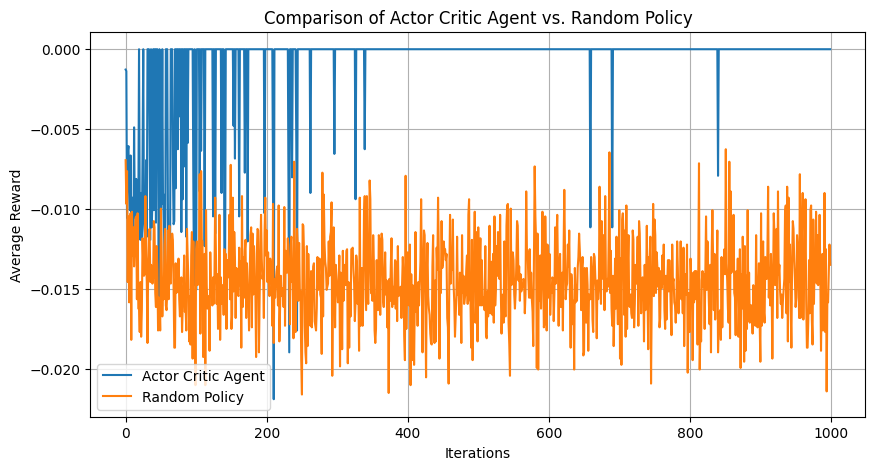

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(range(ITERATIONS), actor_critic_rewards, label='Actor Critic Agent')
plt.plot(range(ITERATIONS), random_rewards, label='Random Policy')
plt.xlabel('Iterations')
plt.ylabel('Average Reward')
plt.title('Comparison of Actor Critic Agent vs. Random Policy')
plt.legend()
plt.grid(True)
plt.show()

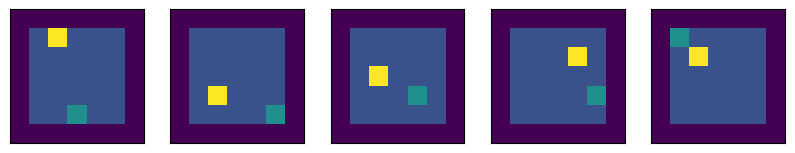

In [ ]:
fig,axs=plt.subplots(1,min(len(env_.boards), 5), figsize=(10,3))
for ax, board in zip(axs, env_.boards):
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    ax.imshow(board, origin="lower")